In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jb
import ast
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
%matplotlib inline

## Functions

In [3]:
def load_data(filepath, participant):
    df = pd.read_csv(filepath + participant + '.csv', usecols=[0,1,2,3,4,5,6],\
                 names=["sensor_blob","Start Time","Stop Time","Participant",\
                "VR","sensorblob_description","Values"])
    df["sensor"] = ["ECG","EDA","PPG","RSP","SKT1","SKT2"]
    df["Start Time"] = df["Start Time"].apply(lambda x:  datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
    df["Stop Time"] = df["Stop Time"].apply(lambda x:  datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
    
    return df

In [4]:
def plot_whole(data, participant, Fs=500):
    fig, axes = plt.subplots(6,1, figsize=(10,18), dpi=150)
    ax = axes.flatten()
    for i in range (6):
        data = ast.literal_eval(df.iloc[i]["Values"])
        time_ = np.arange(0,len(data))
        
        ax[i].plot(time_/(60*Fs), data, color='blue', lw=0.8)
        ax[i].set_xlabel("time, minutes")
        ax[i].set_title("{} of Participant {}".format(df.iloc[i]["sensor"],participant))

    plt.tight_layout()
    plt.suptitle("Participant {}".format(participant), size=16, y=1.01)
    plt.show()

In [5]:
def plot_zoom(data, participant, Fs=500):
    fig, axes = plt.subplots(6,1, figsize=(10,18), dpi=150)
    ax = axes.flatten()
    for i in range (6):
        data = ast.literal_eval(df.iloc[i]["Values"])
        time_ = np.arange(0,(len(data))/Fs, 1/Fs)


        data2 = data[Fs*60*1:Fs*60*1+Fs*10]
        time_2 = time_[Fs*60*1:Fs*60*1+Fs*10]

        ax[i].plot(time_2, data2, color='blue', lw=0.8)
        ax[i].set_xlabel("time, seconds")
        ax[i].set_title("Zoomed-in {} of Participant {}".format(df.iloc[i]["sensor"],participant))

    plt.tight_layout()
    plt.show()

## Plot All Participants

In [6]:
participants = ['0020','0021','0022','0023','0024','0025','0027','0028','0029','0030','0031','0032']

In [7]:
filepath = '/home/llingcaro_temp/bkt_prd_dsv_brain_therapy_raw/SMA-3 RIBS Data/BT-SMAO-'

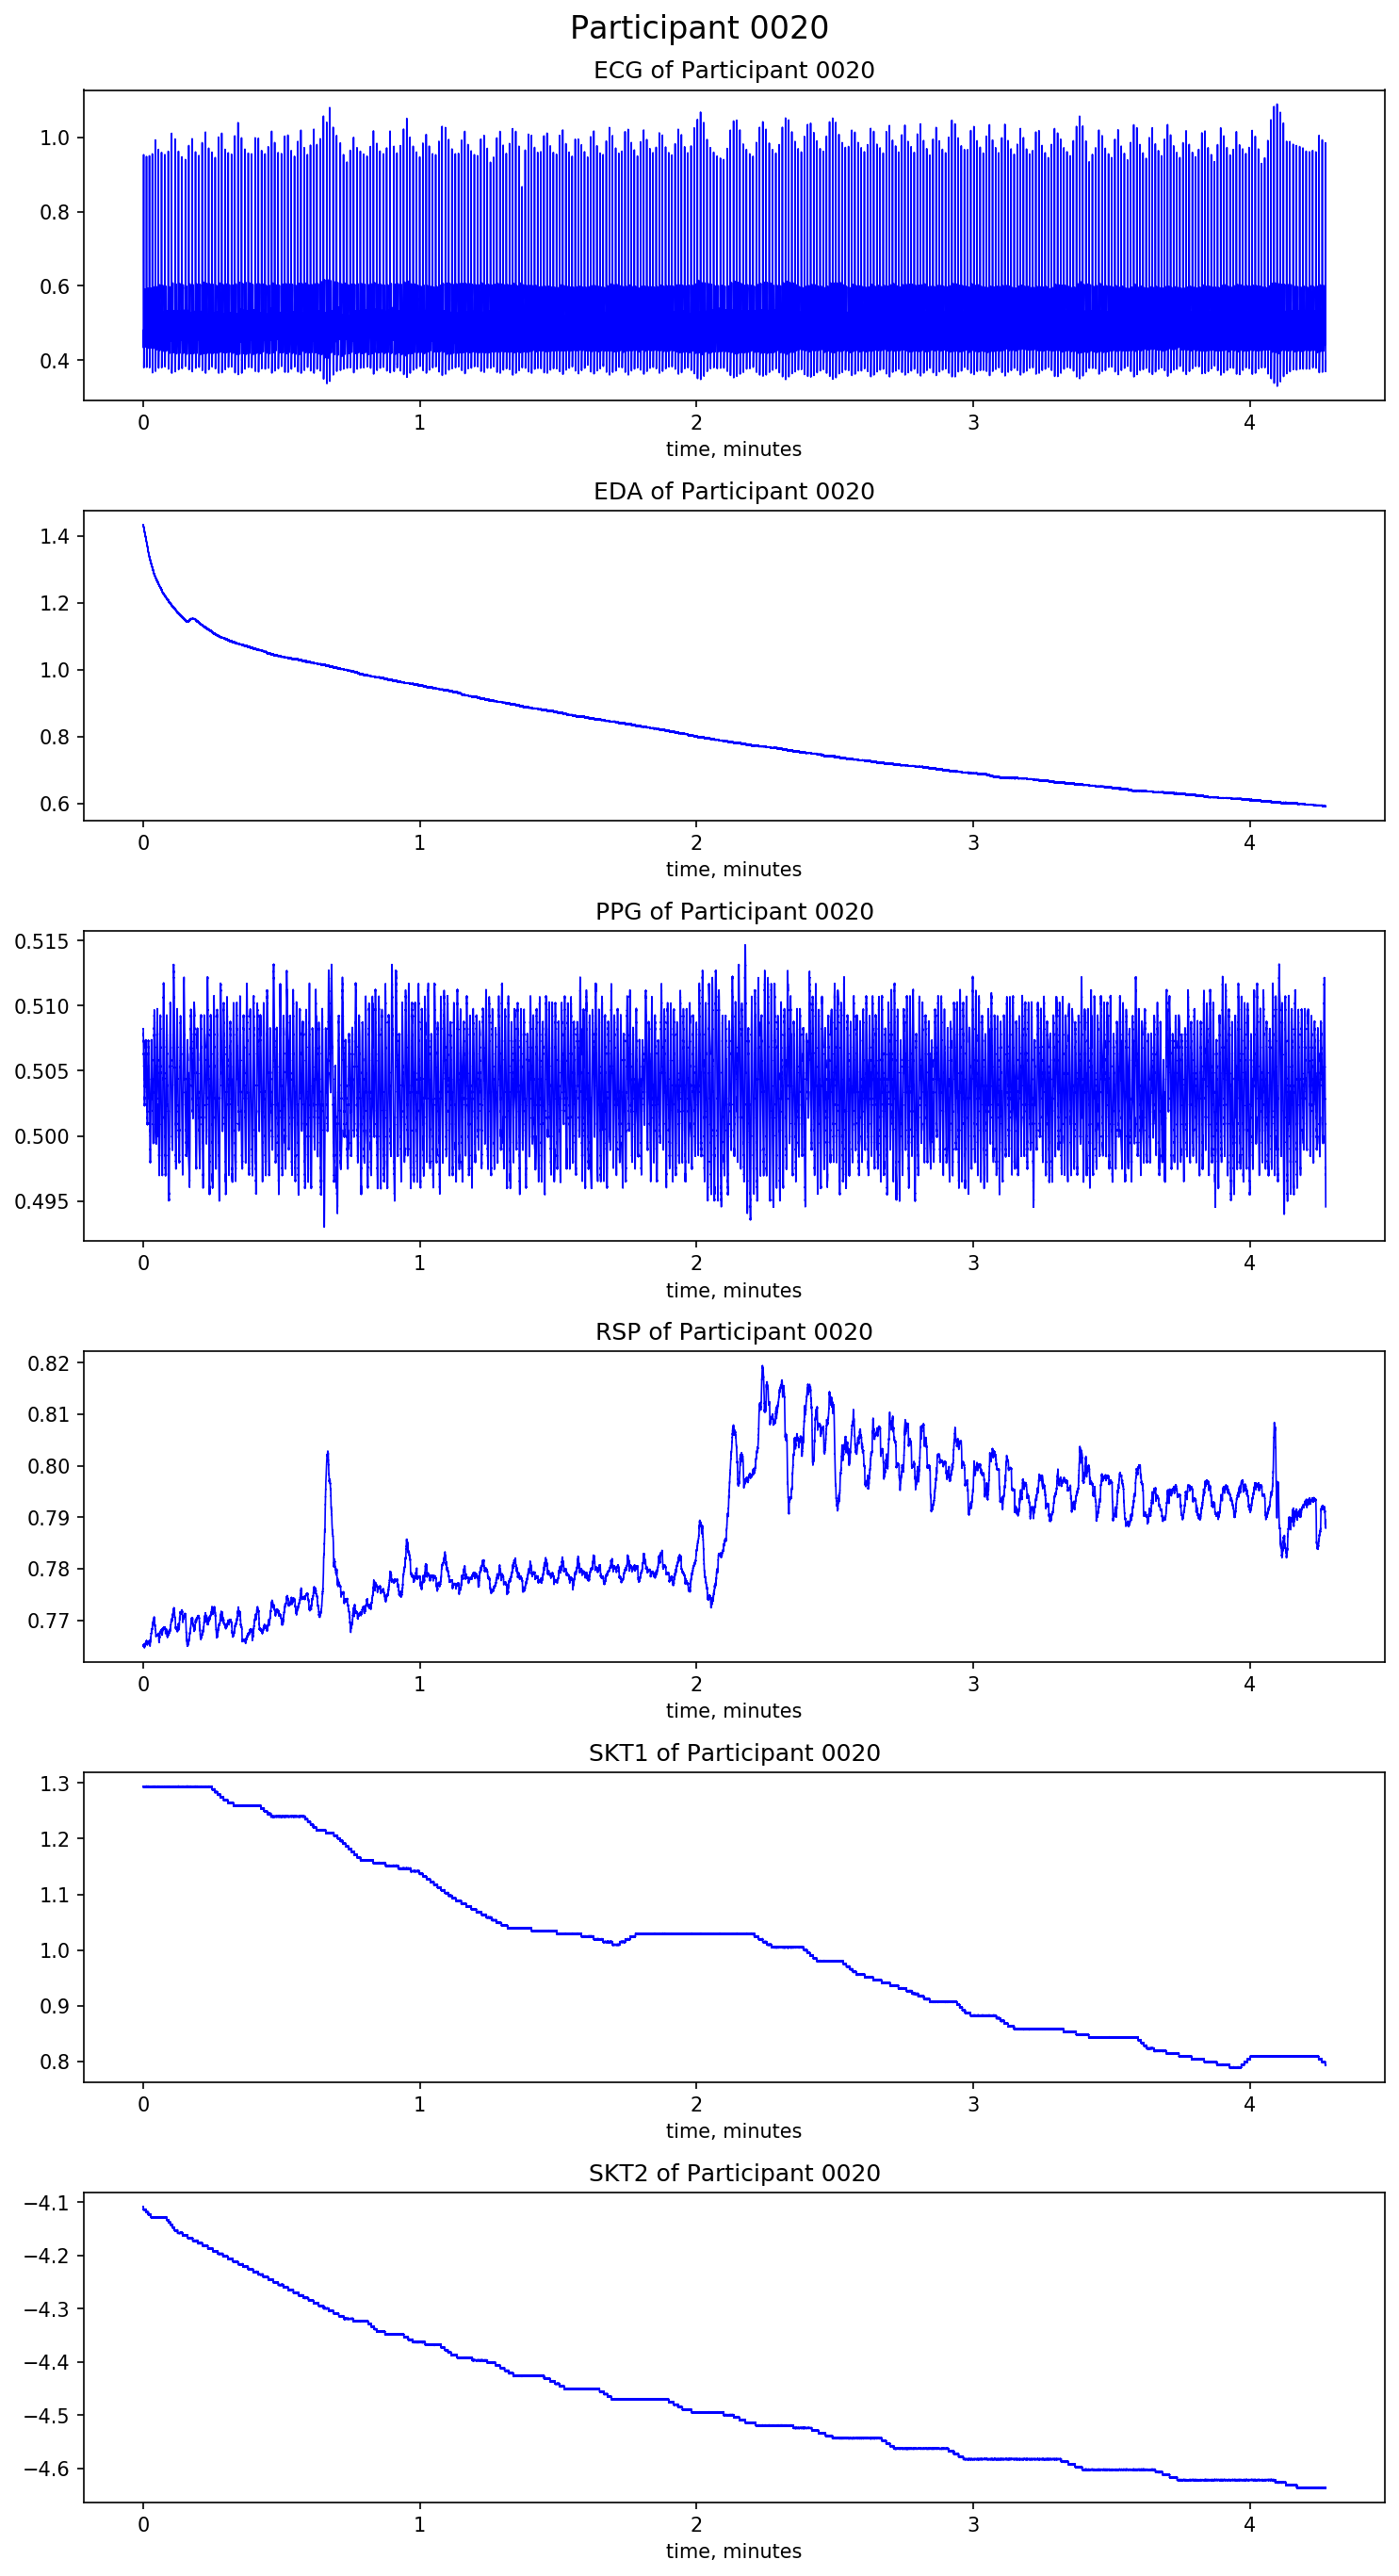

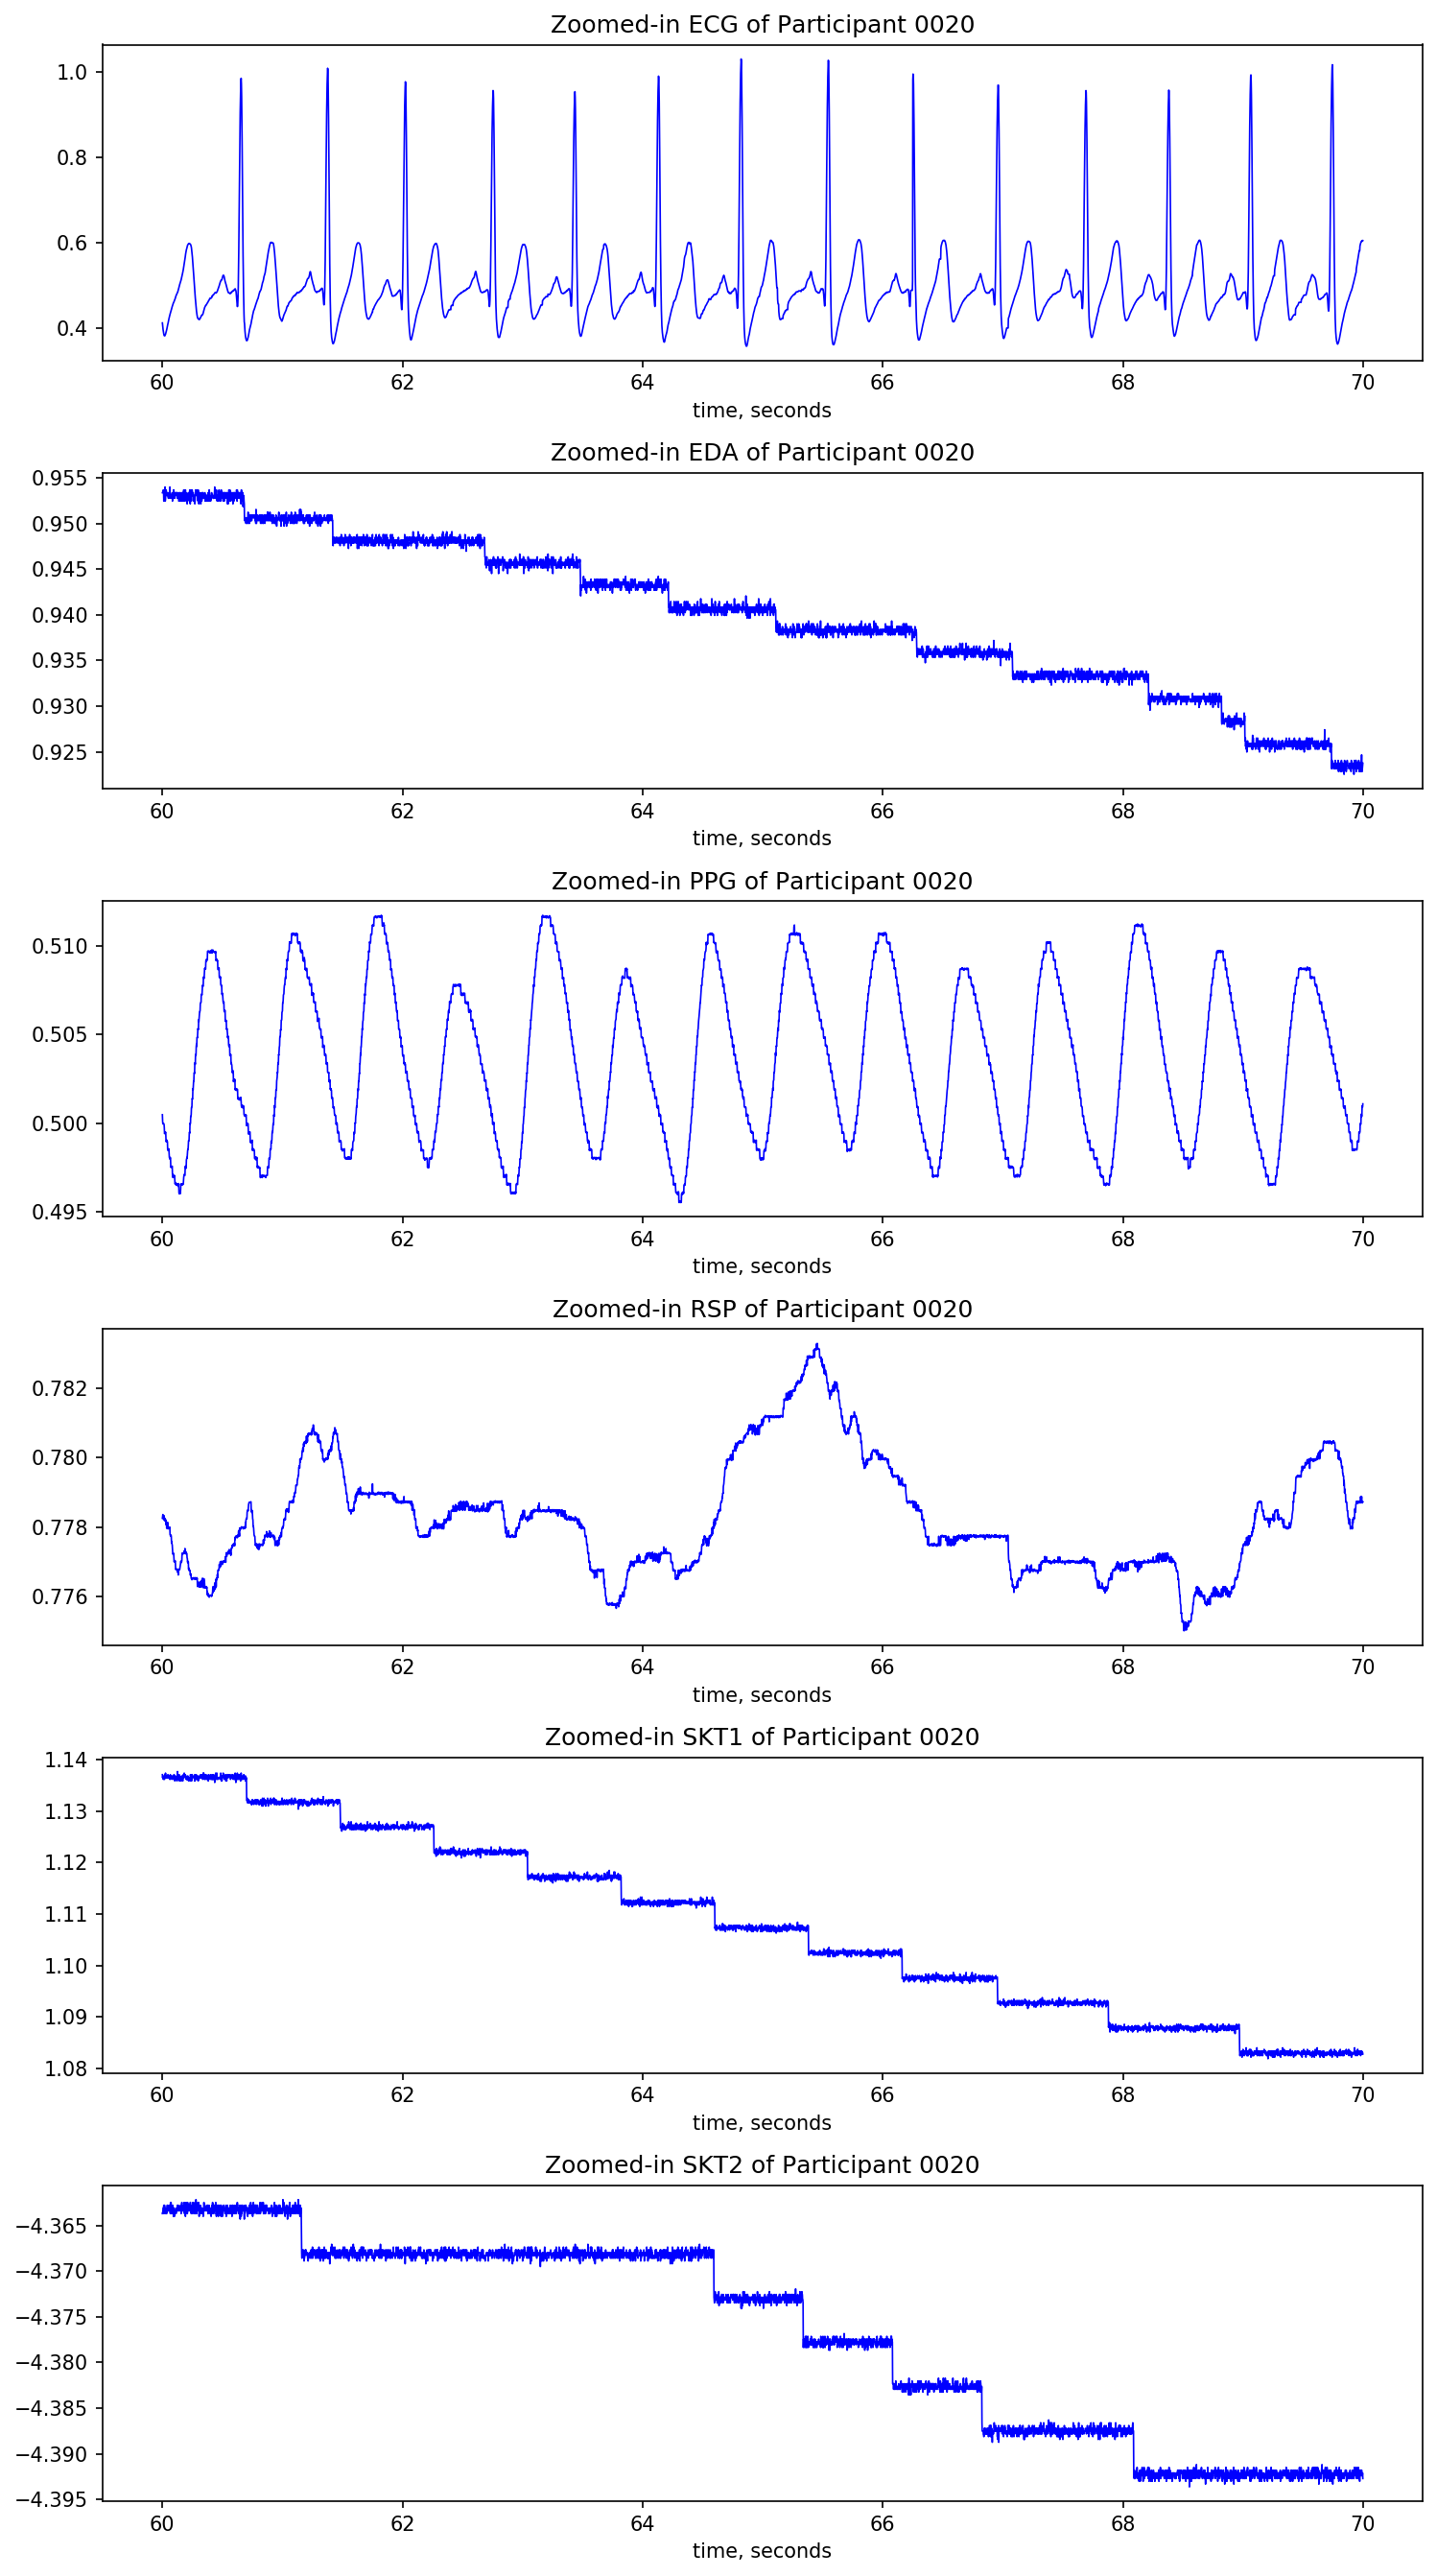

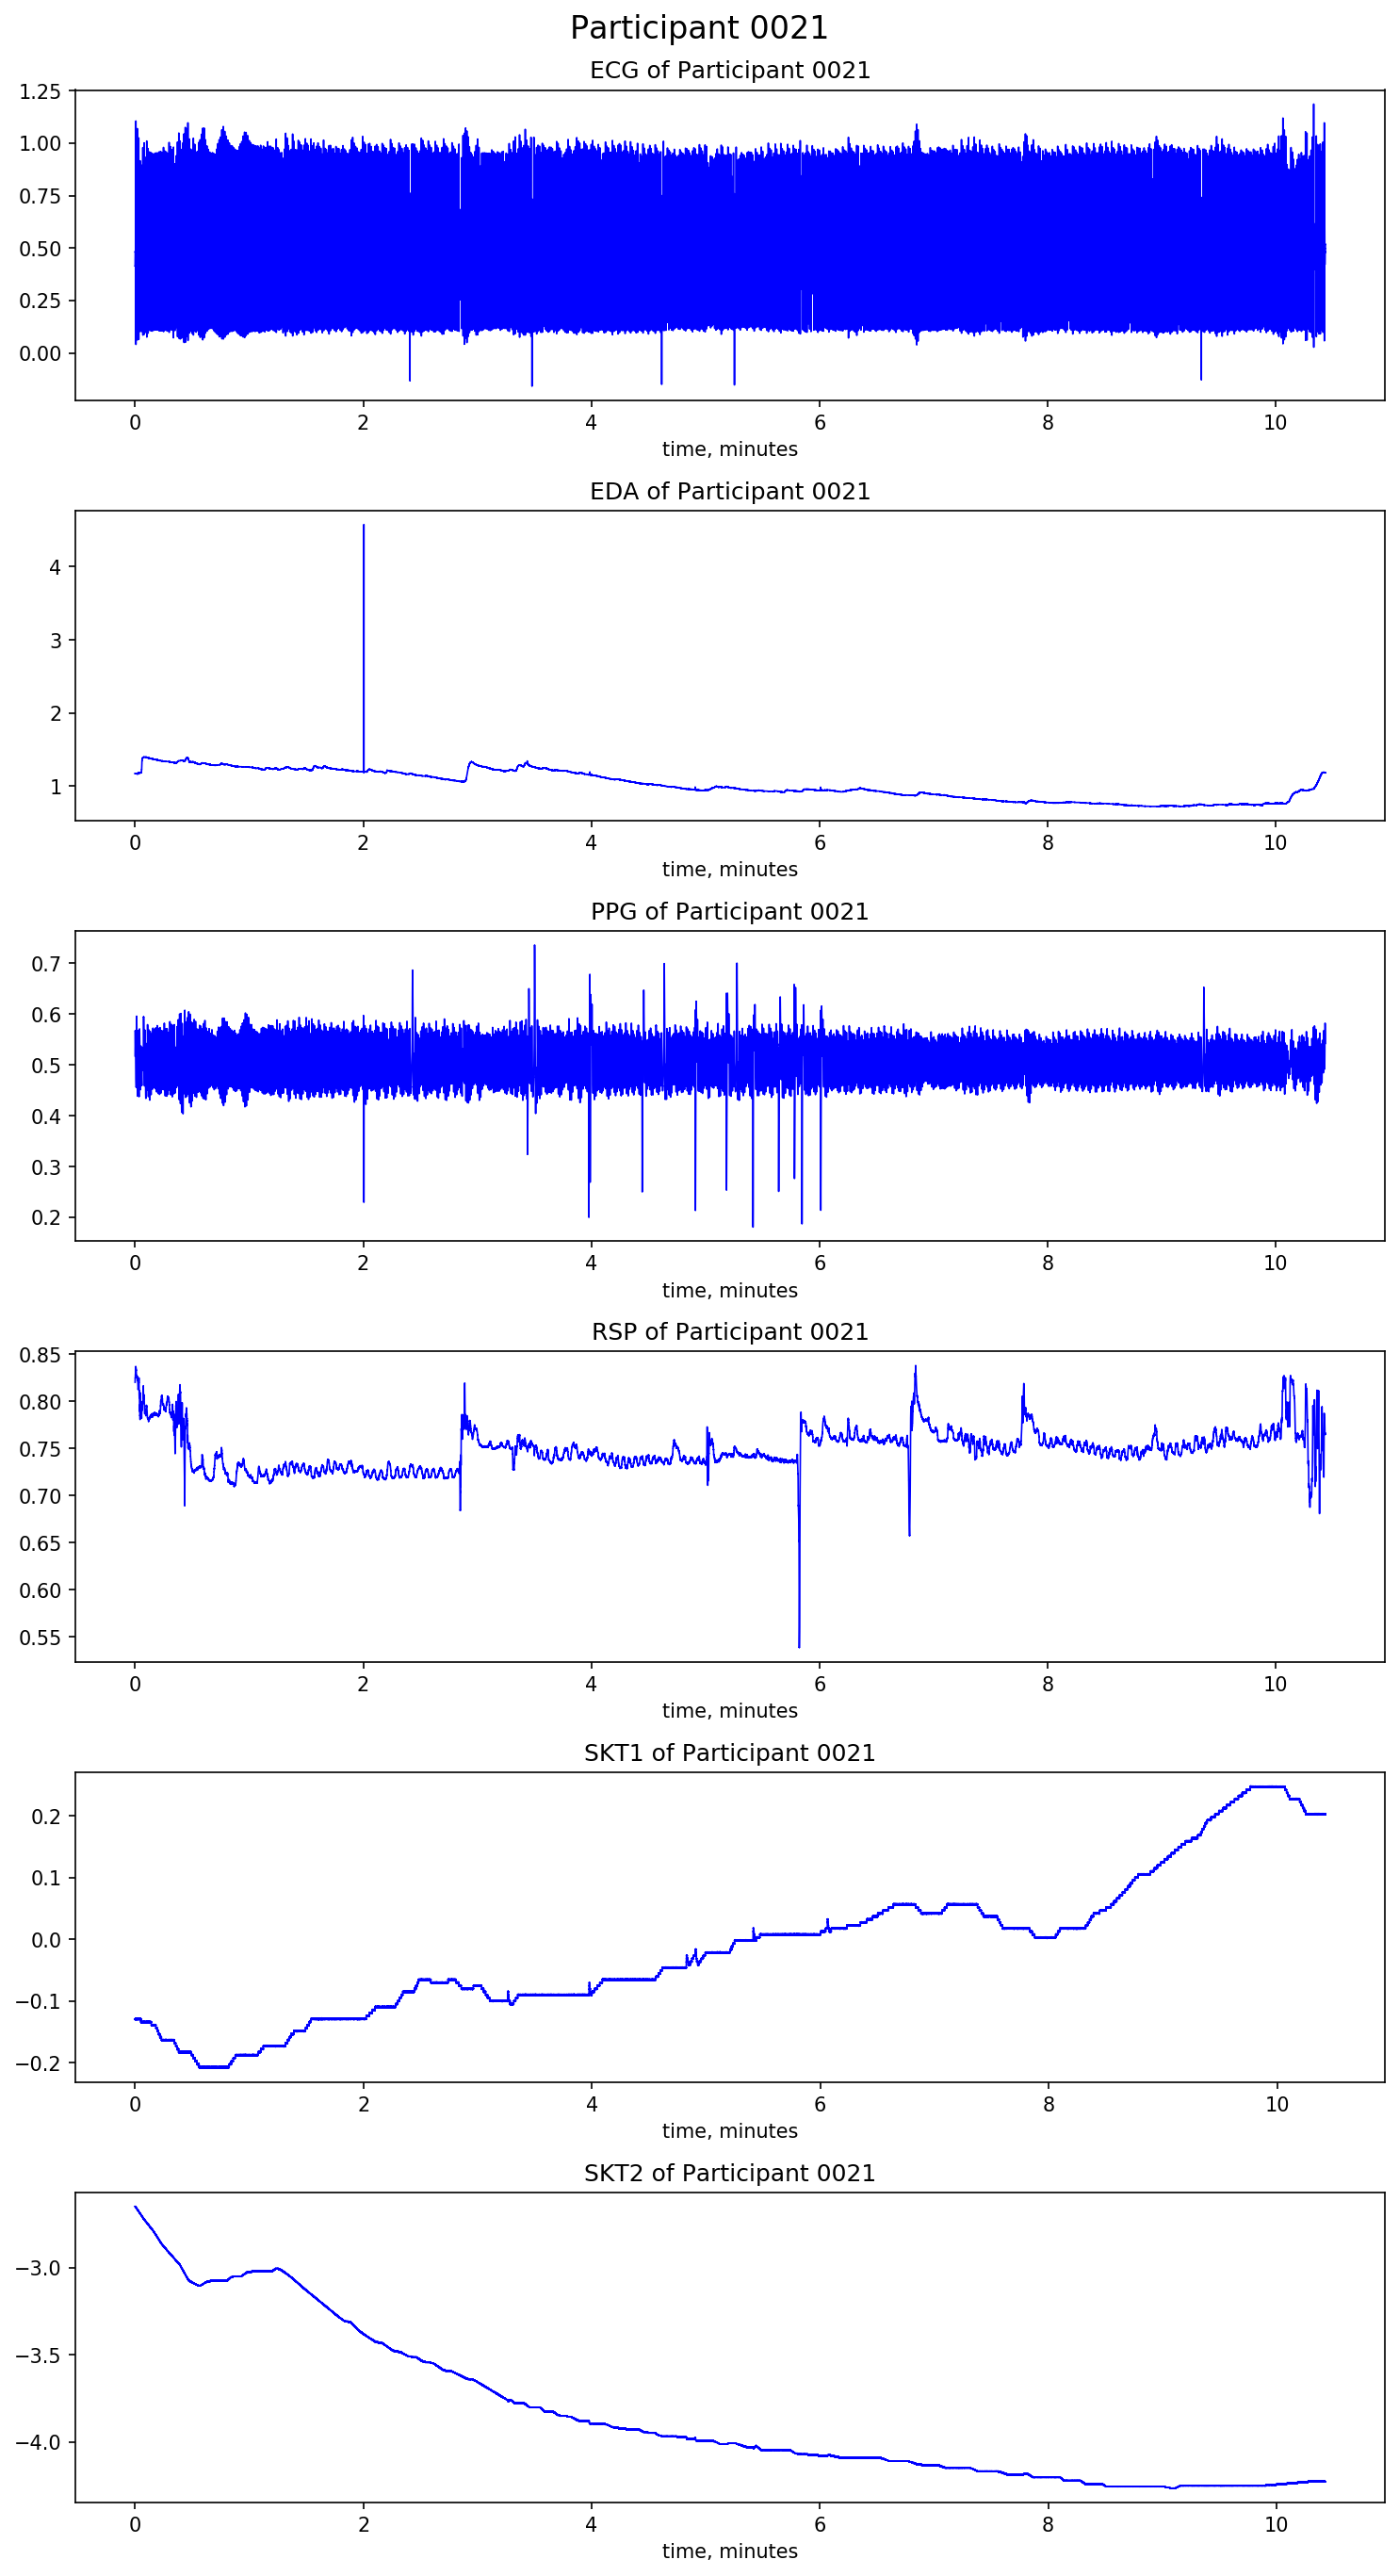

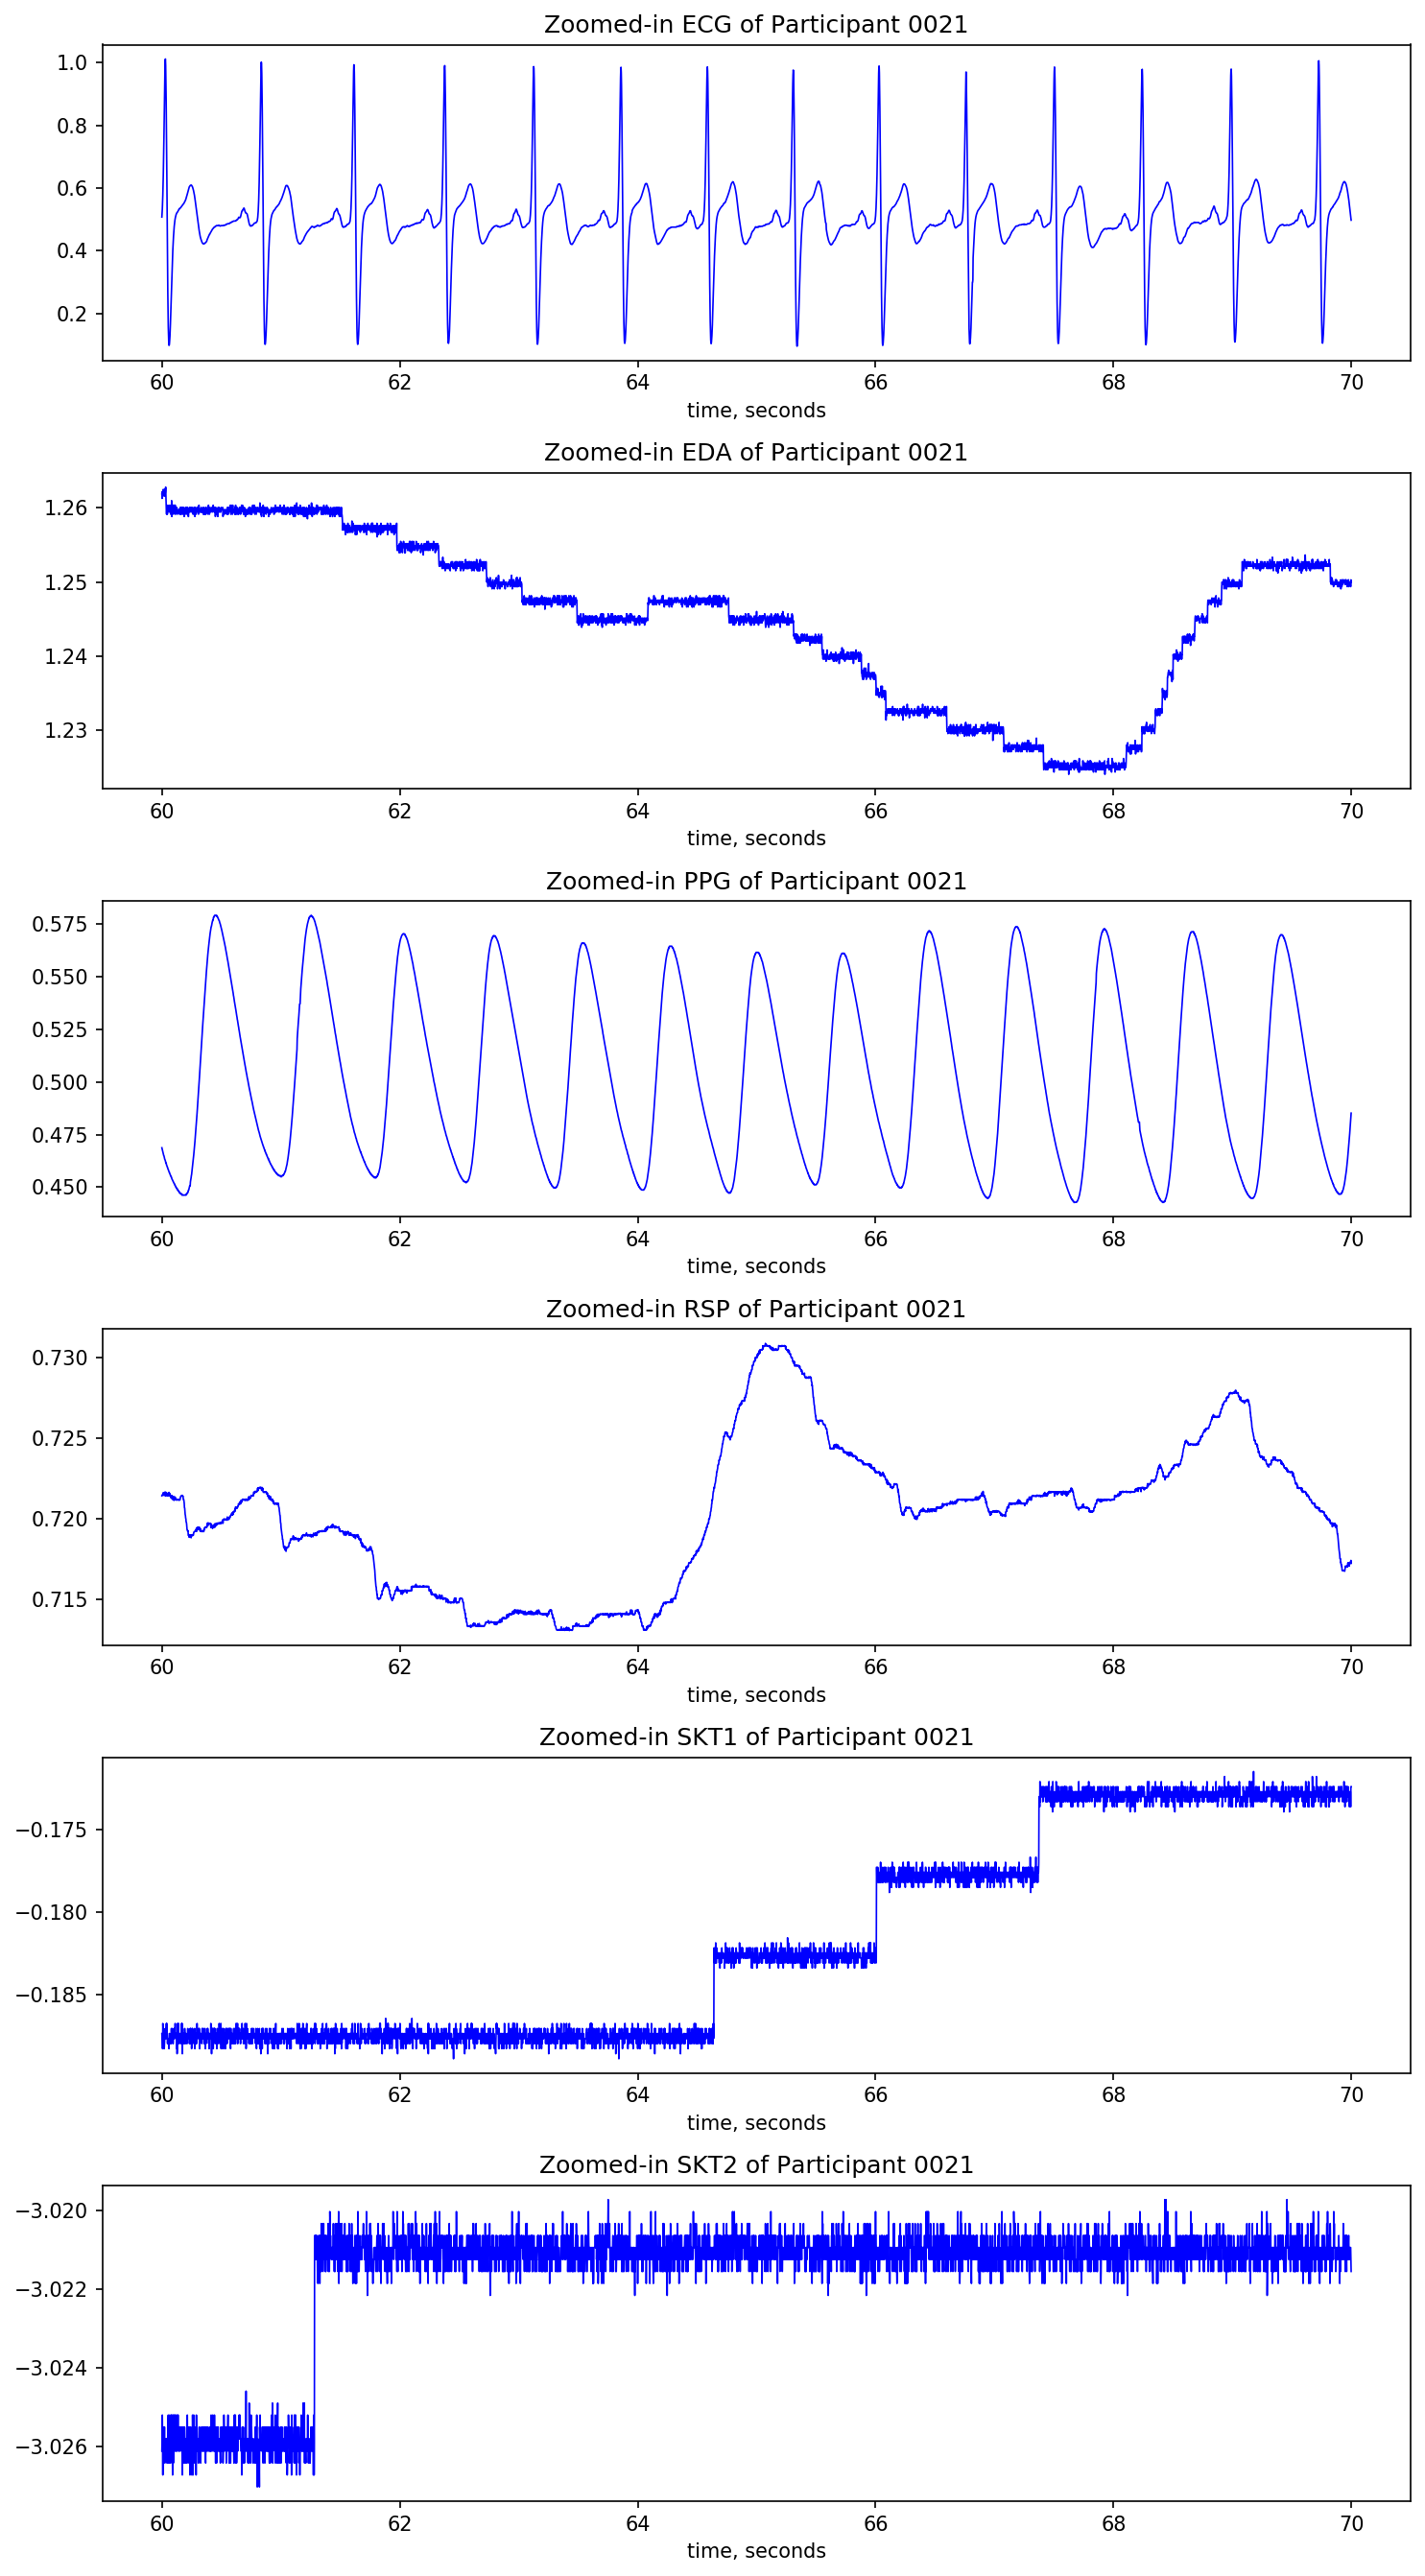

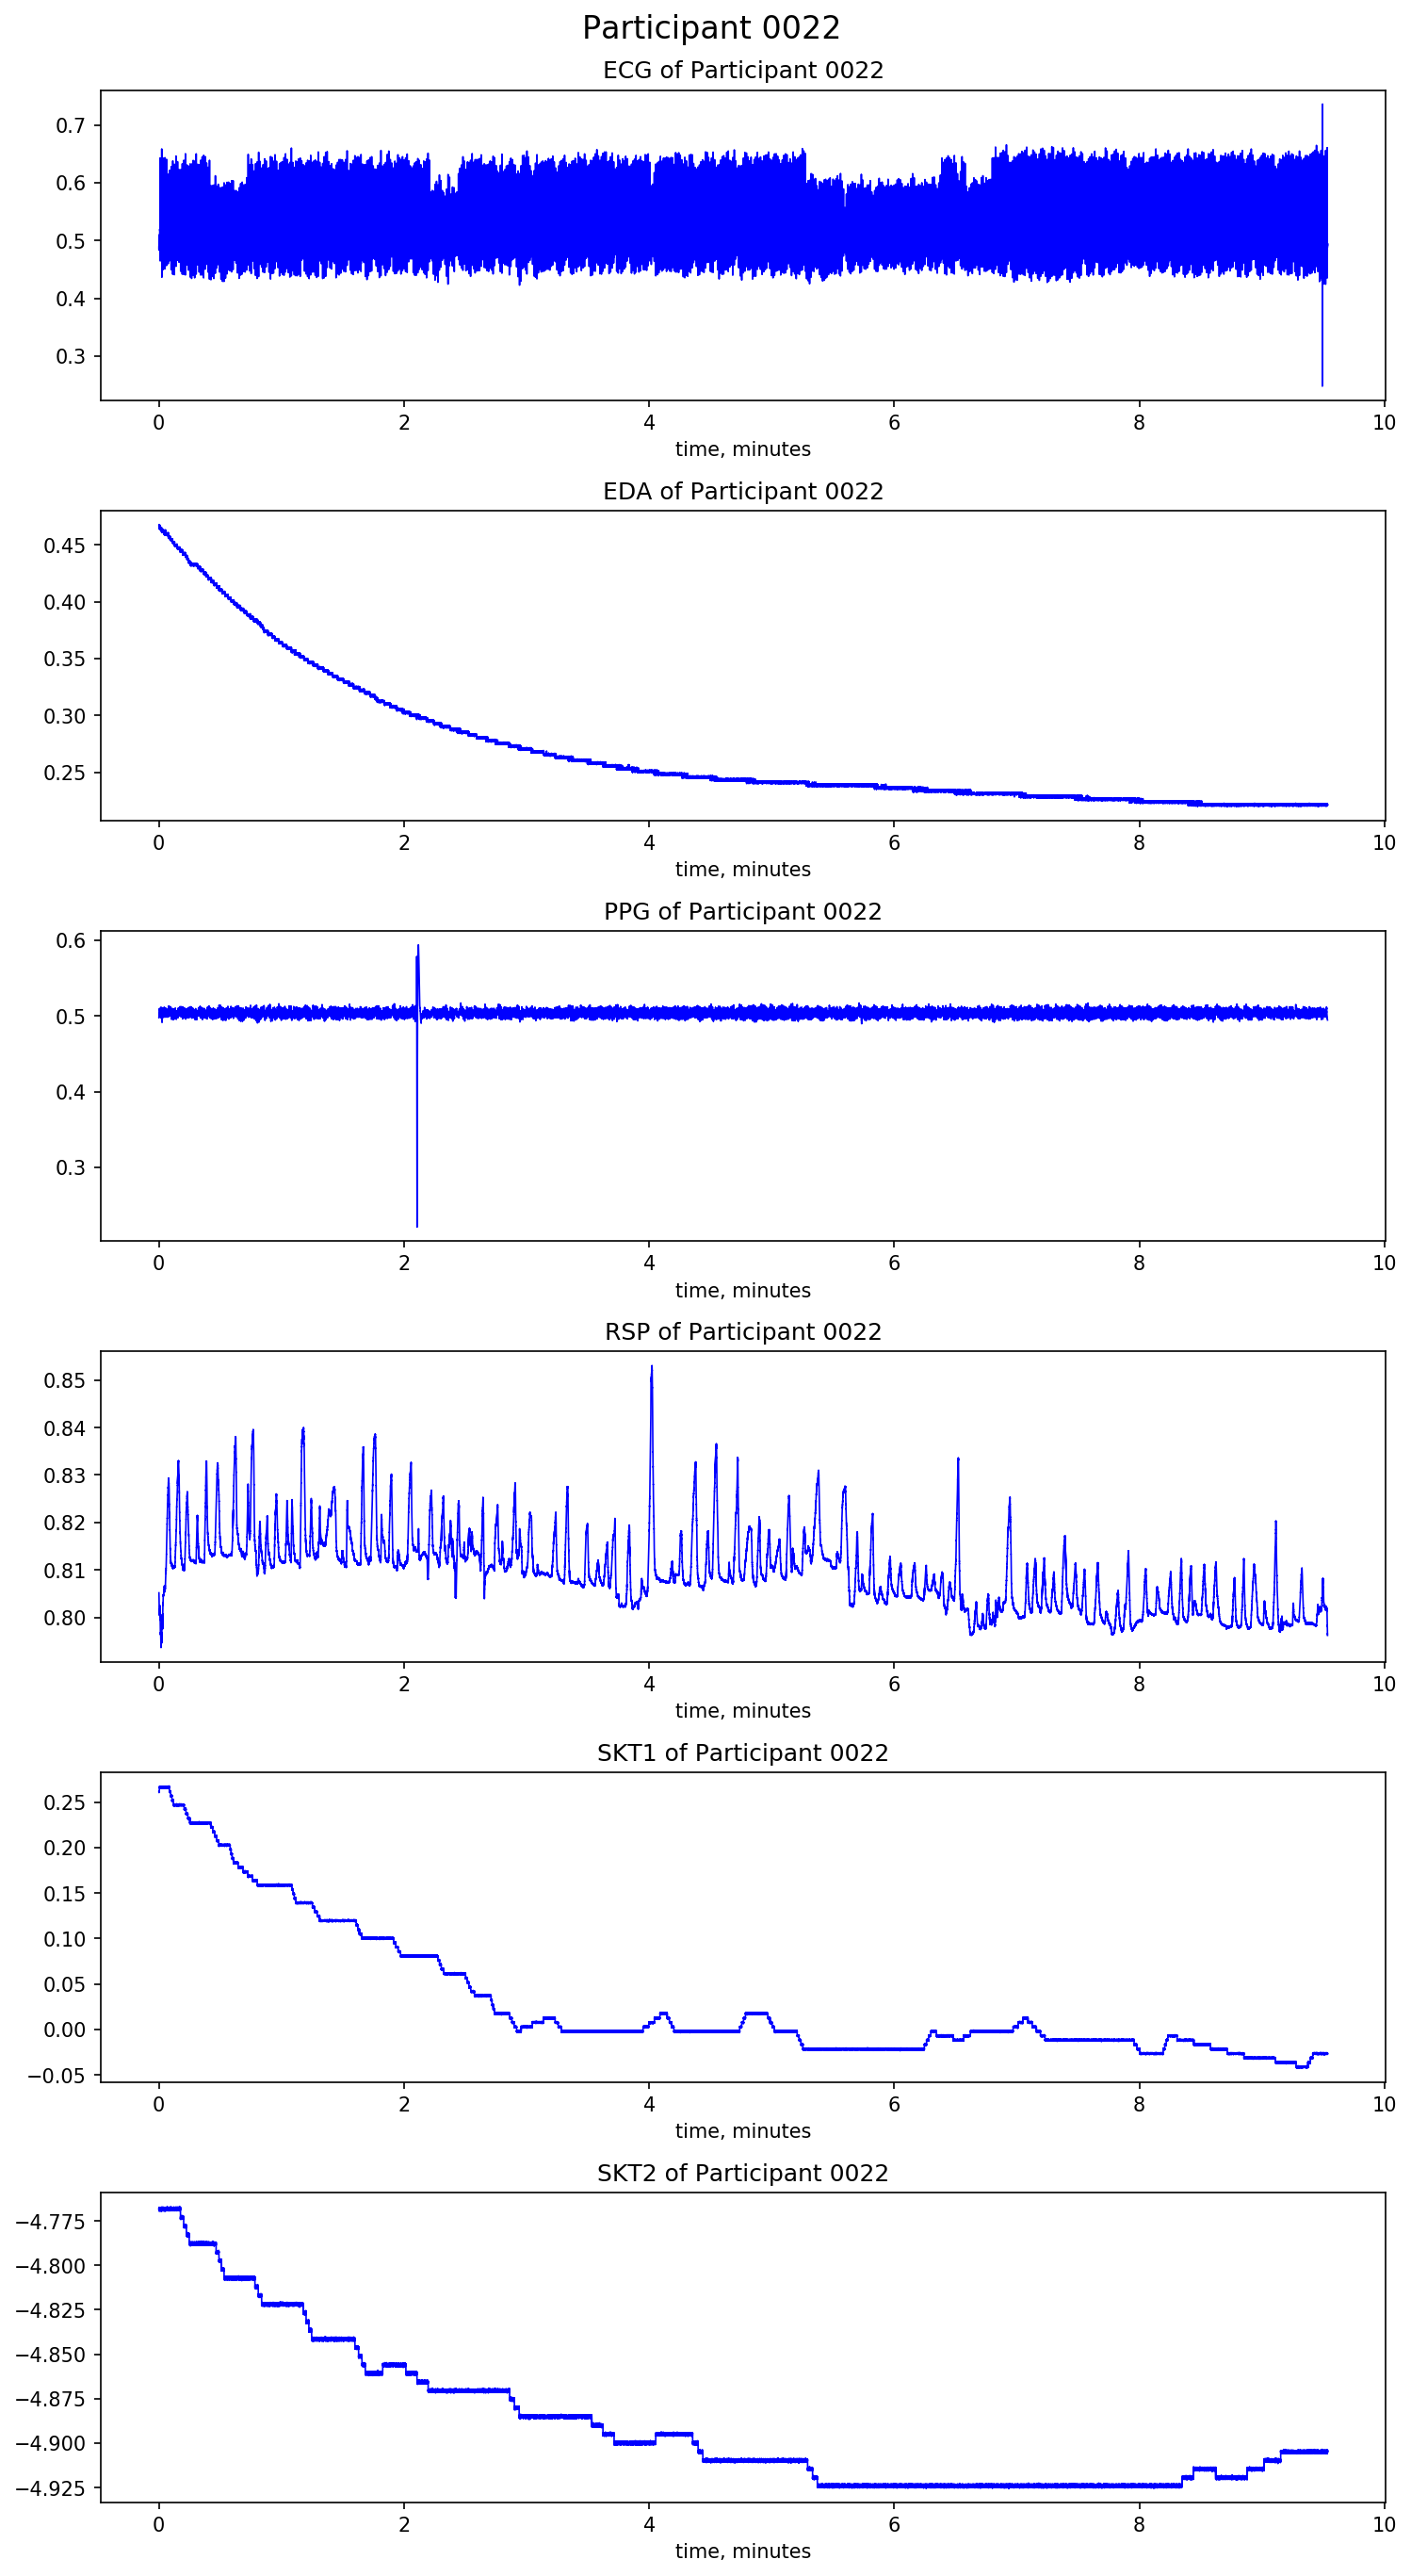

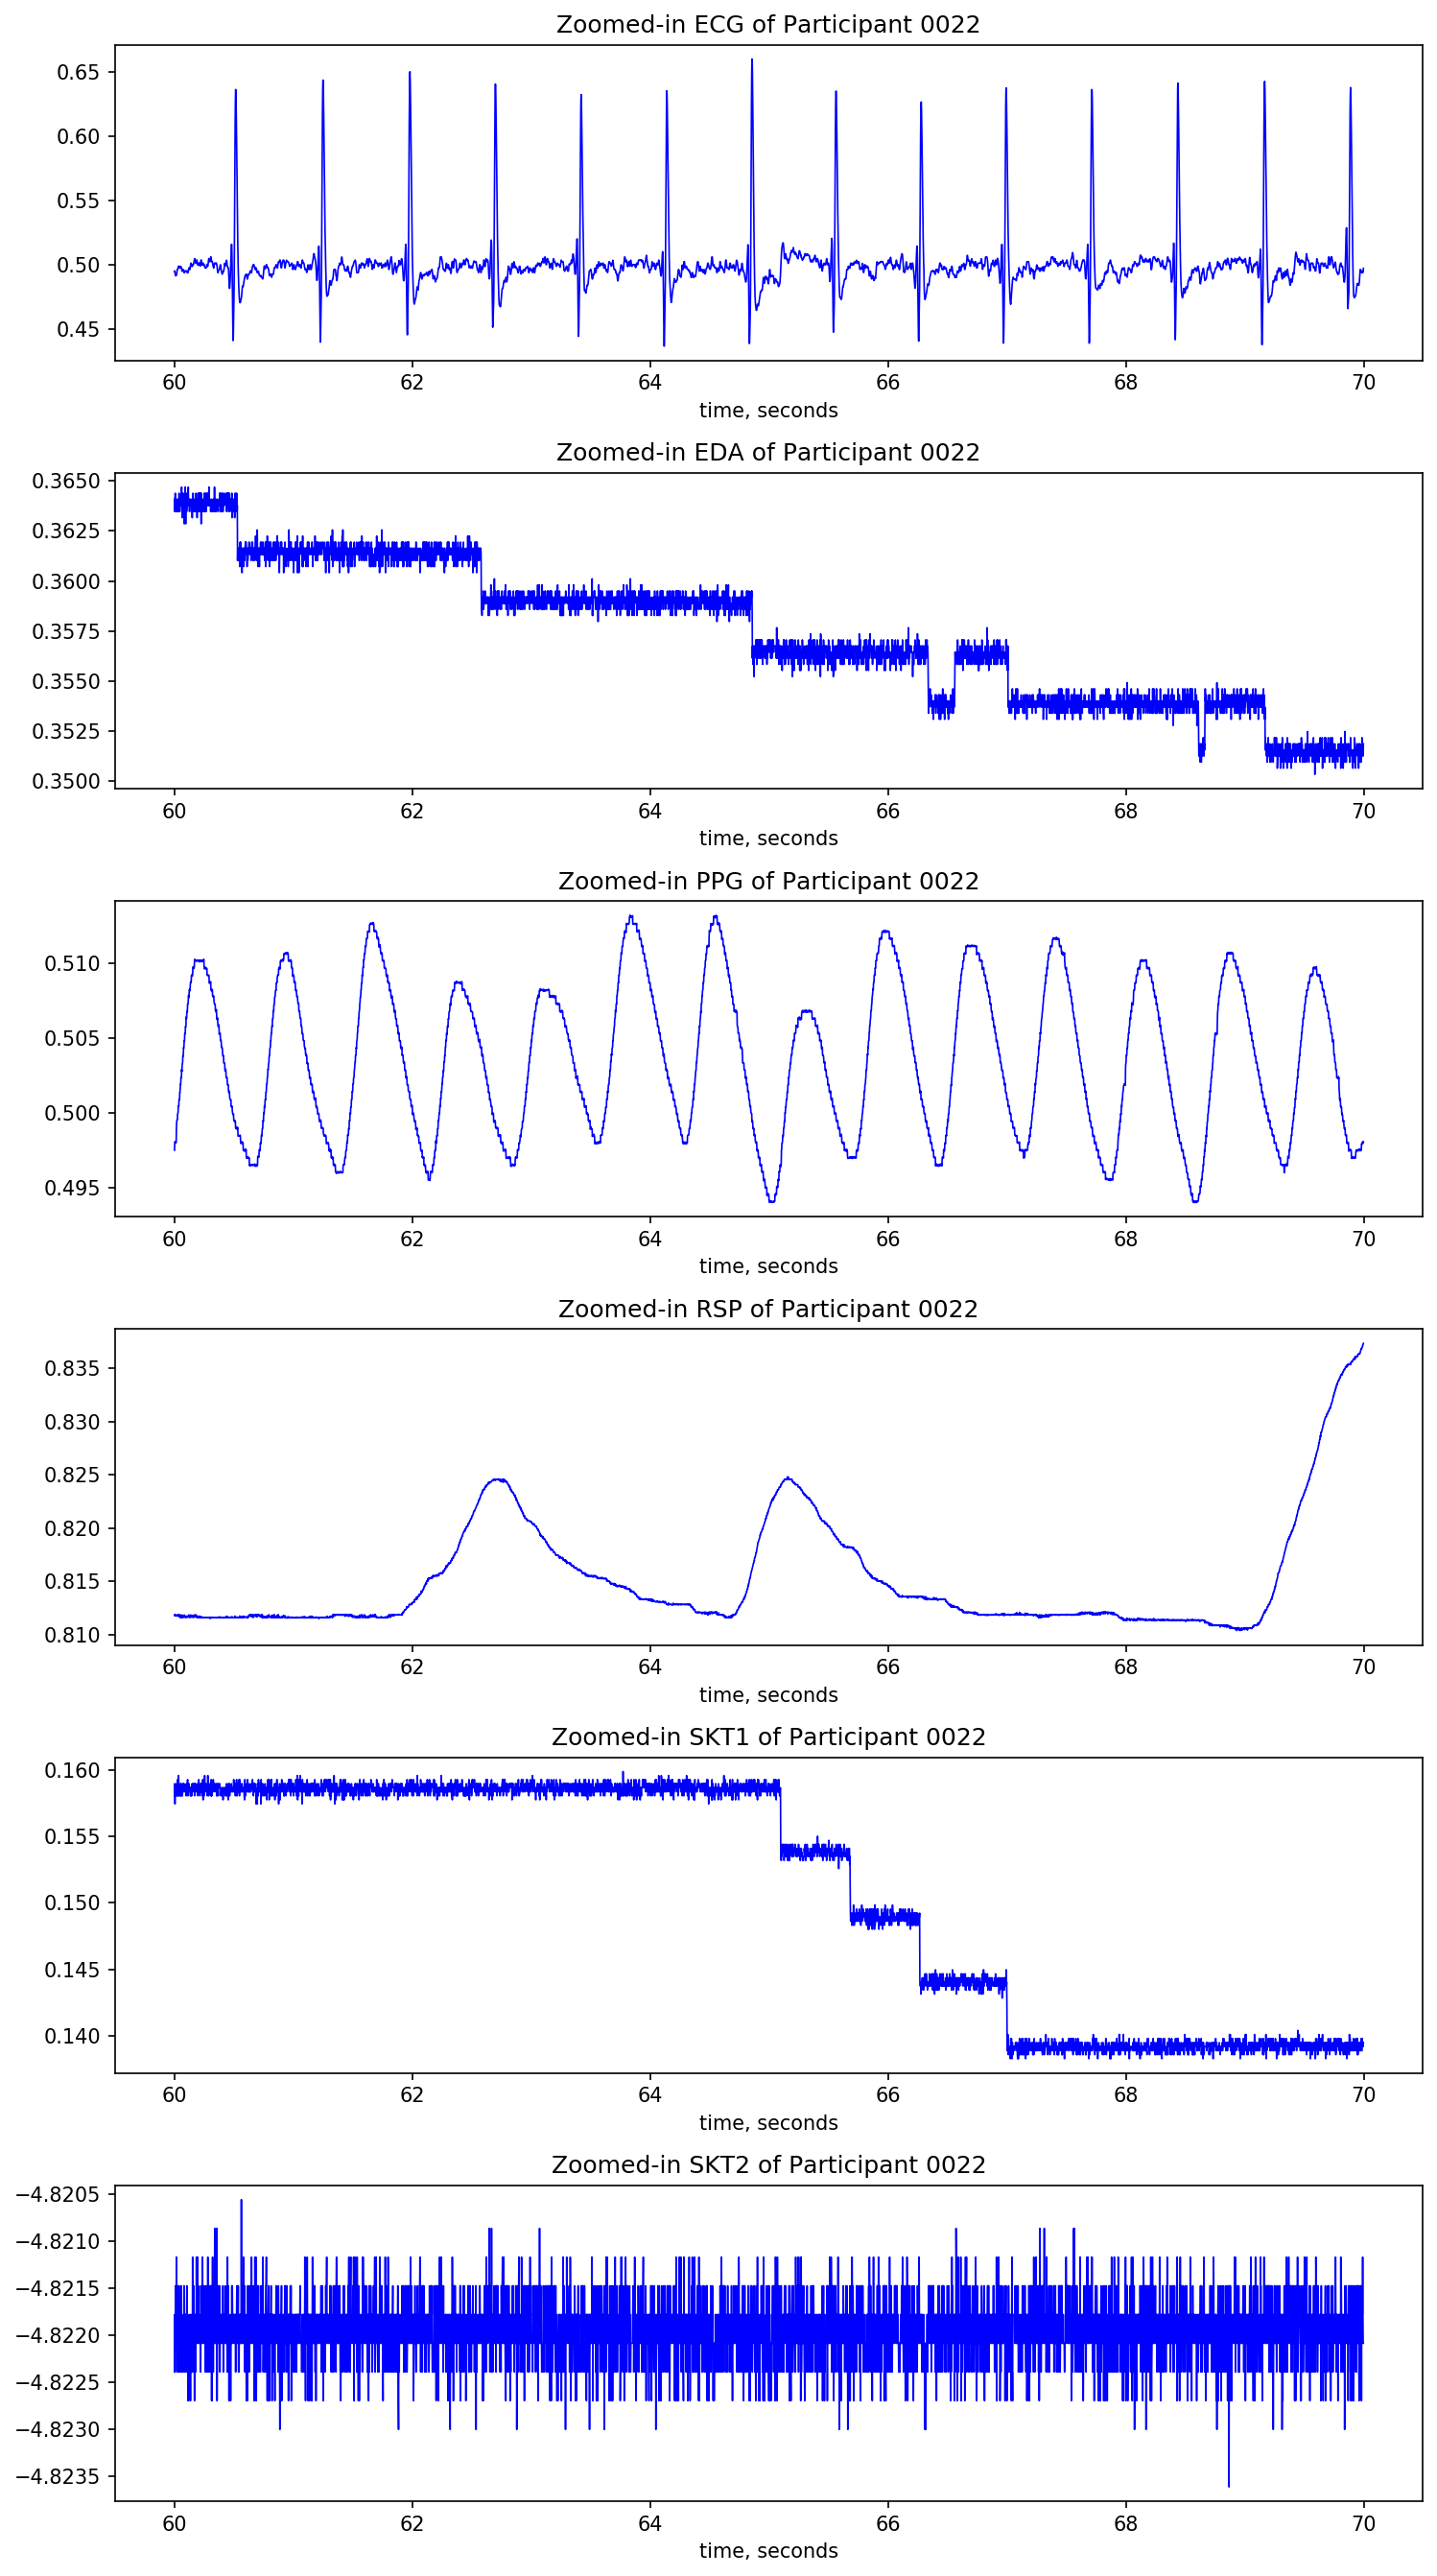

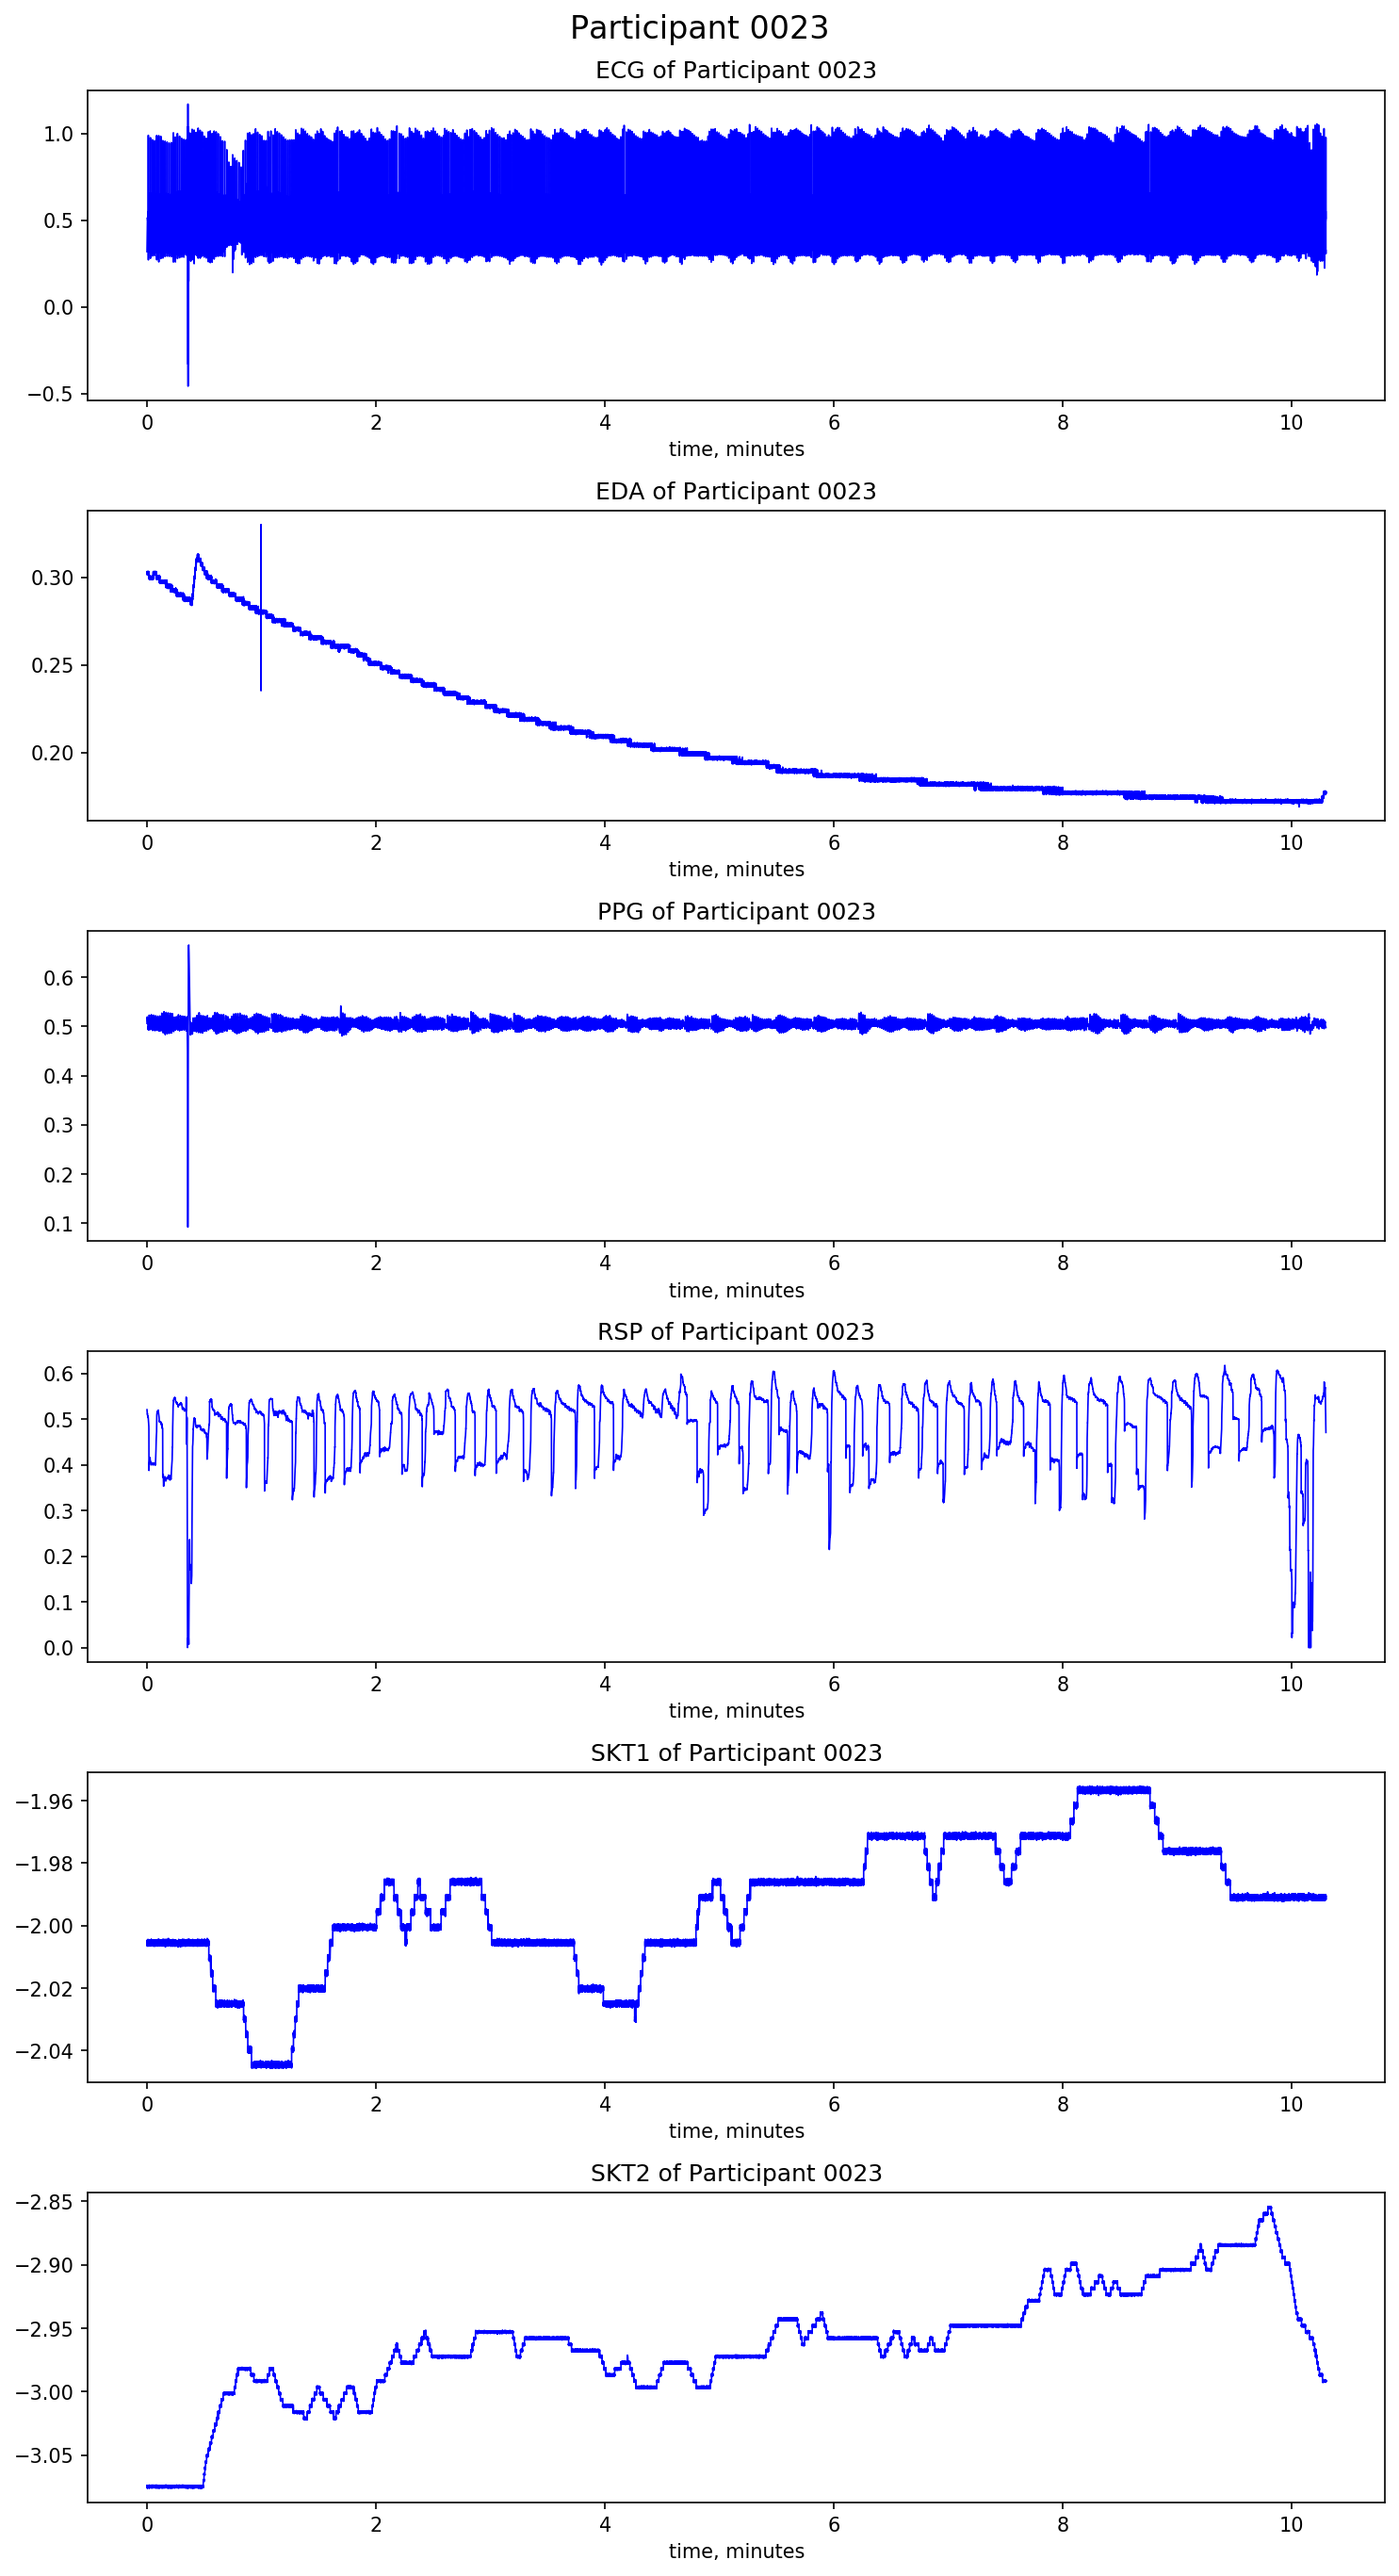

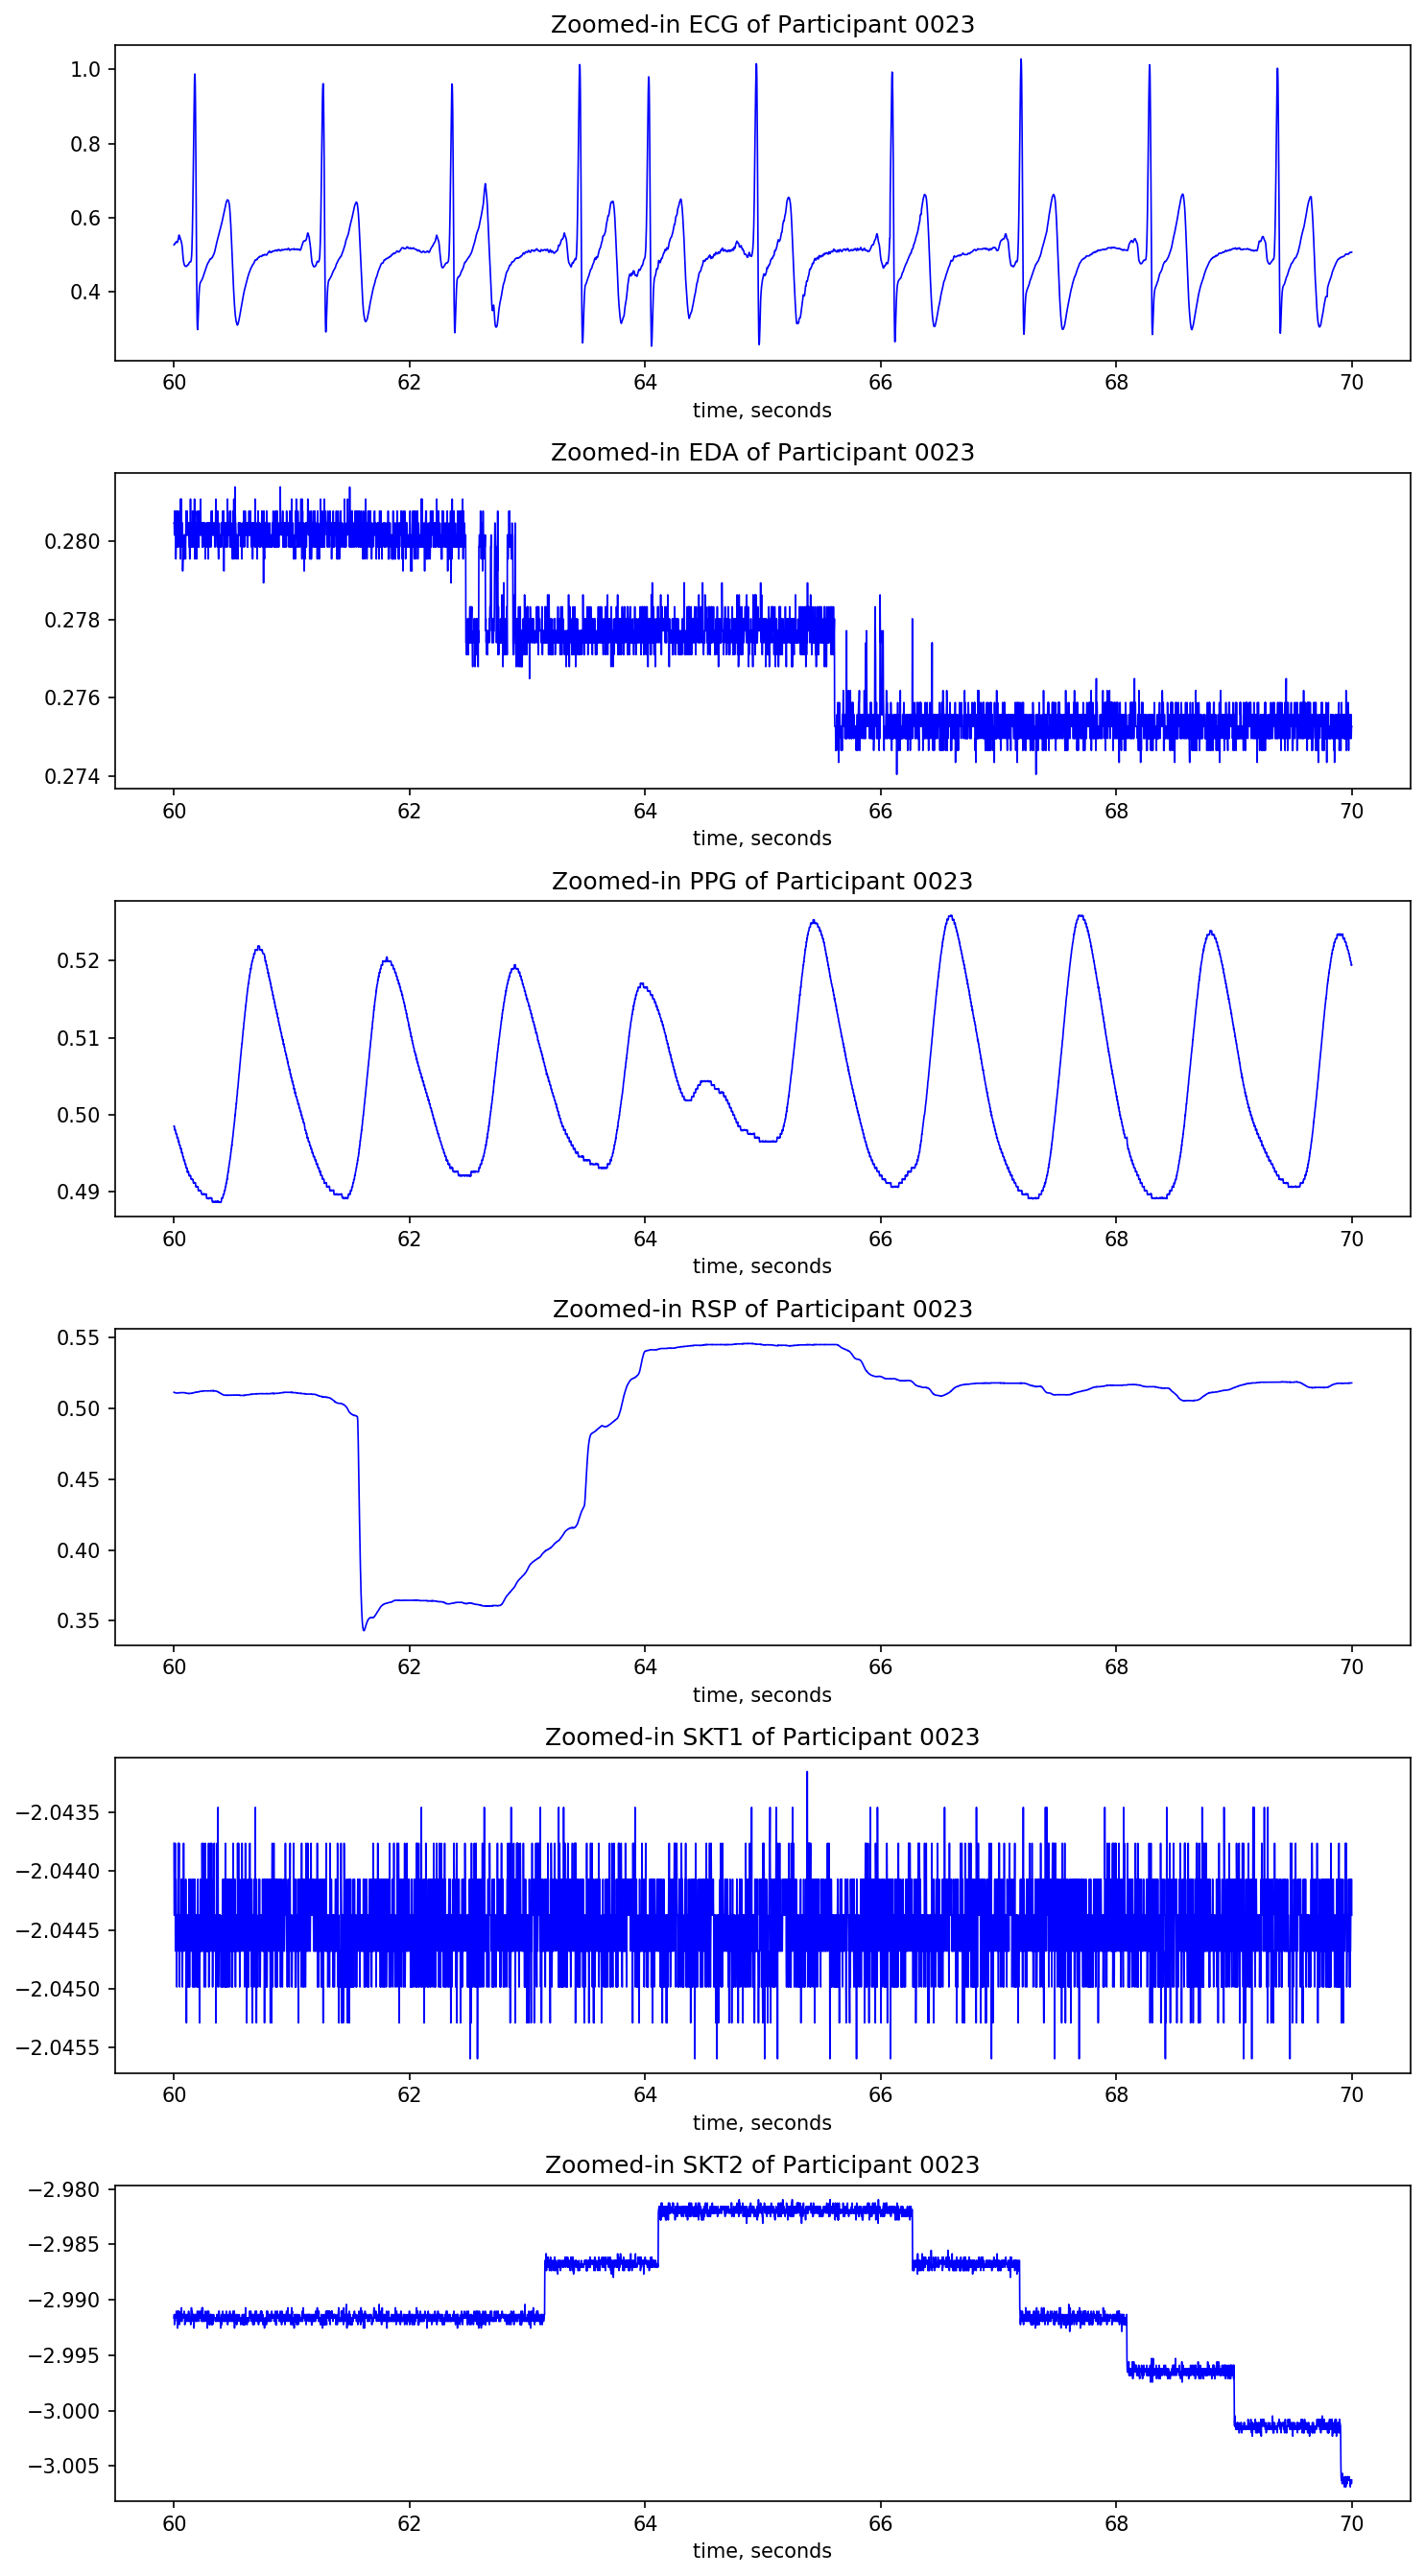

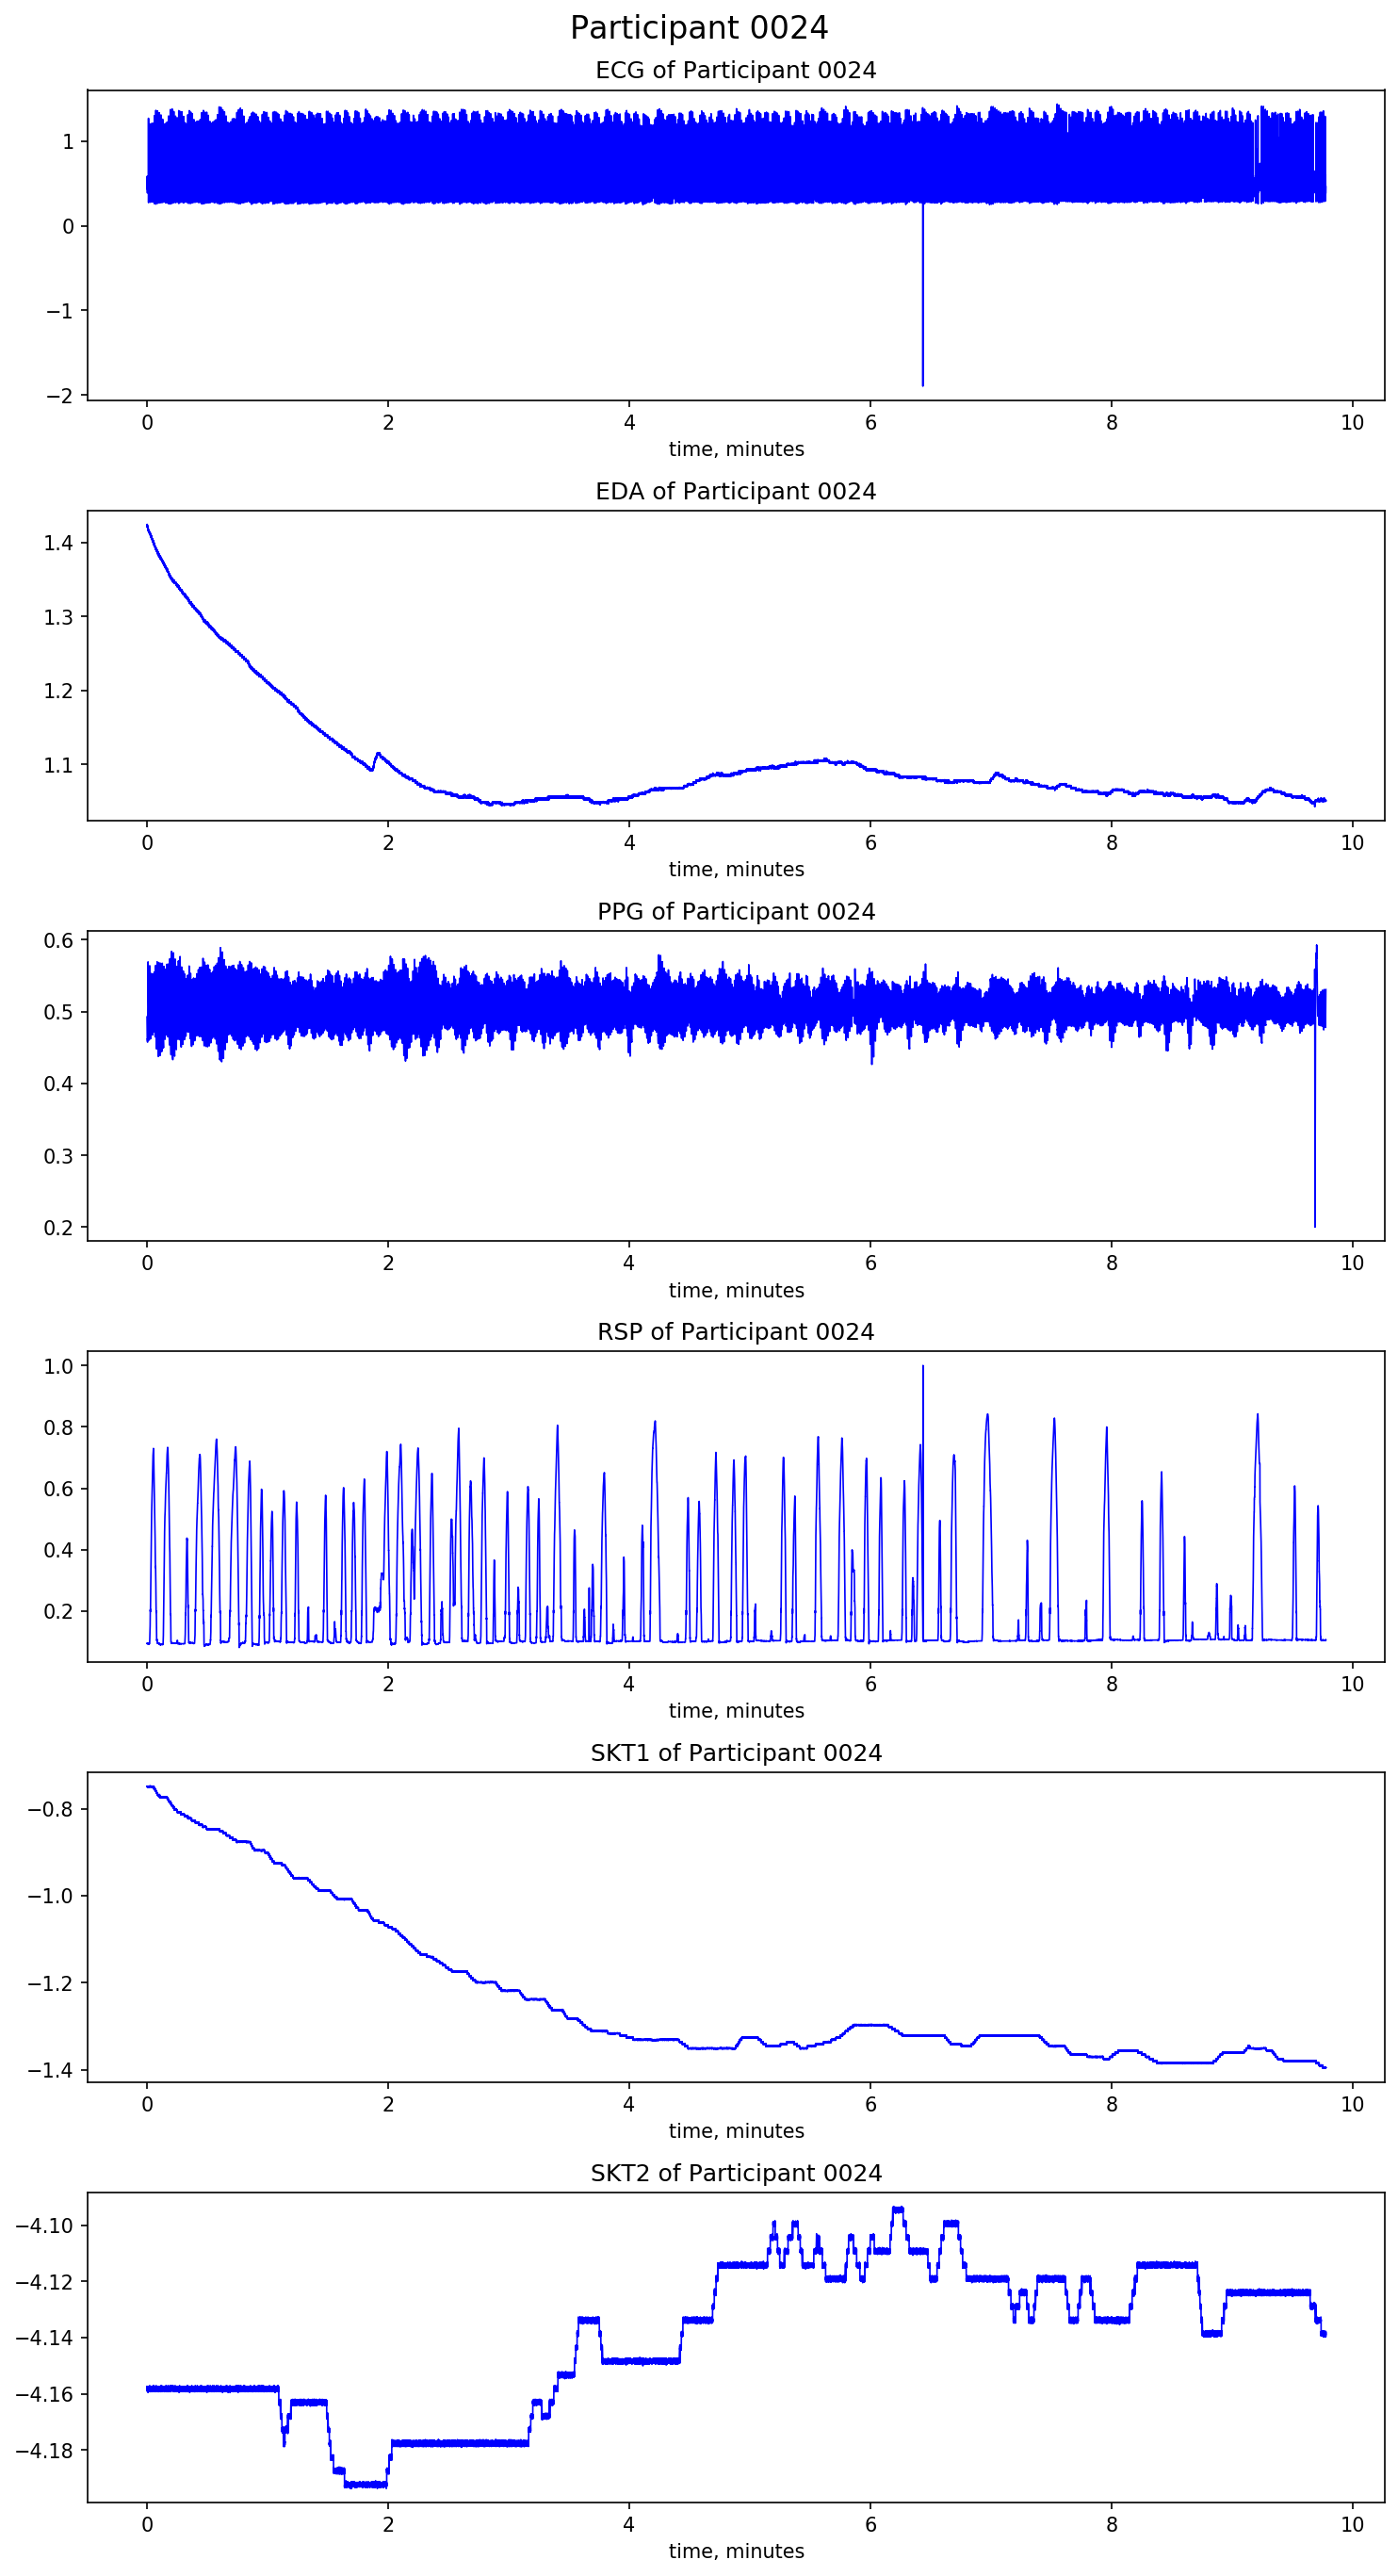

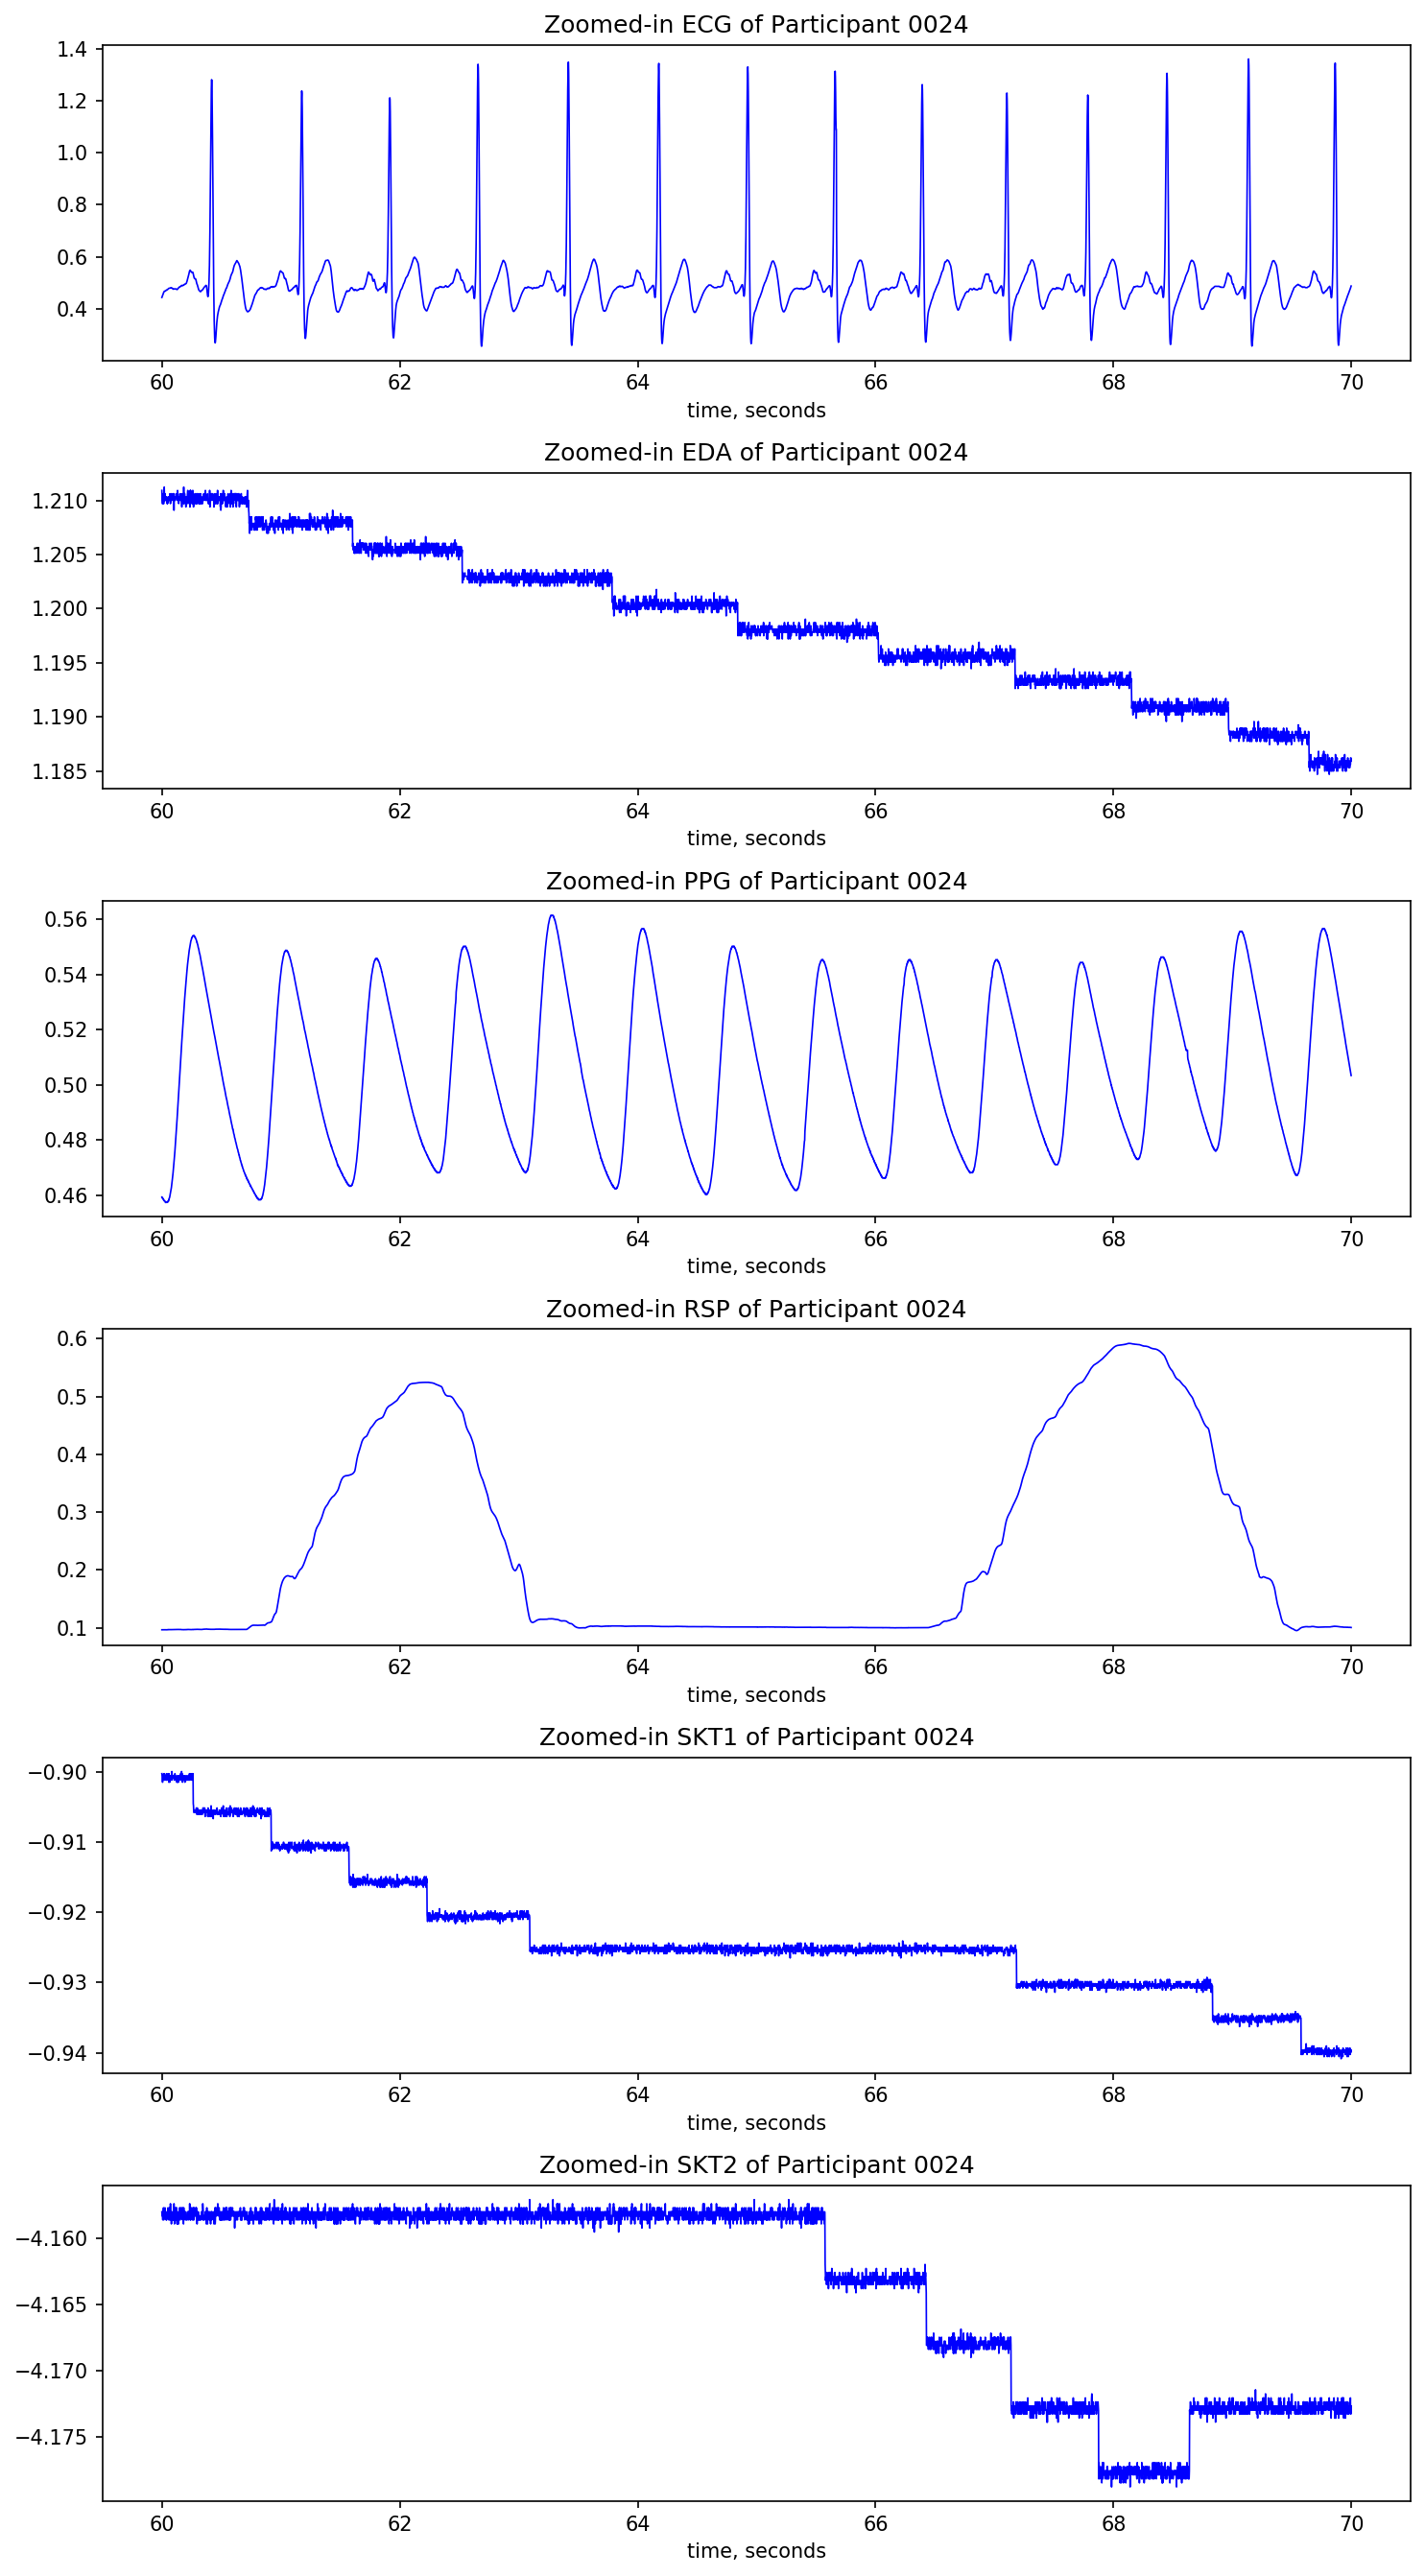

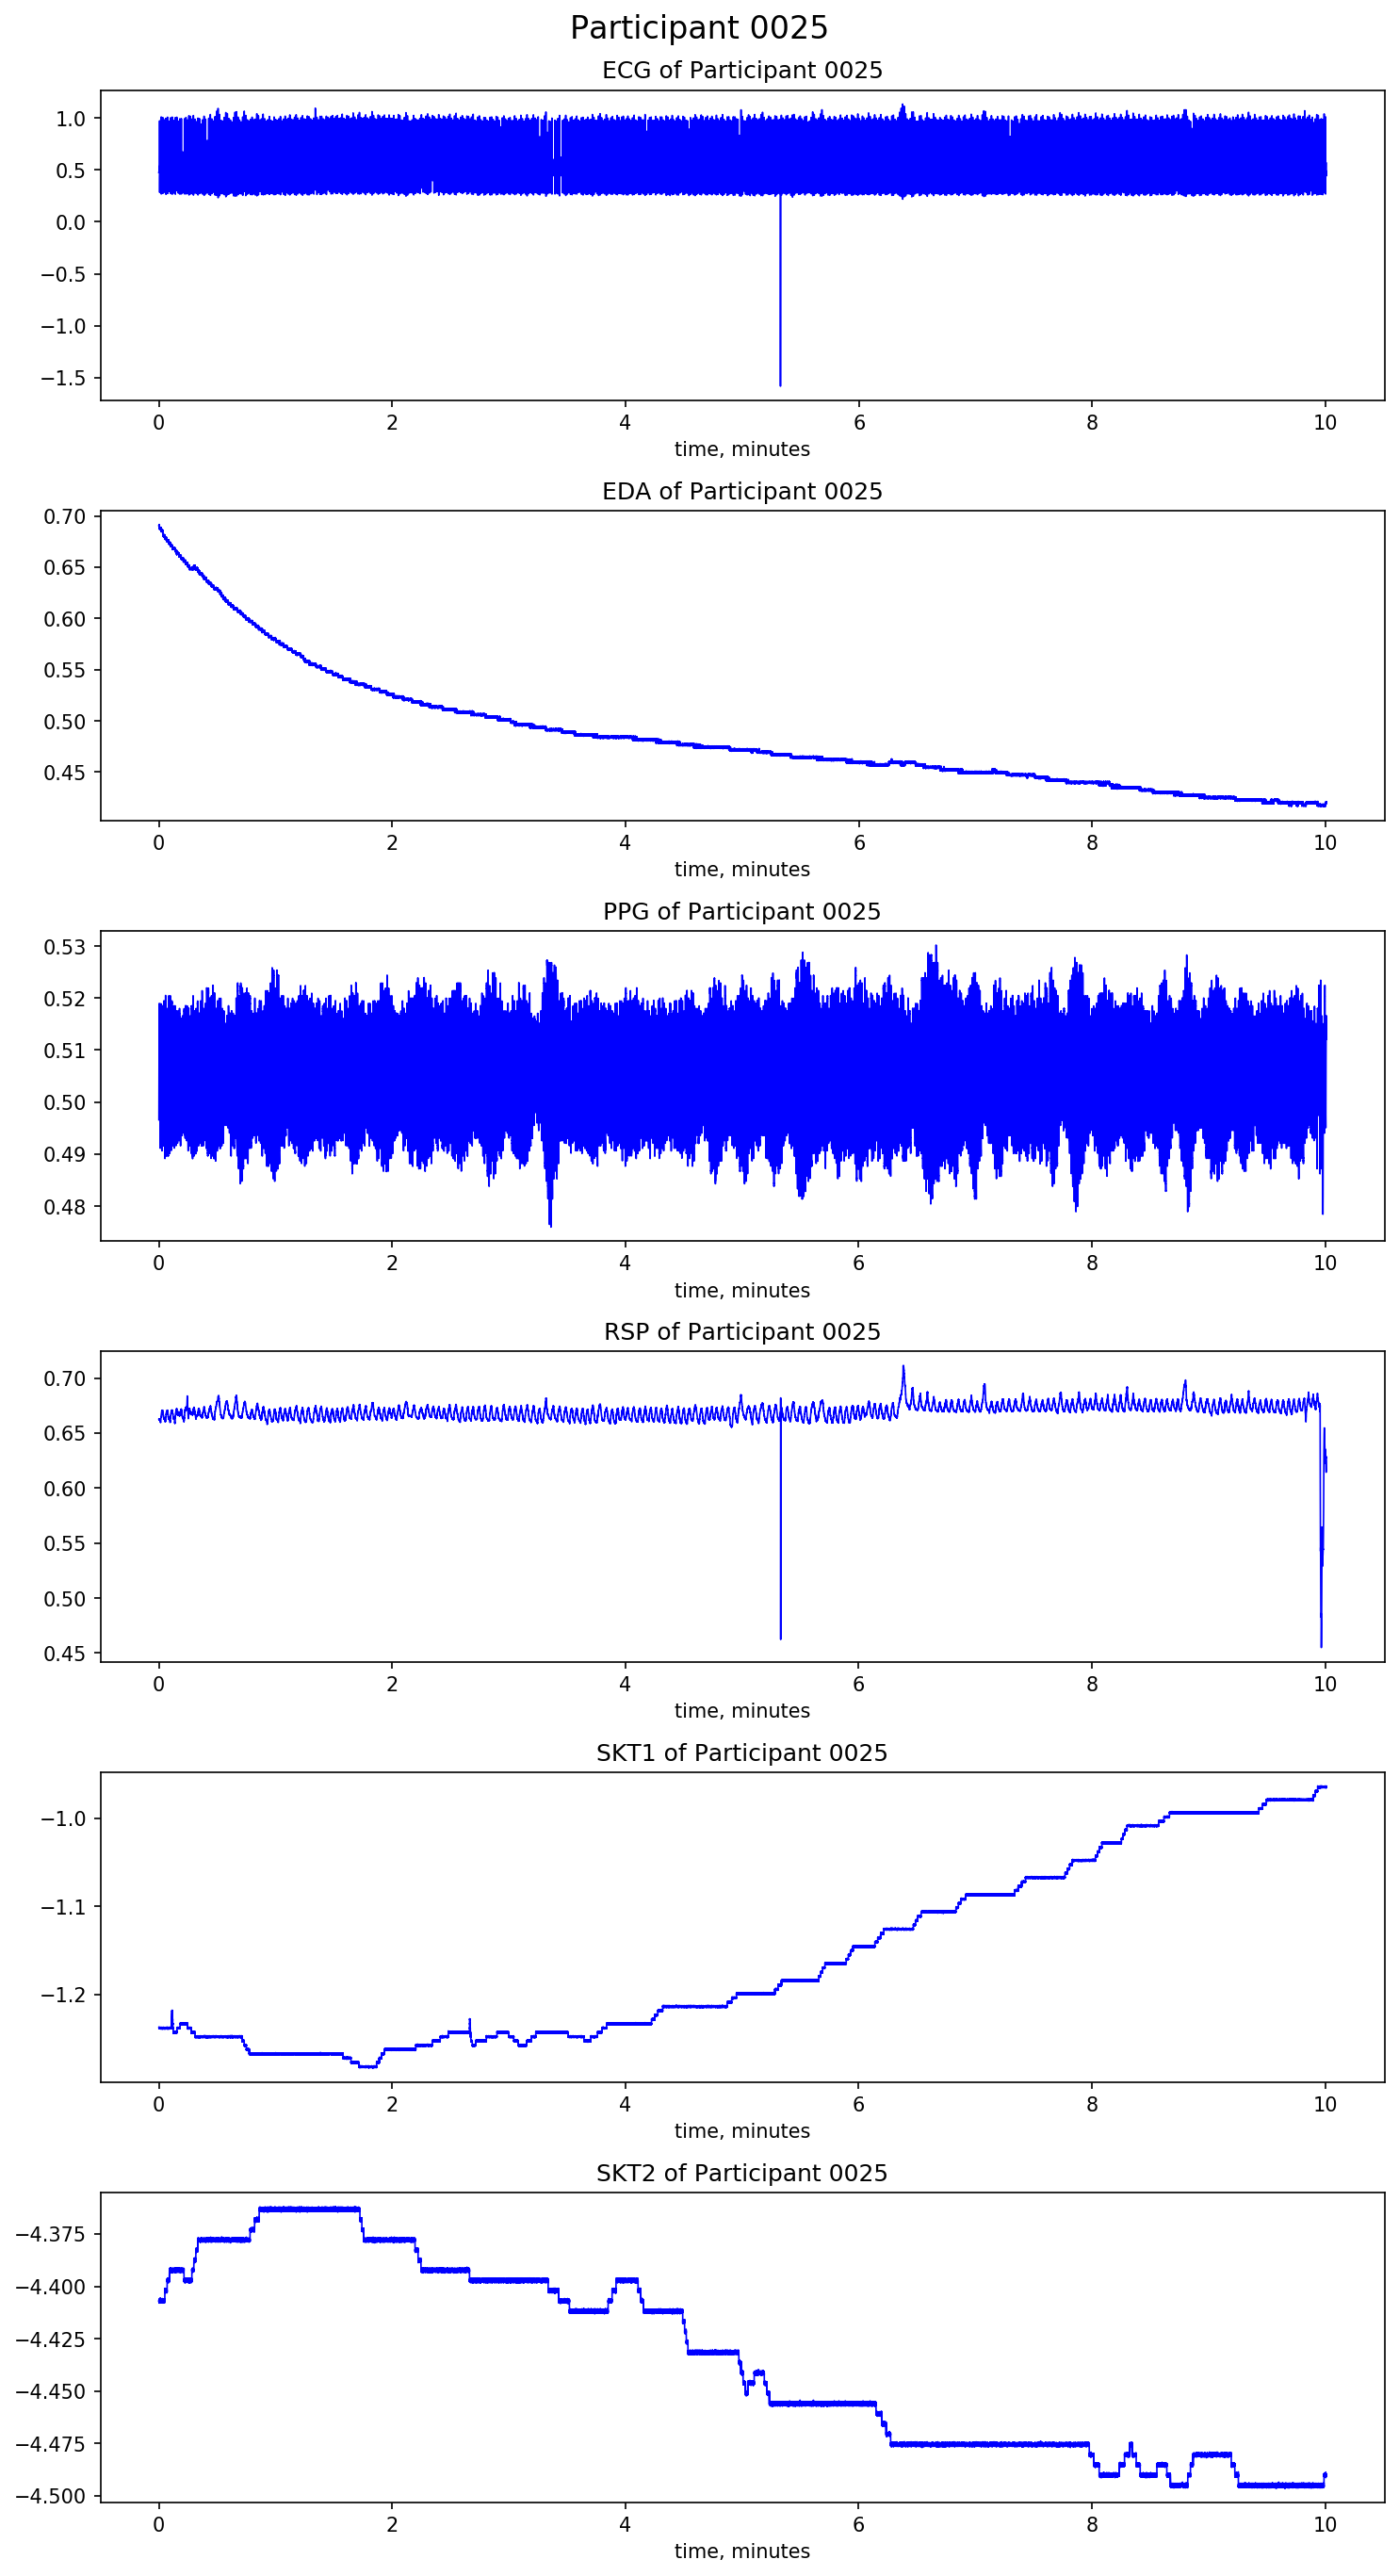

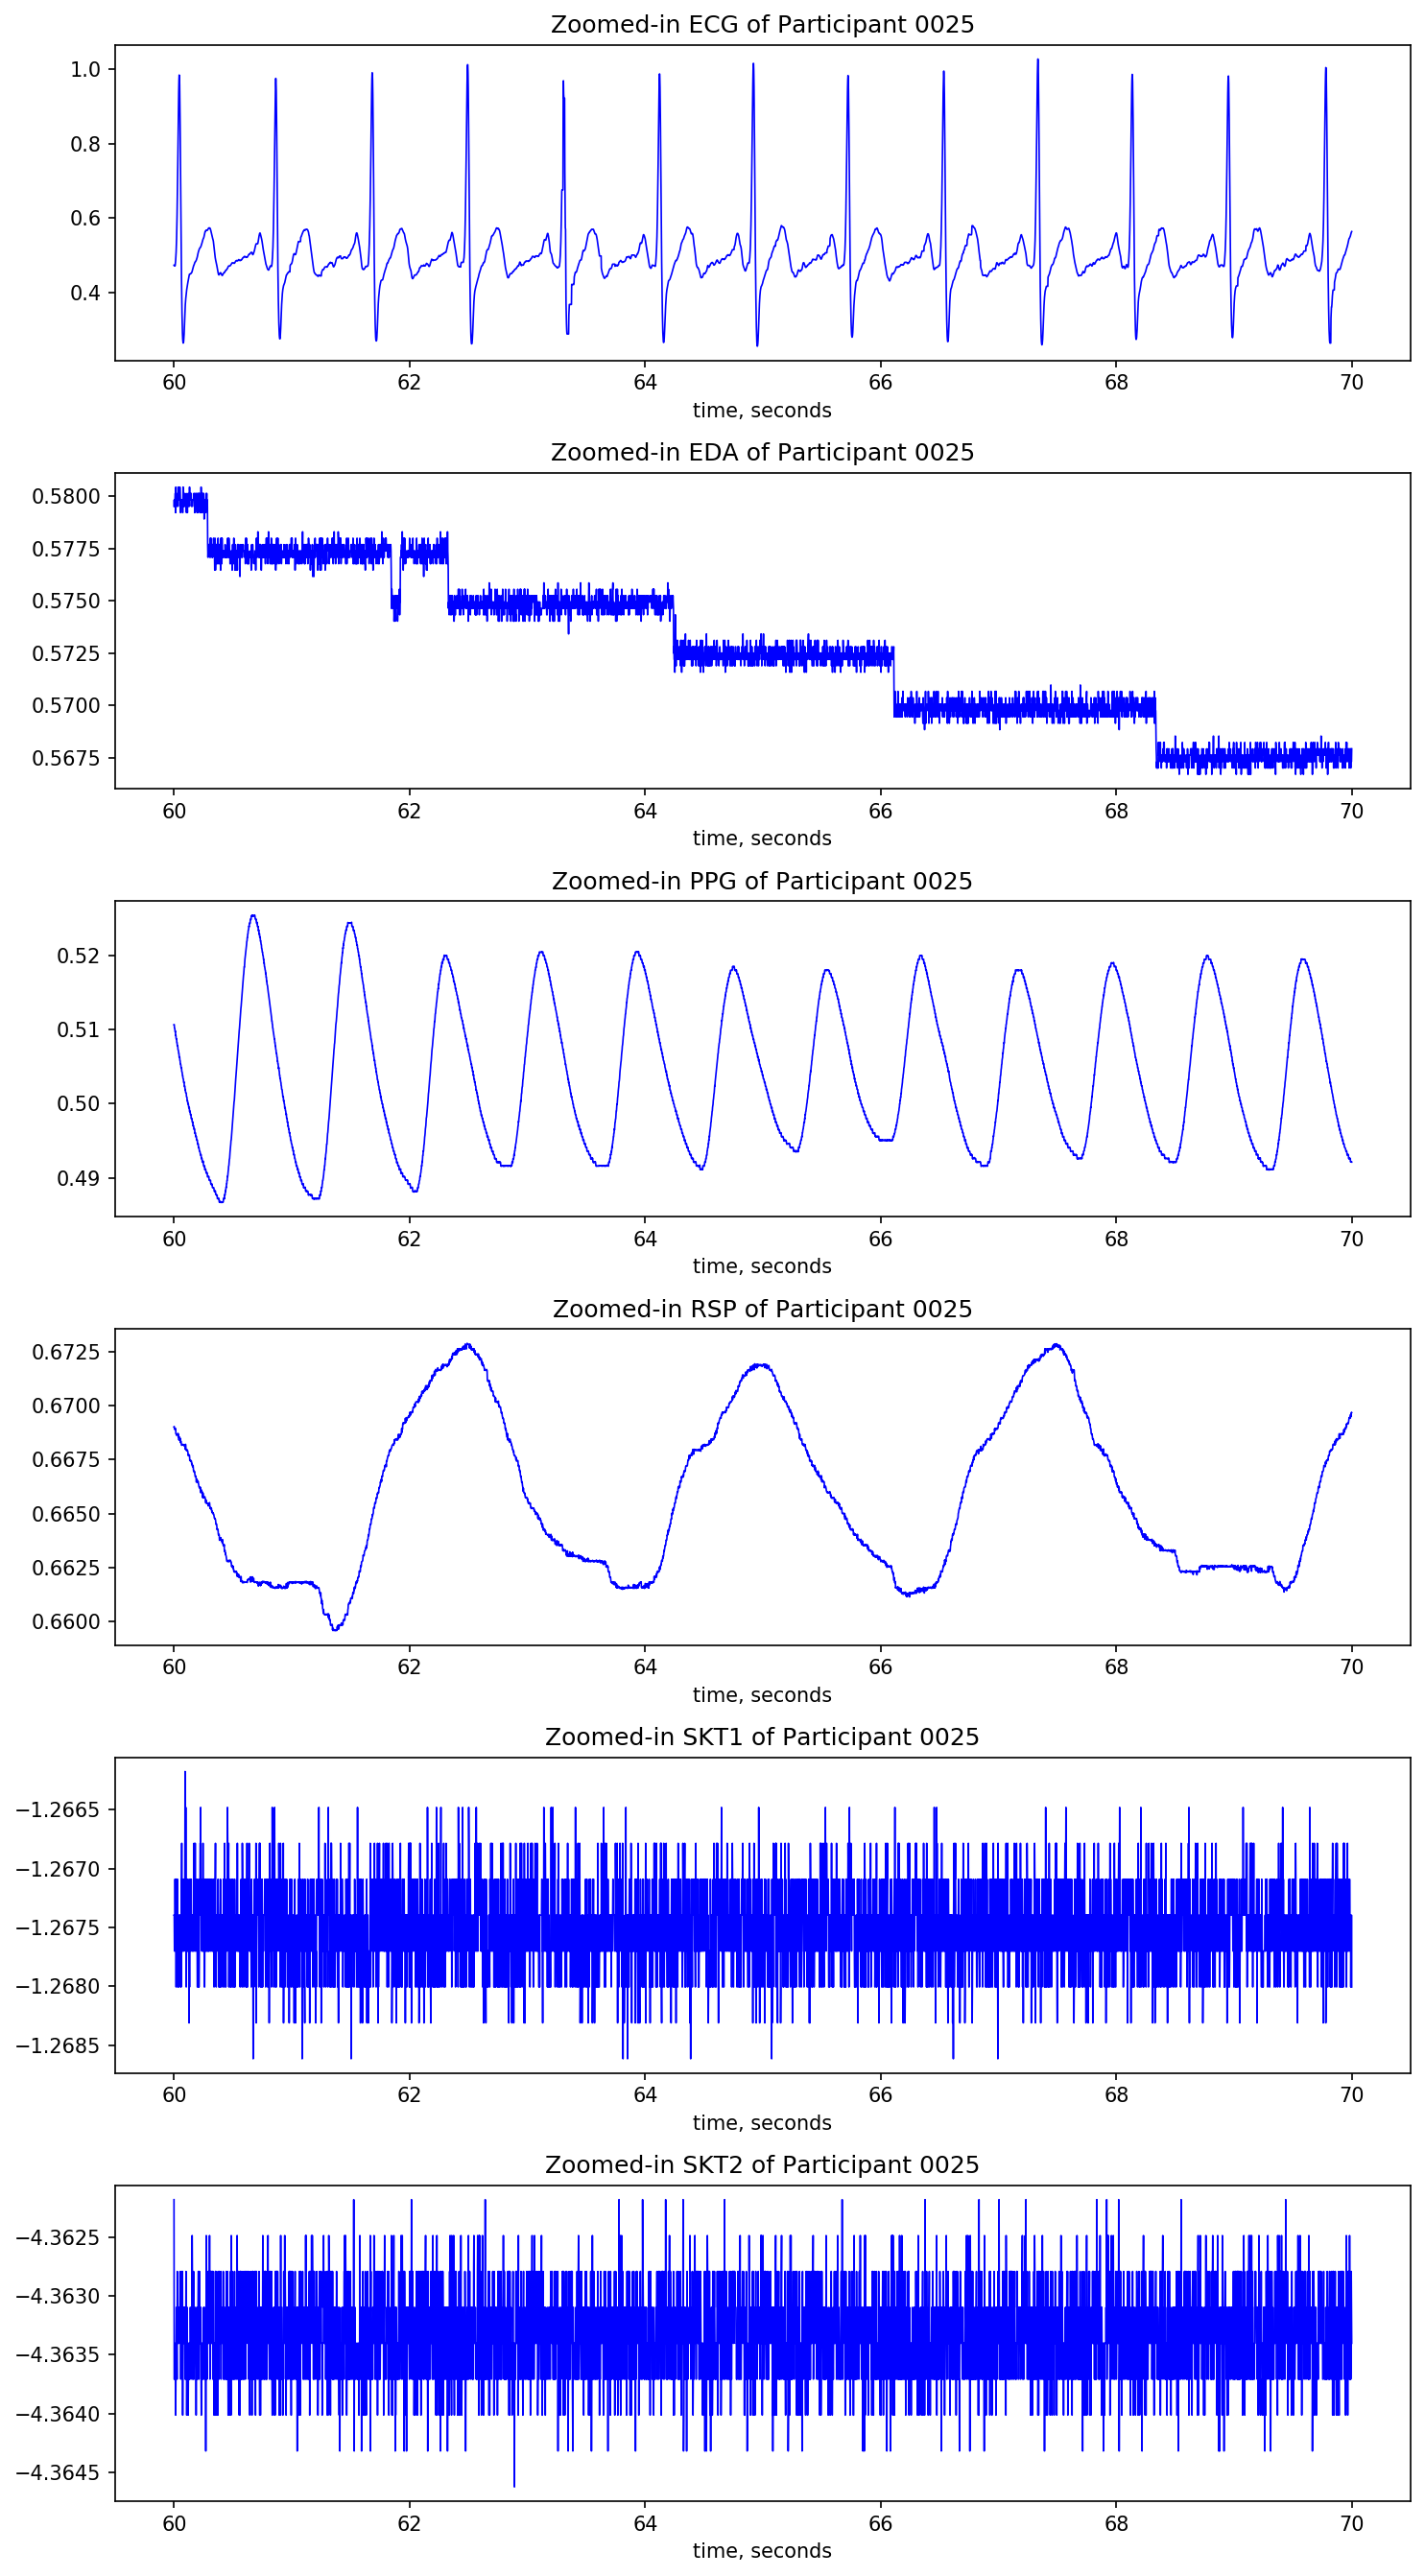

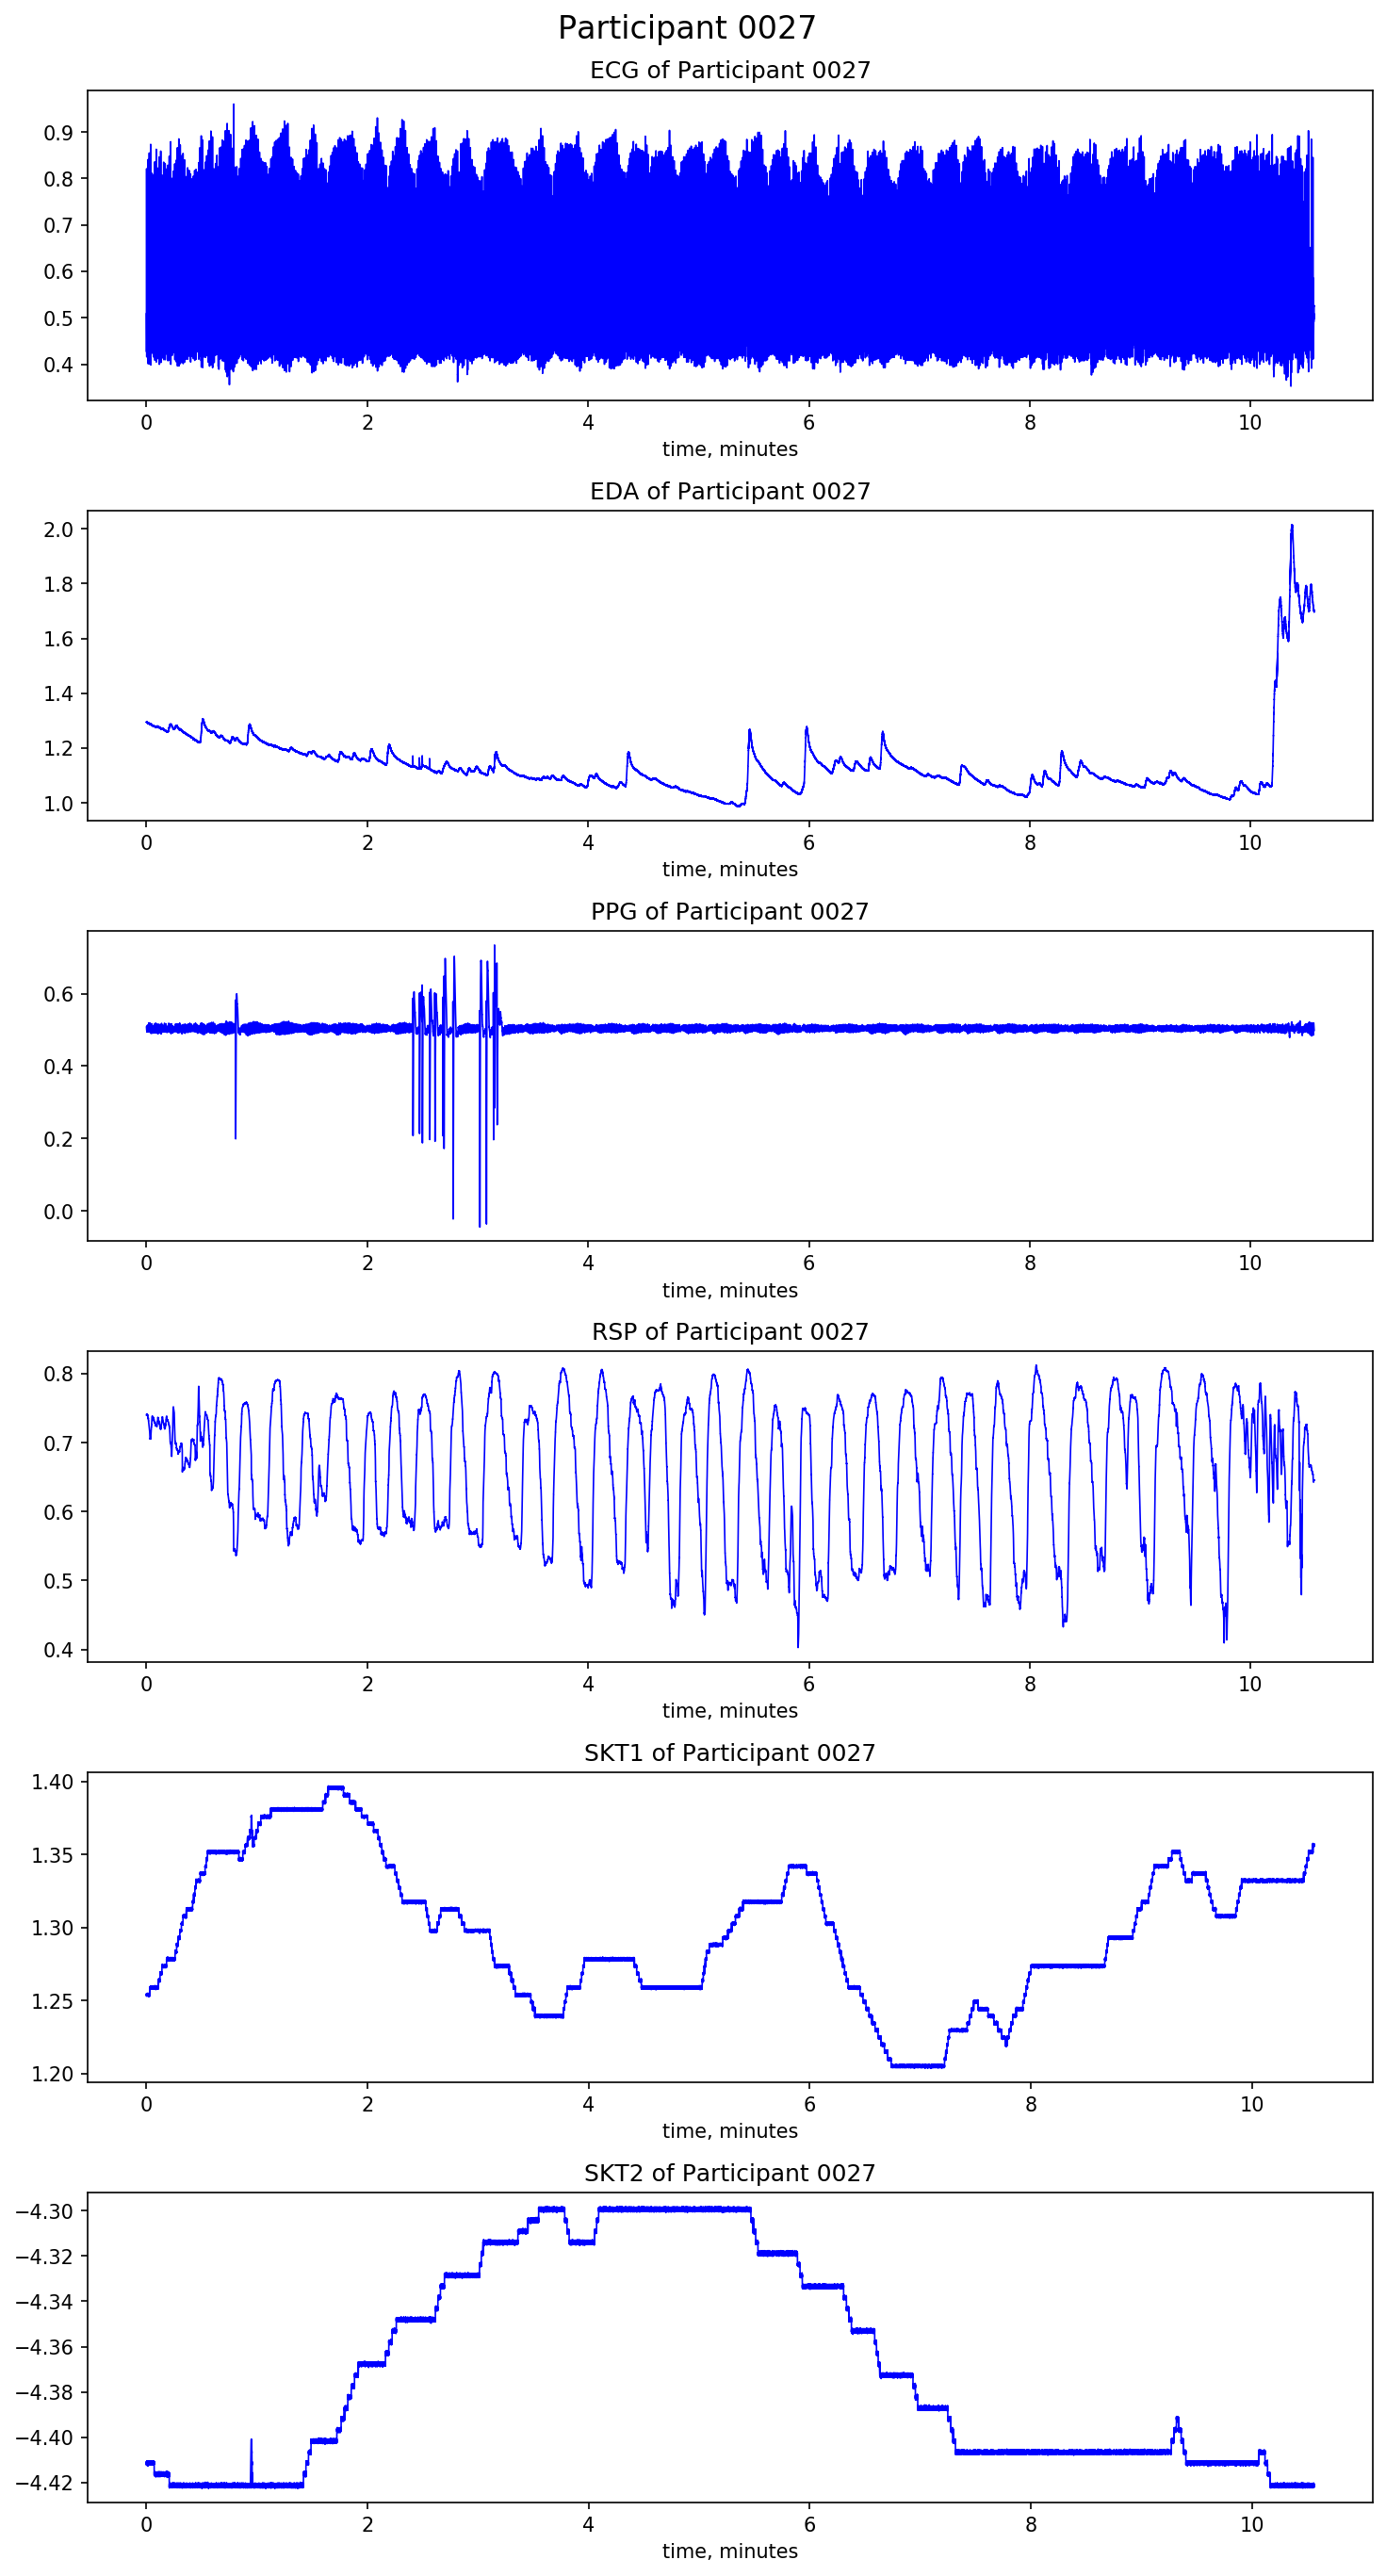

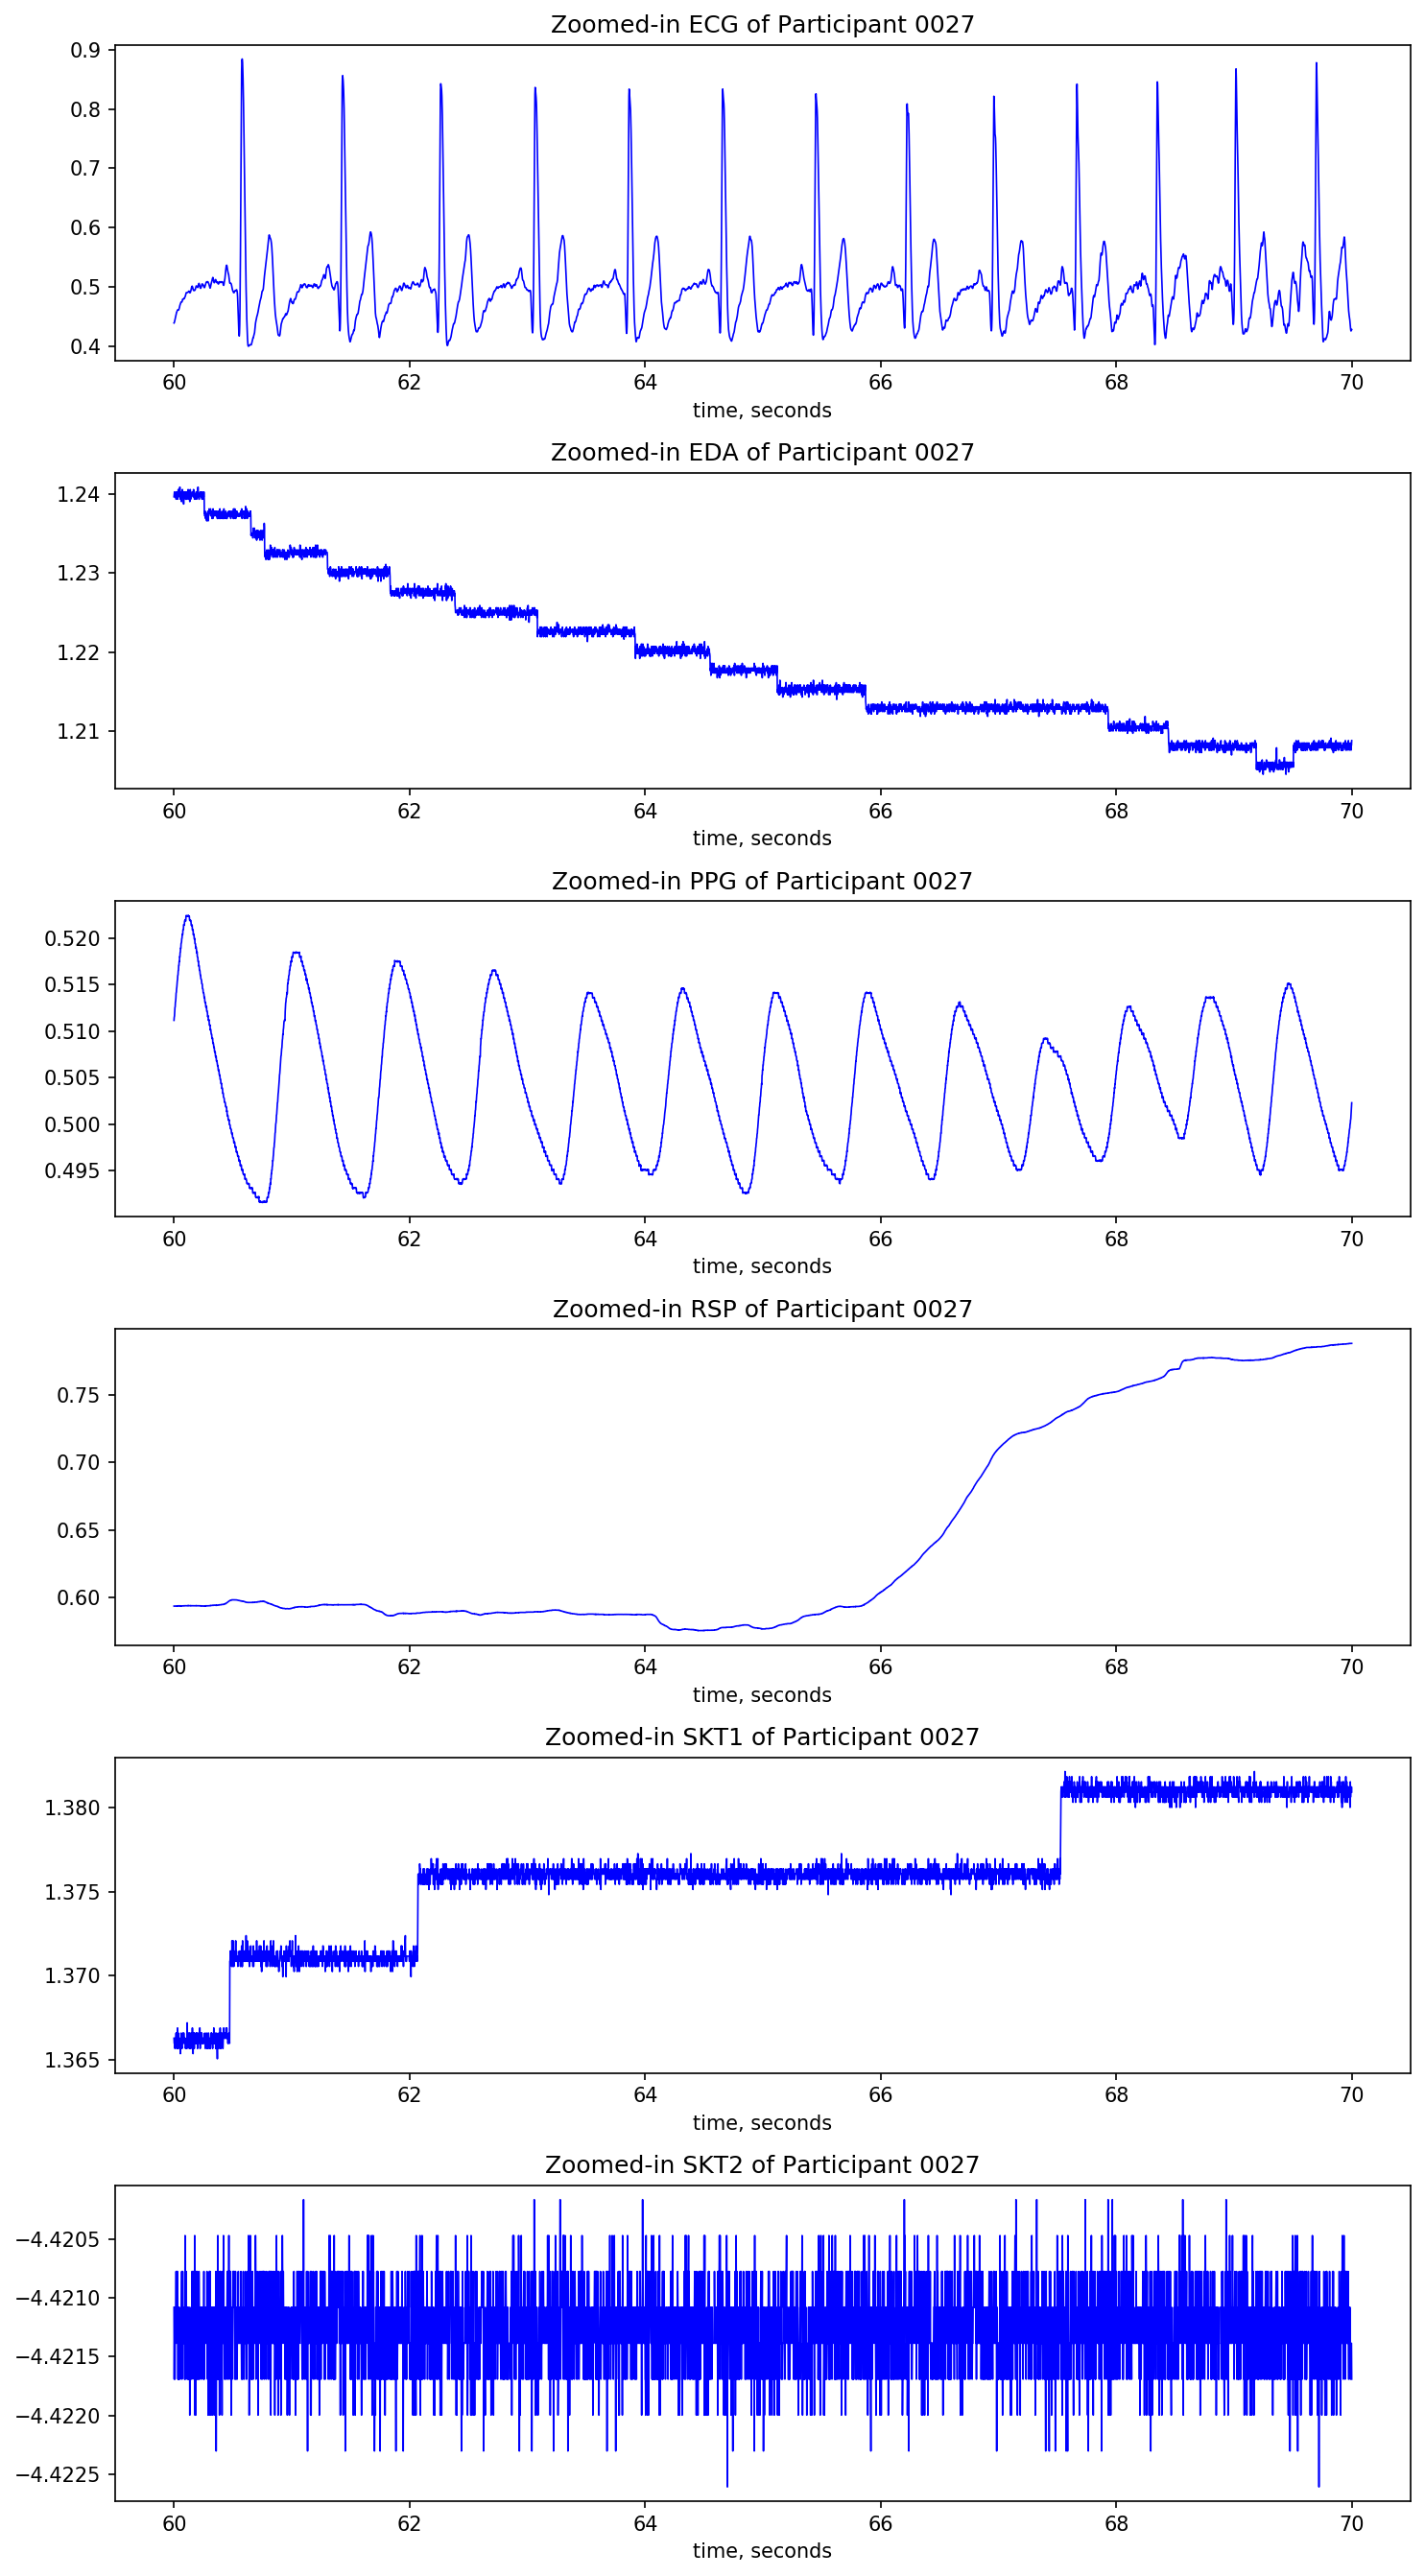

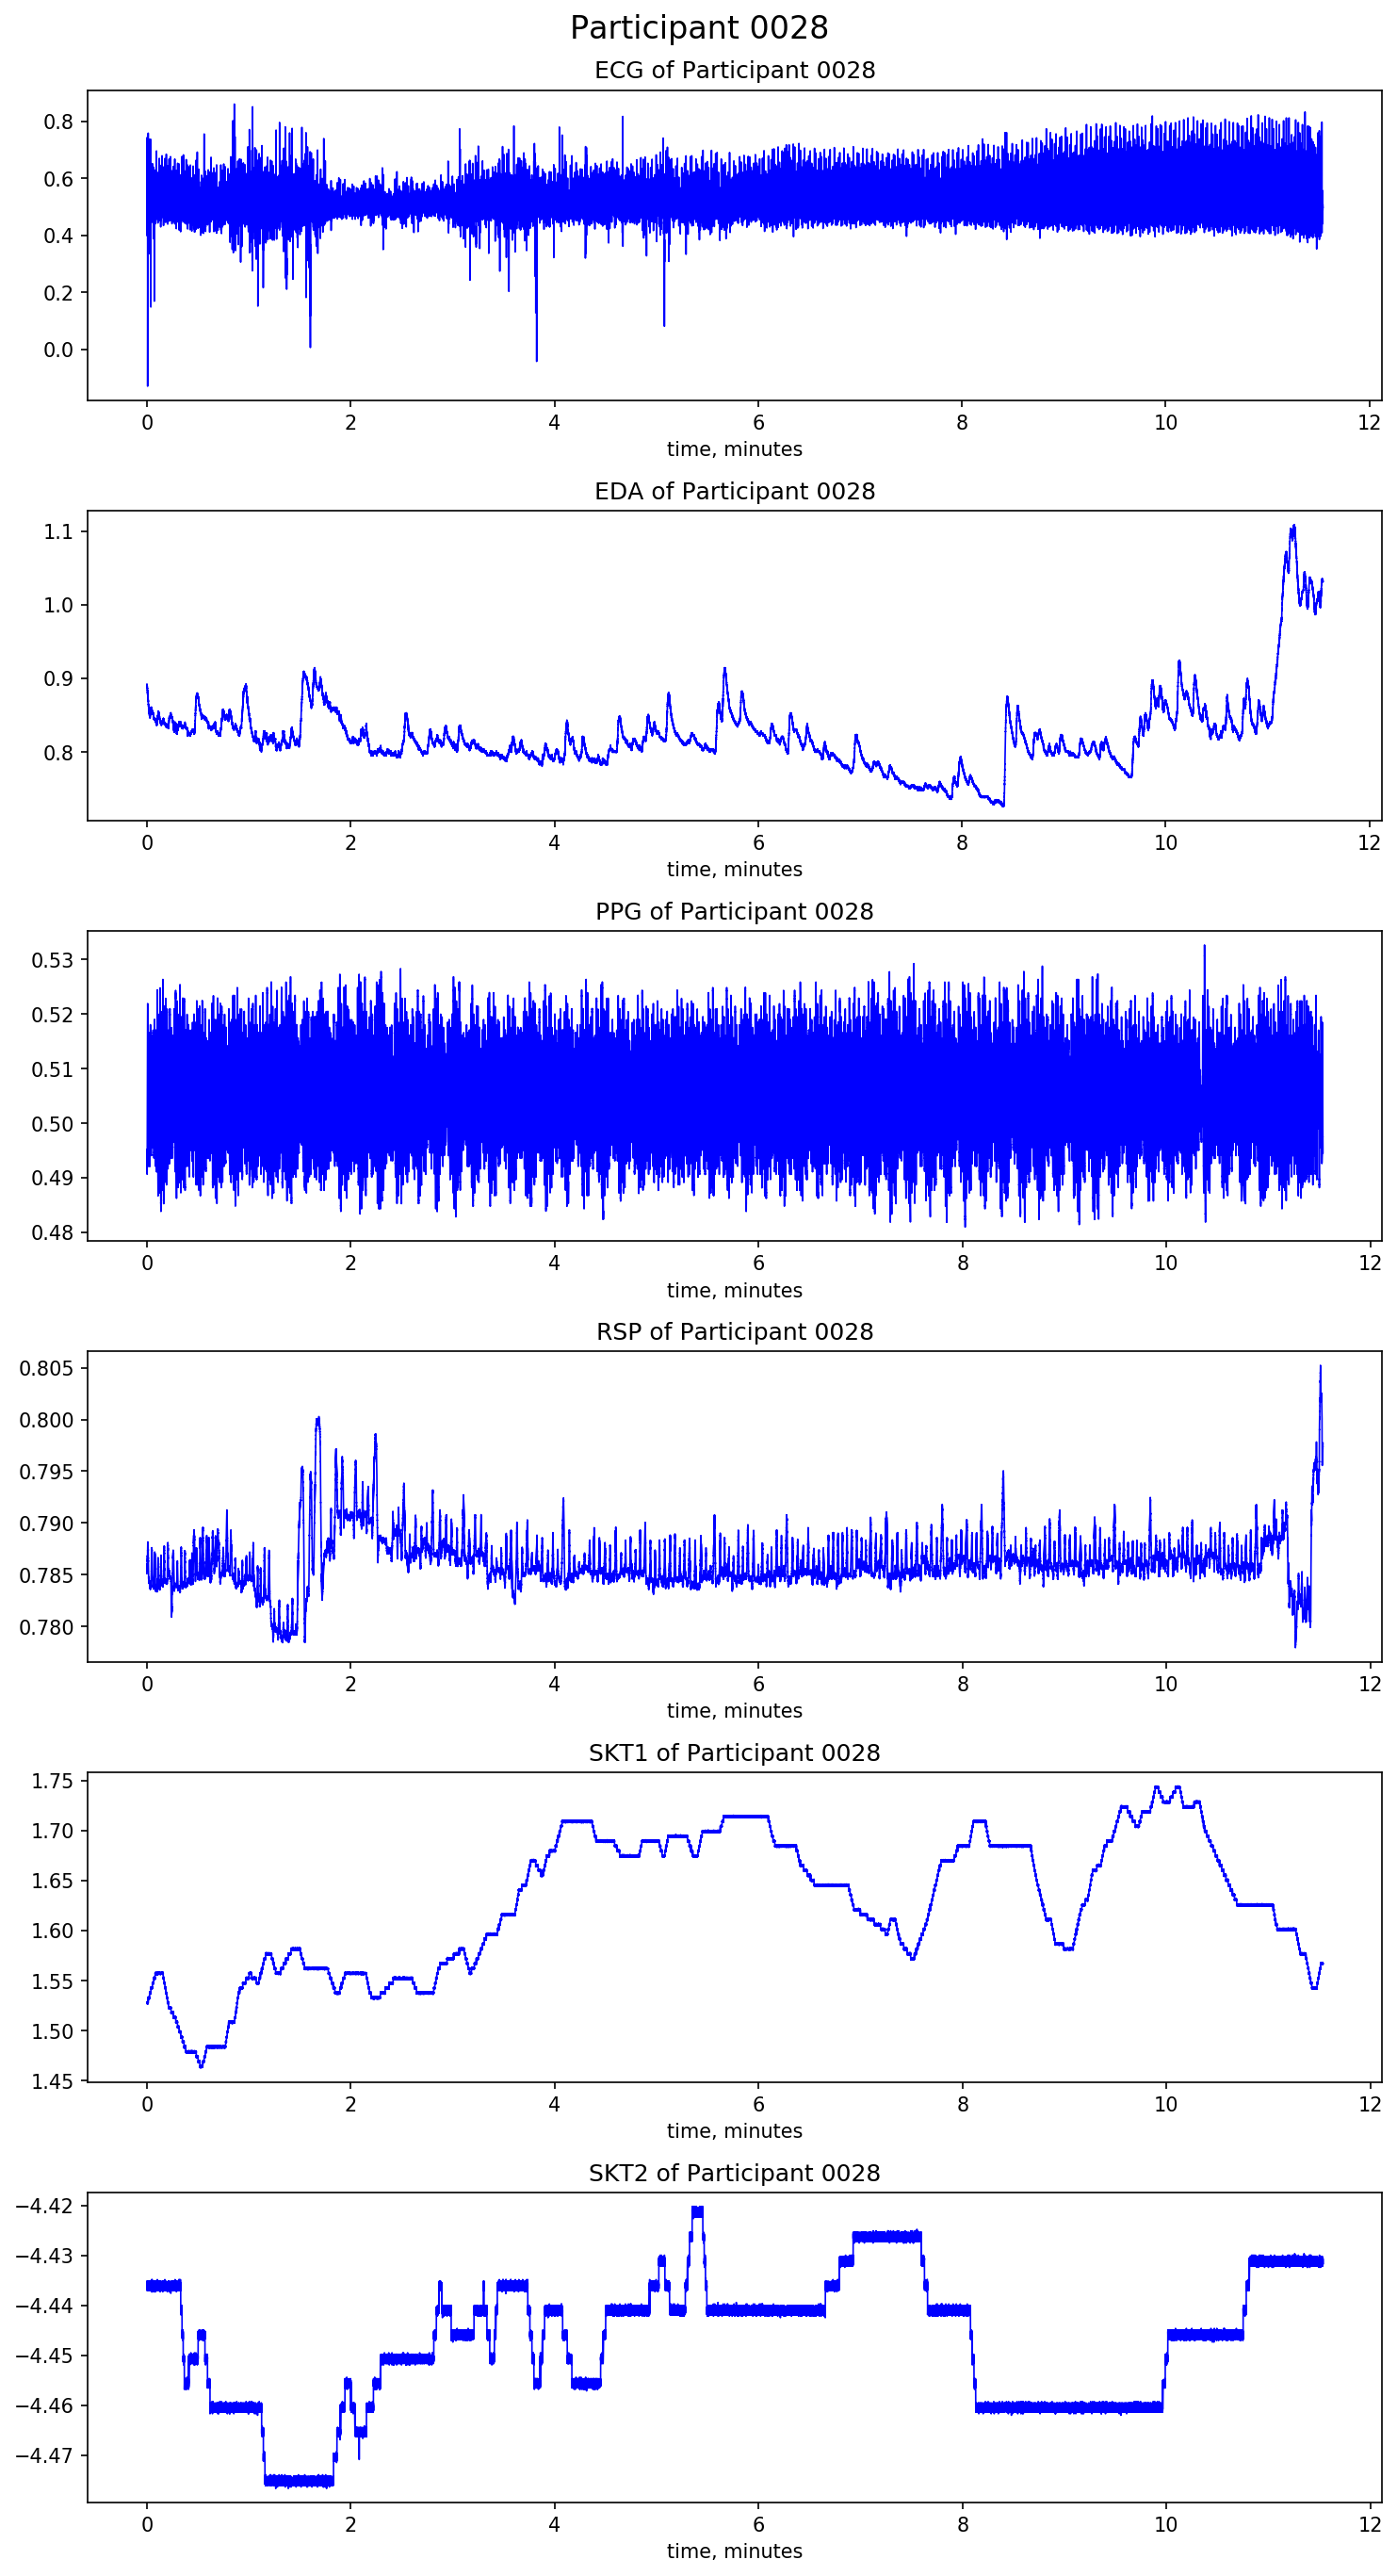

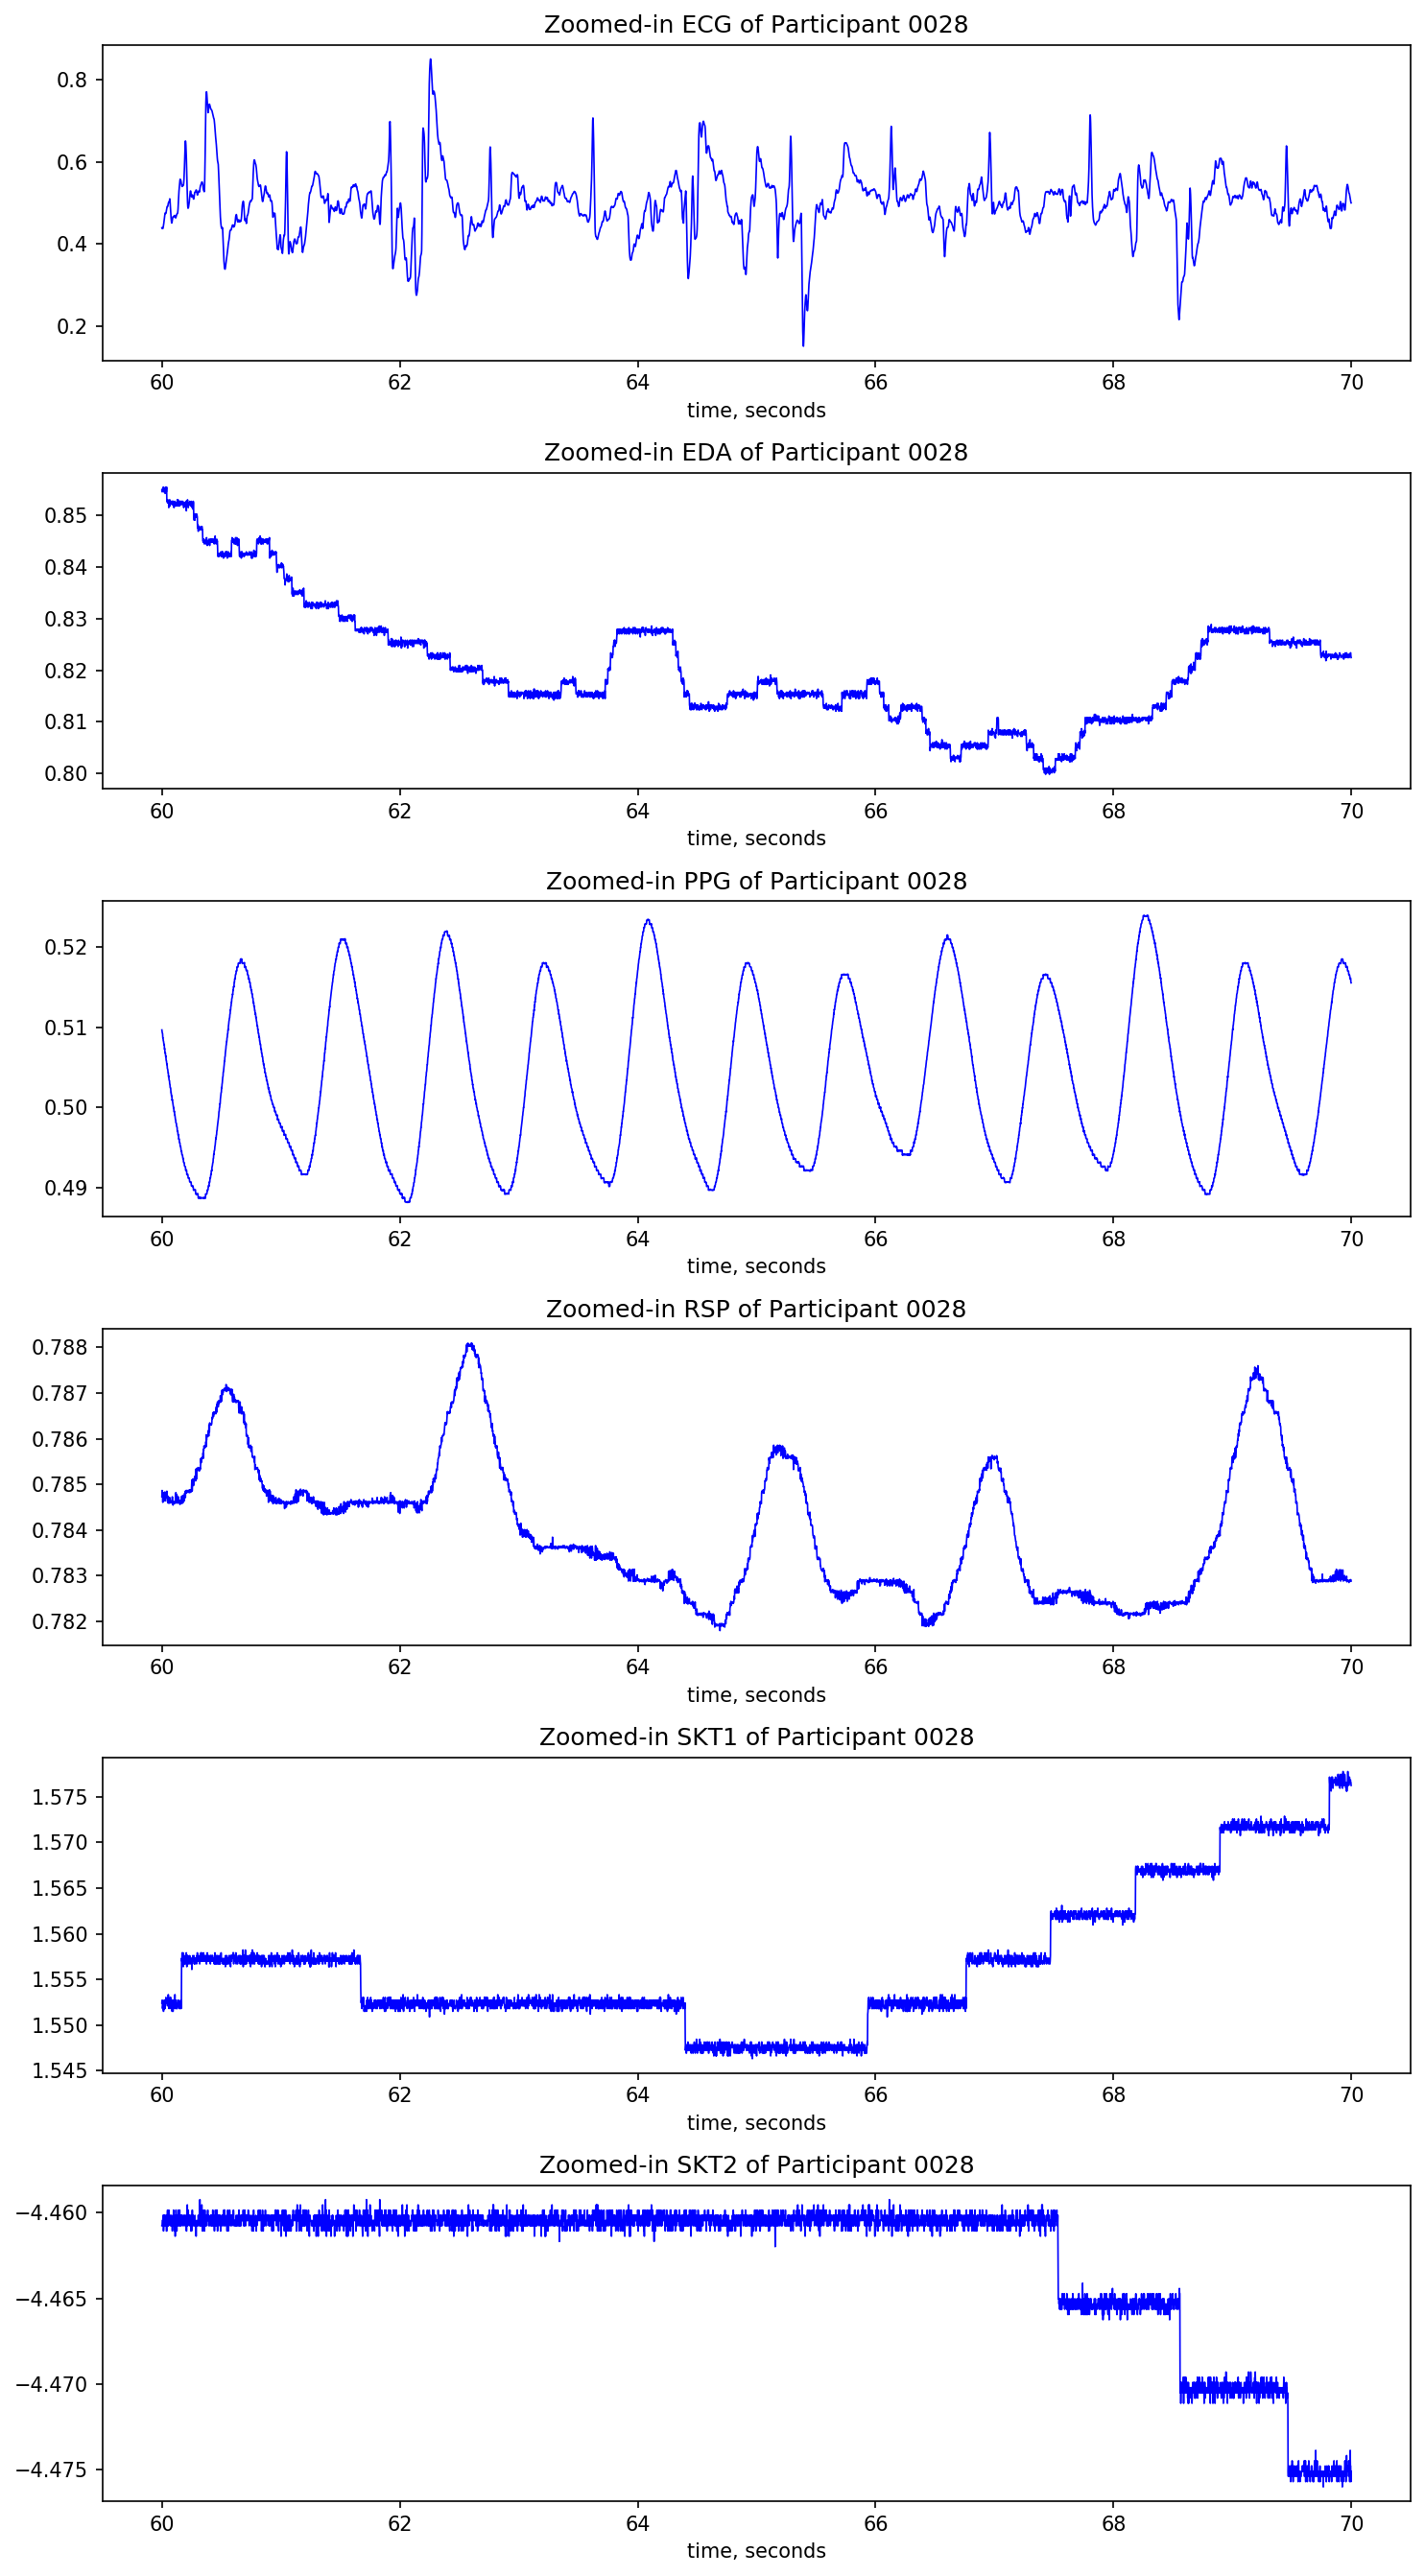

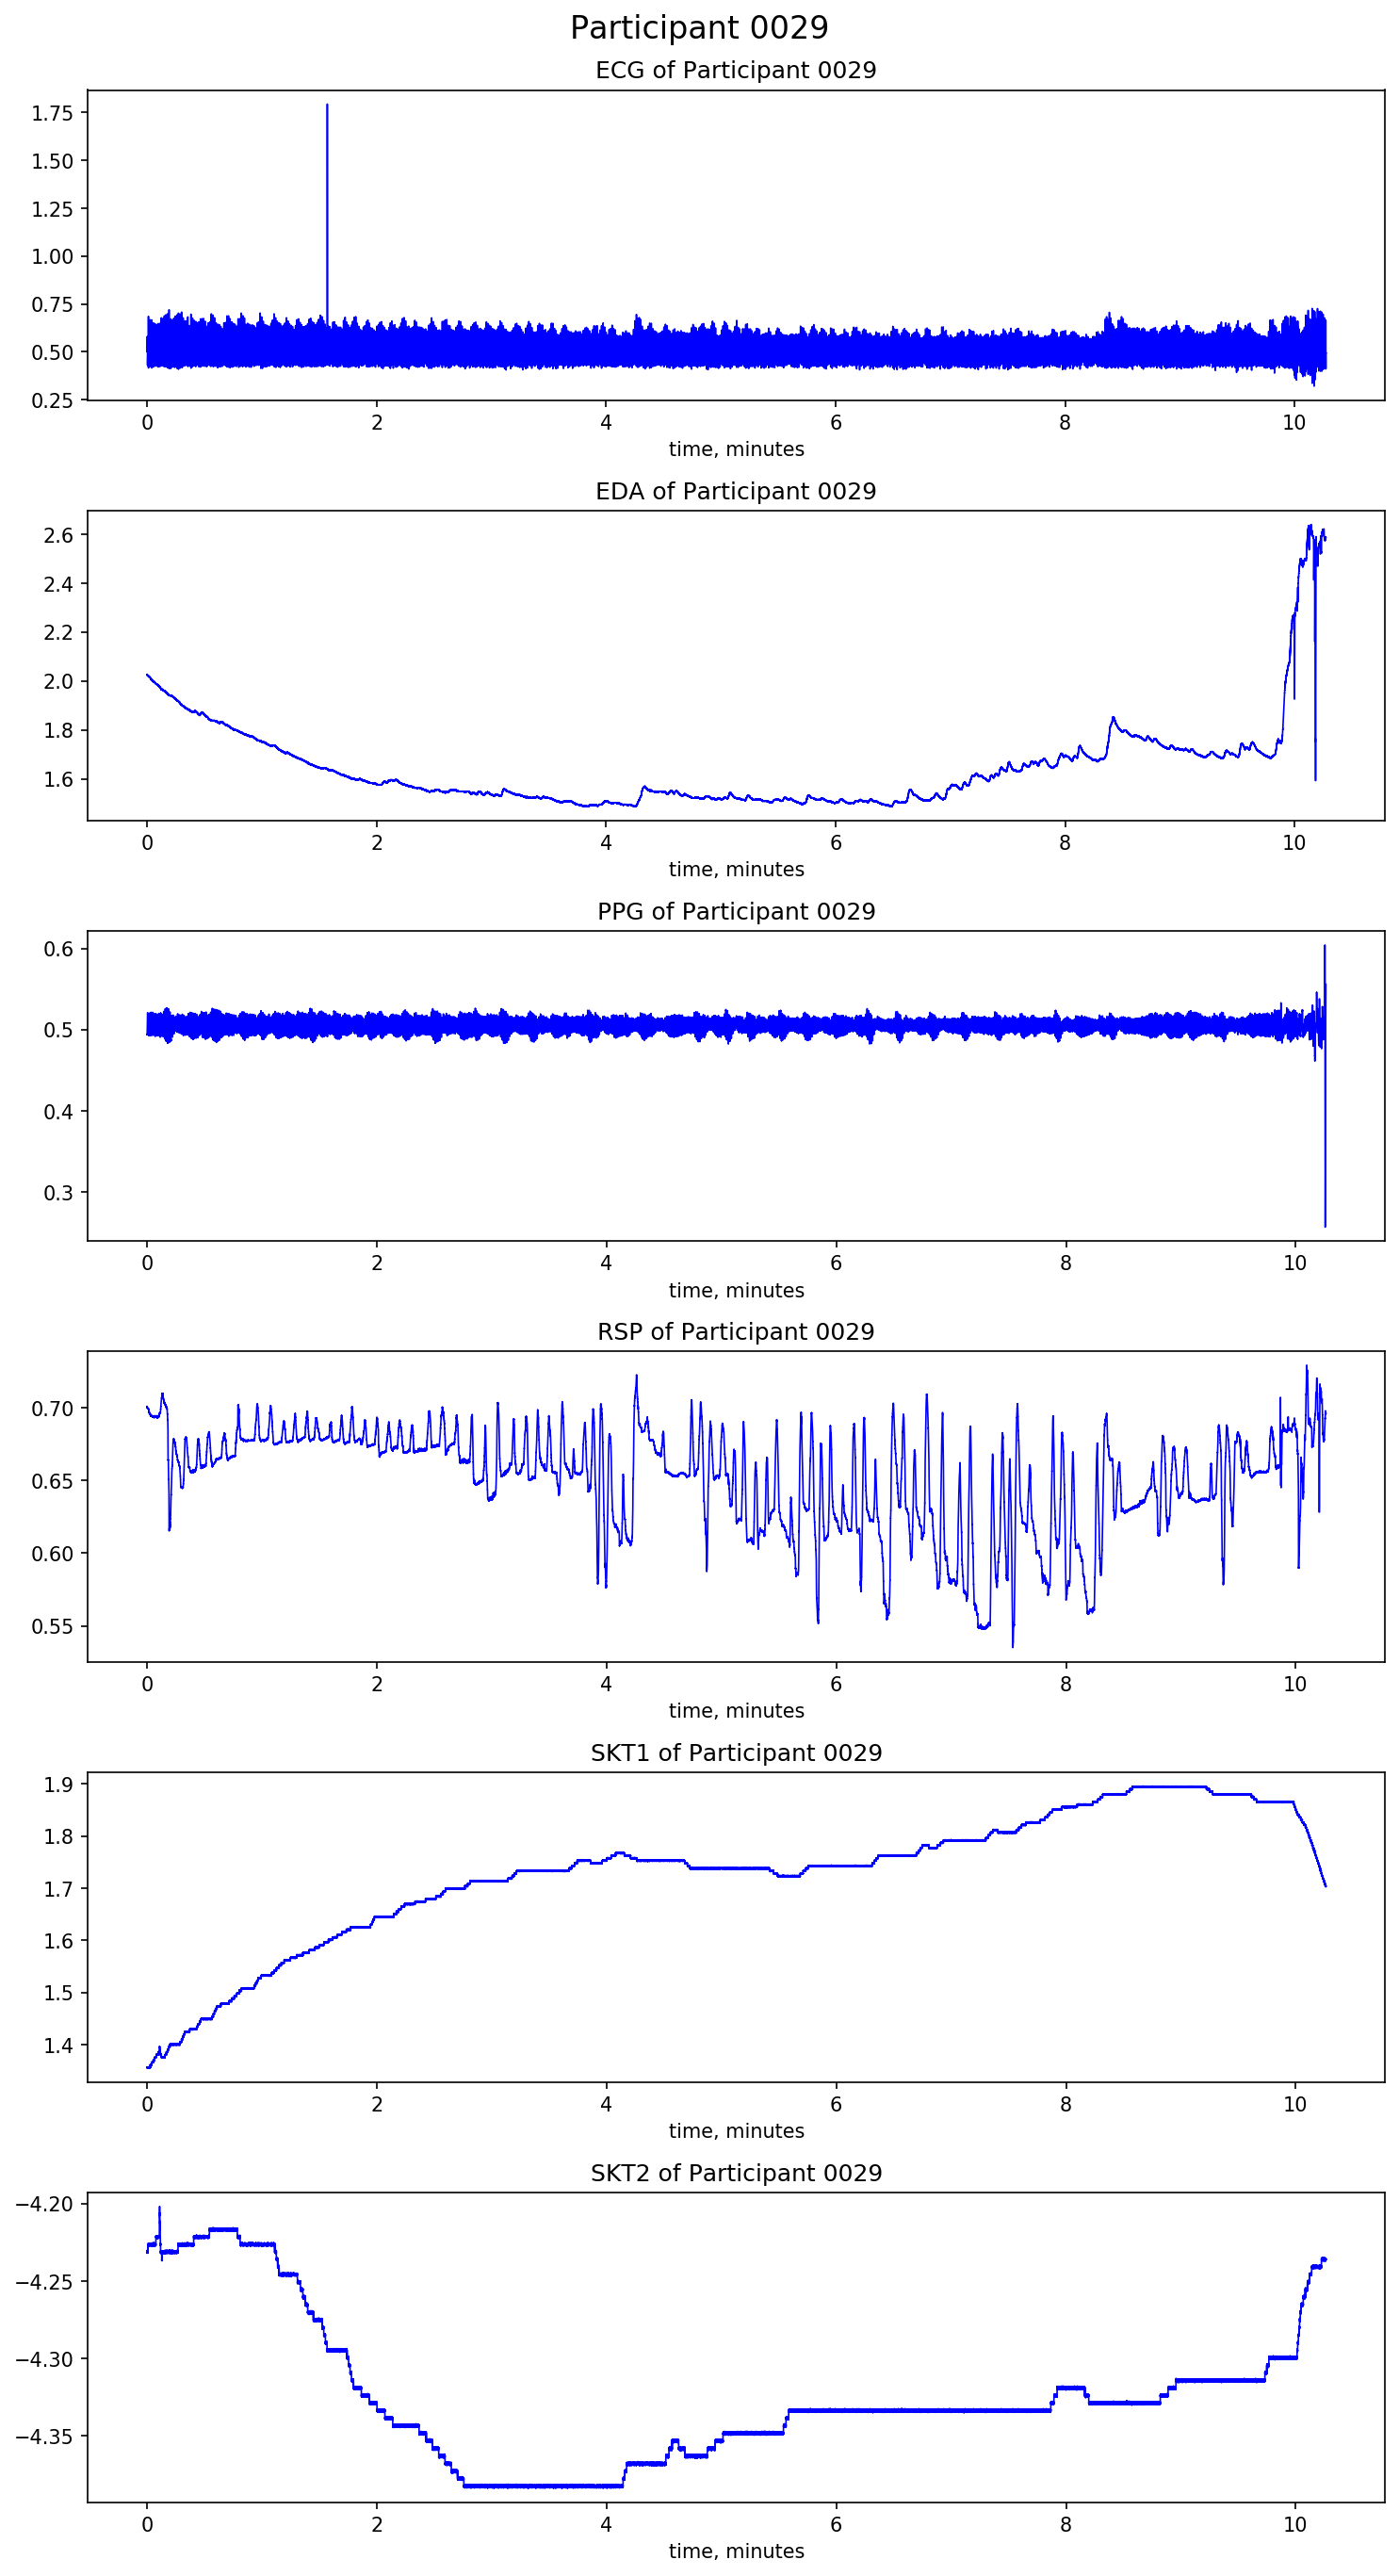

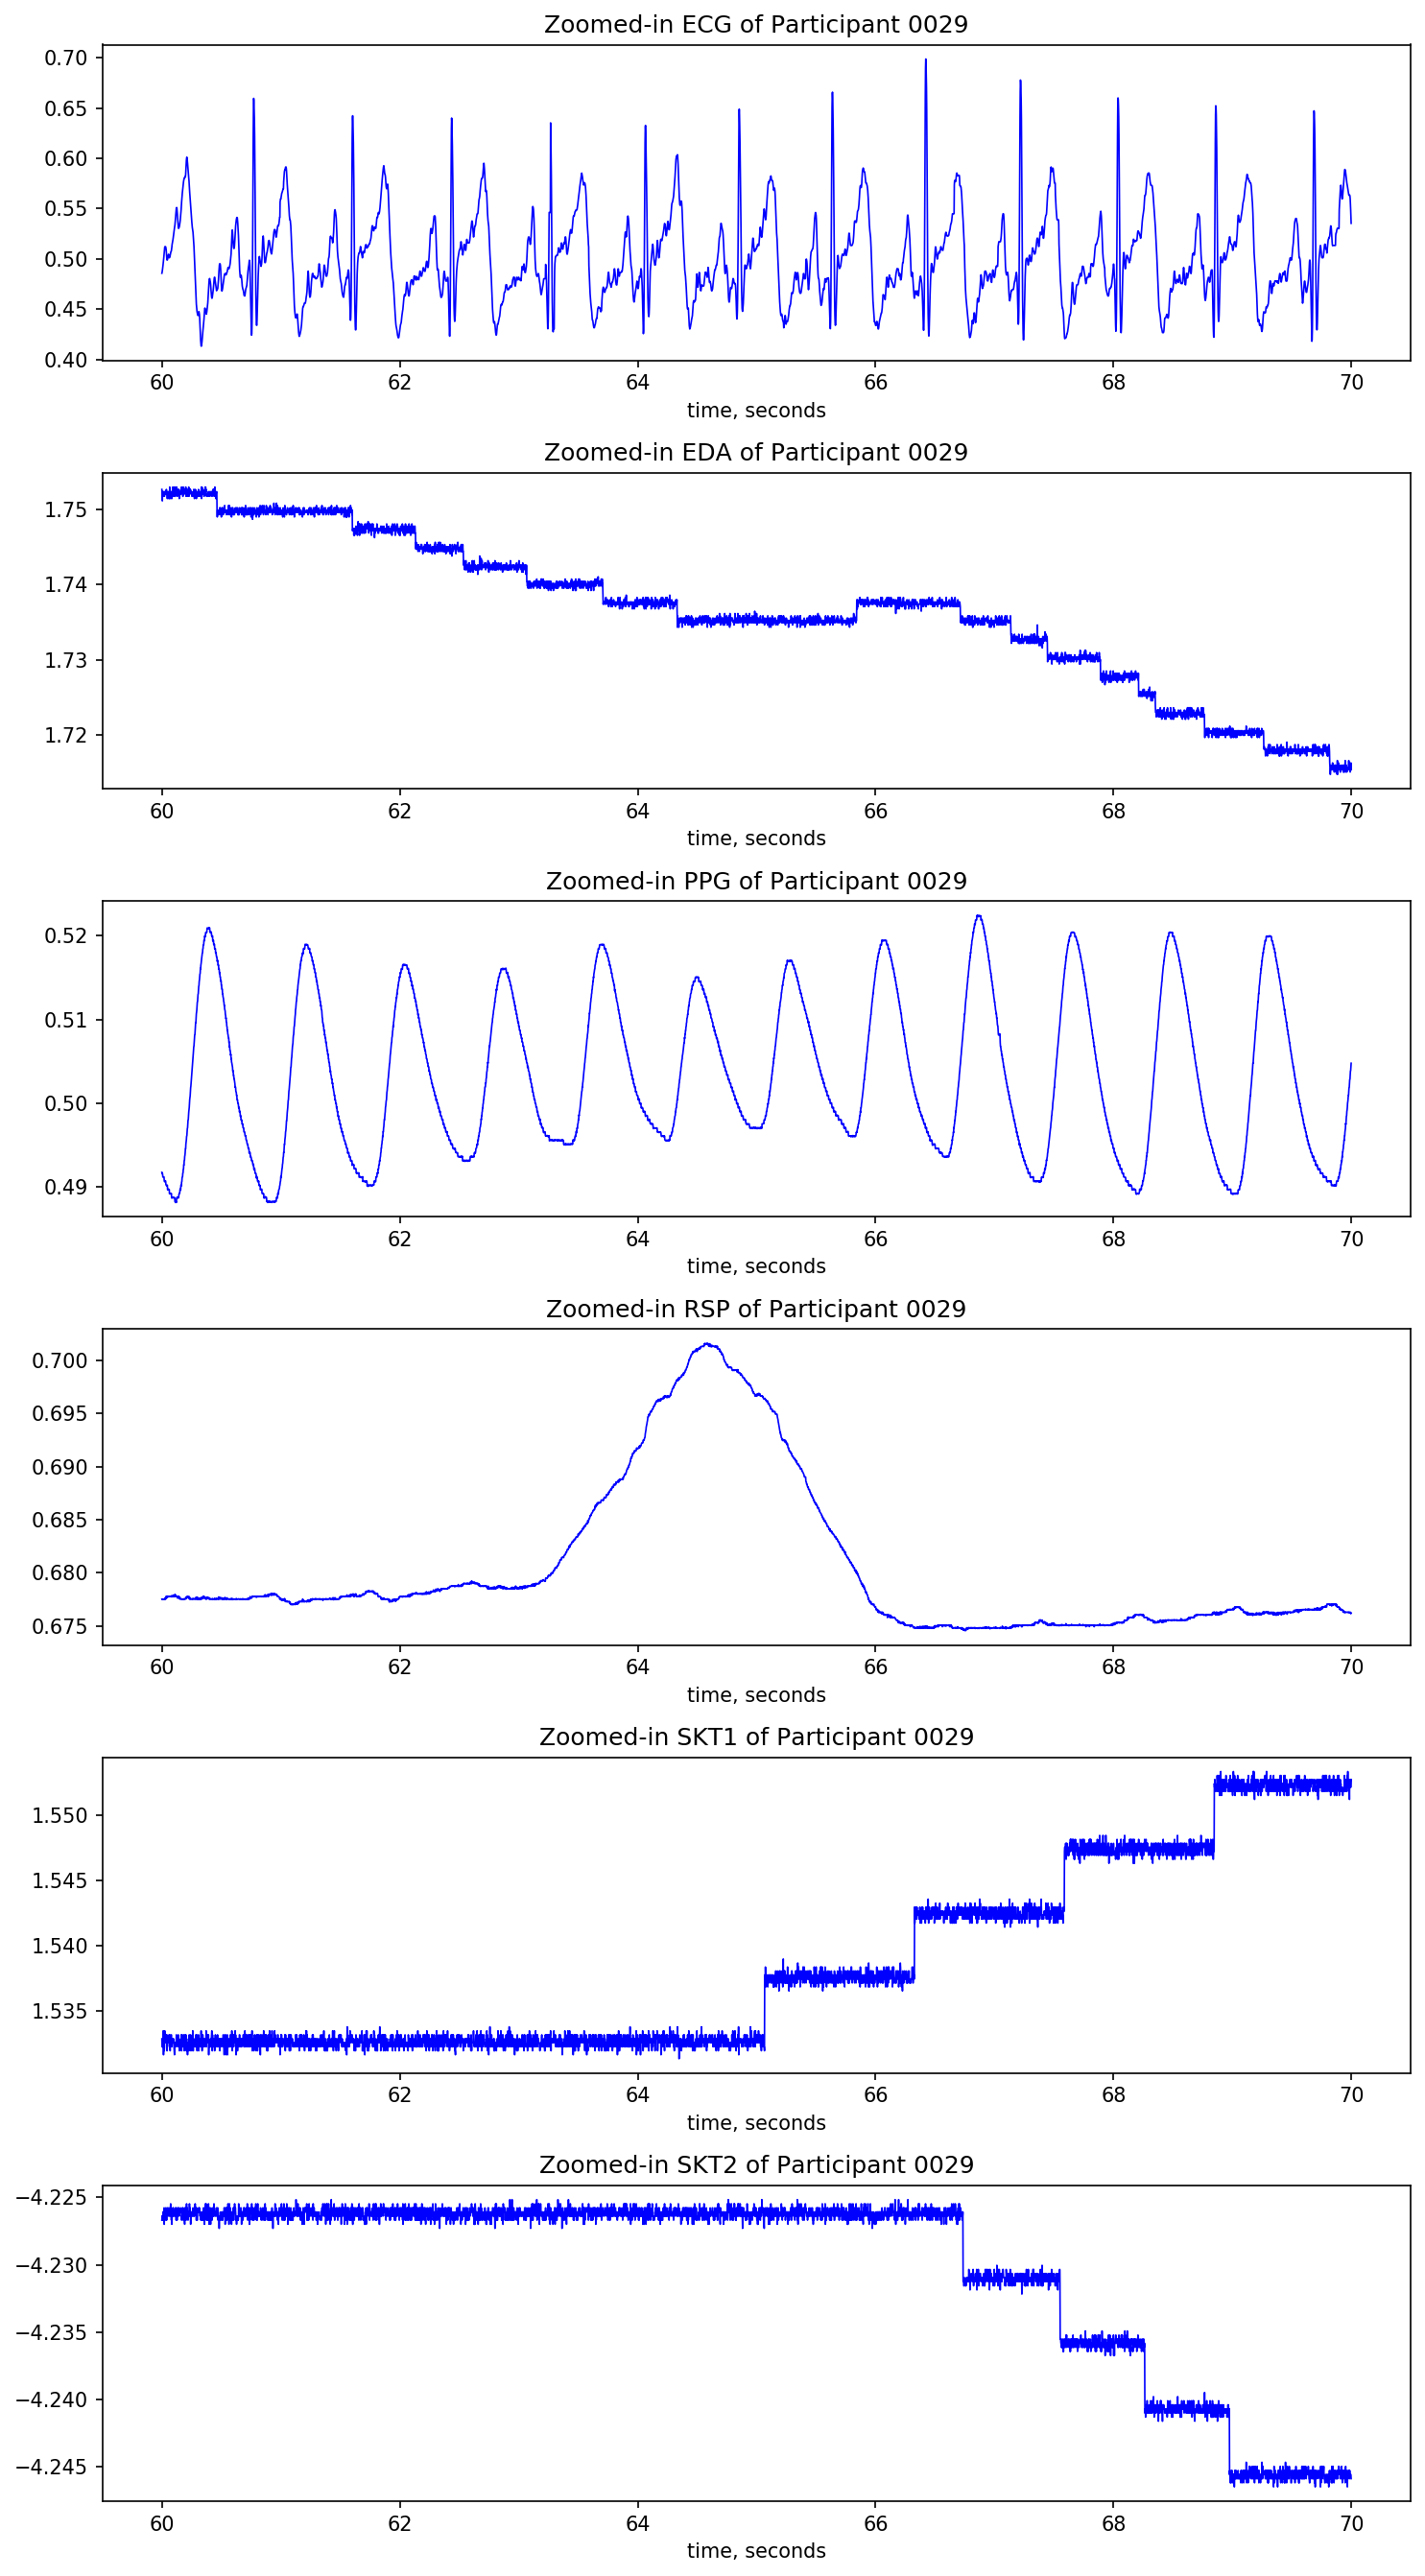

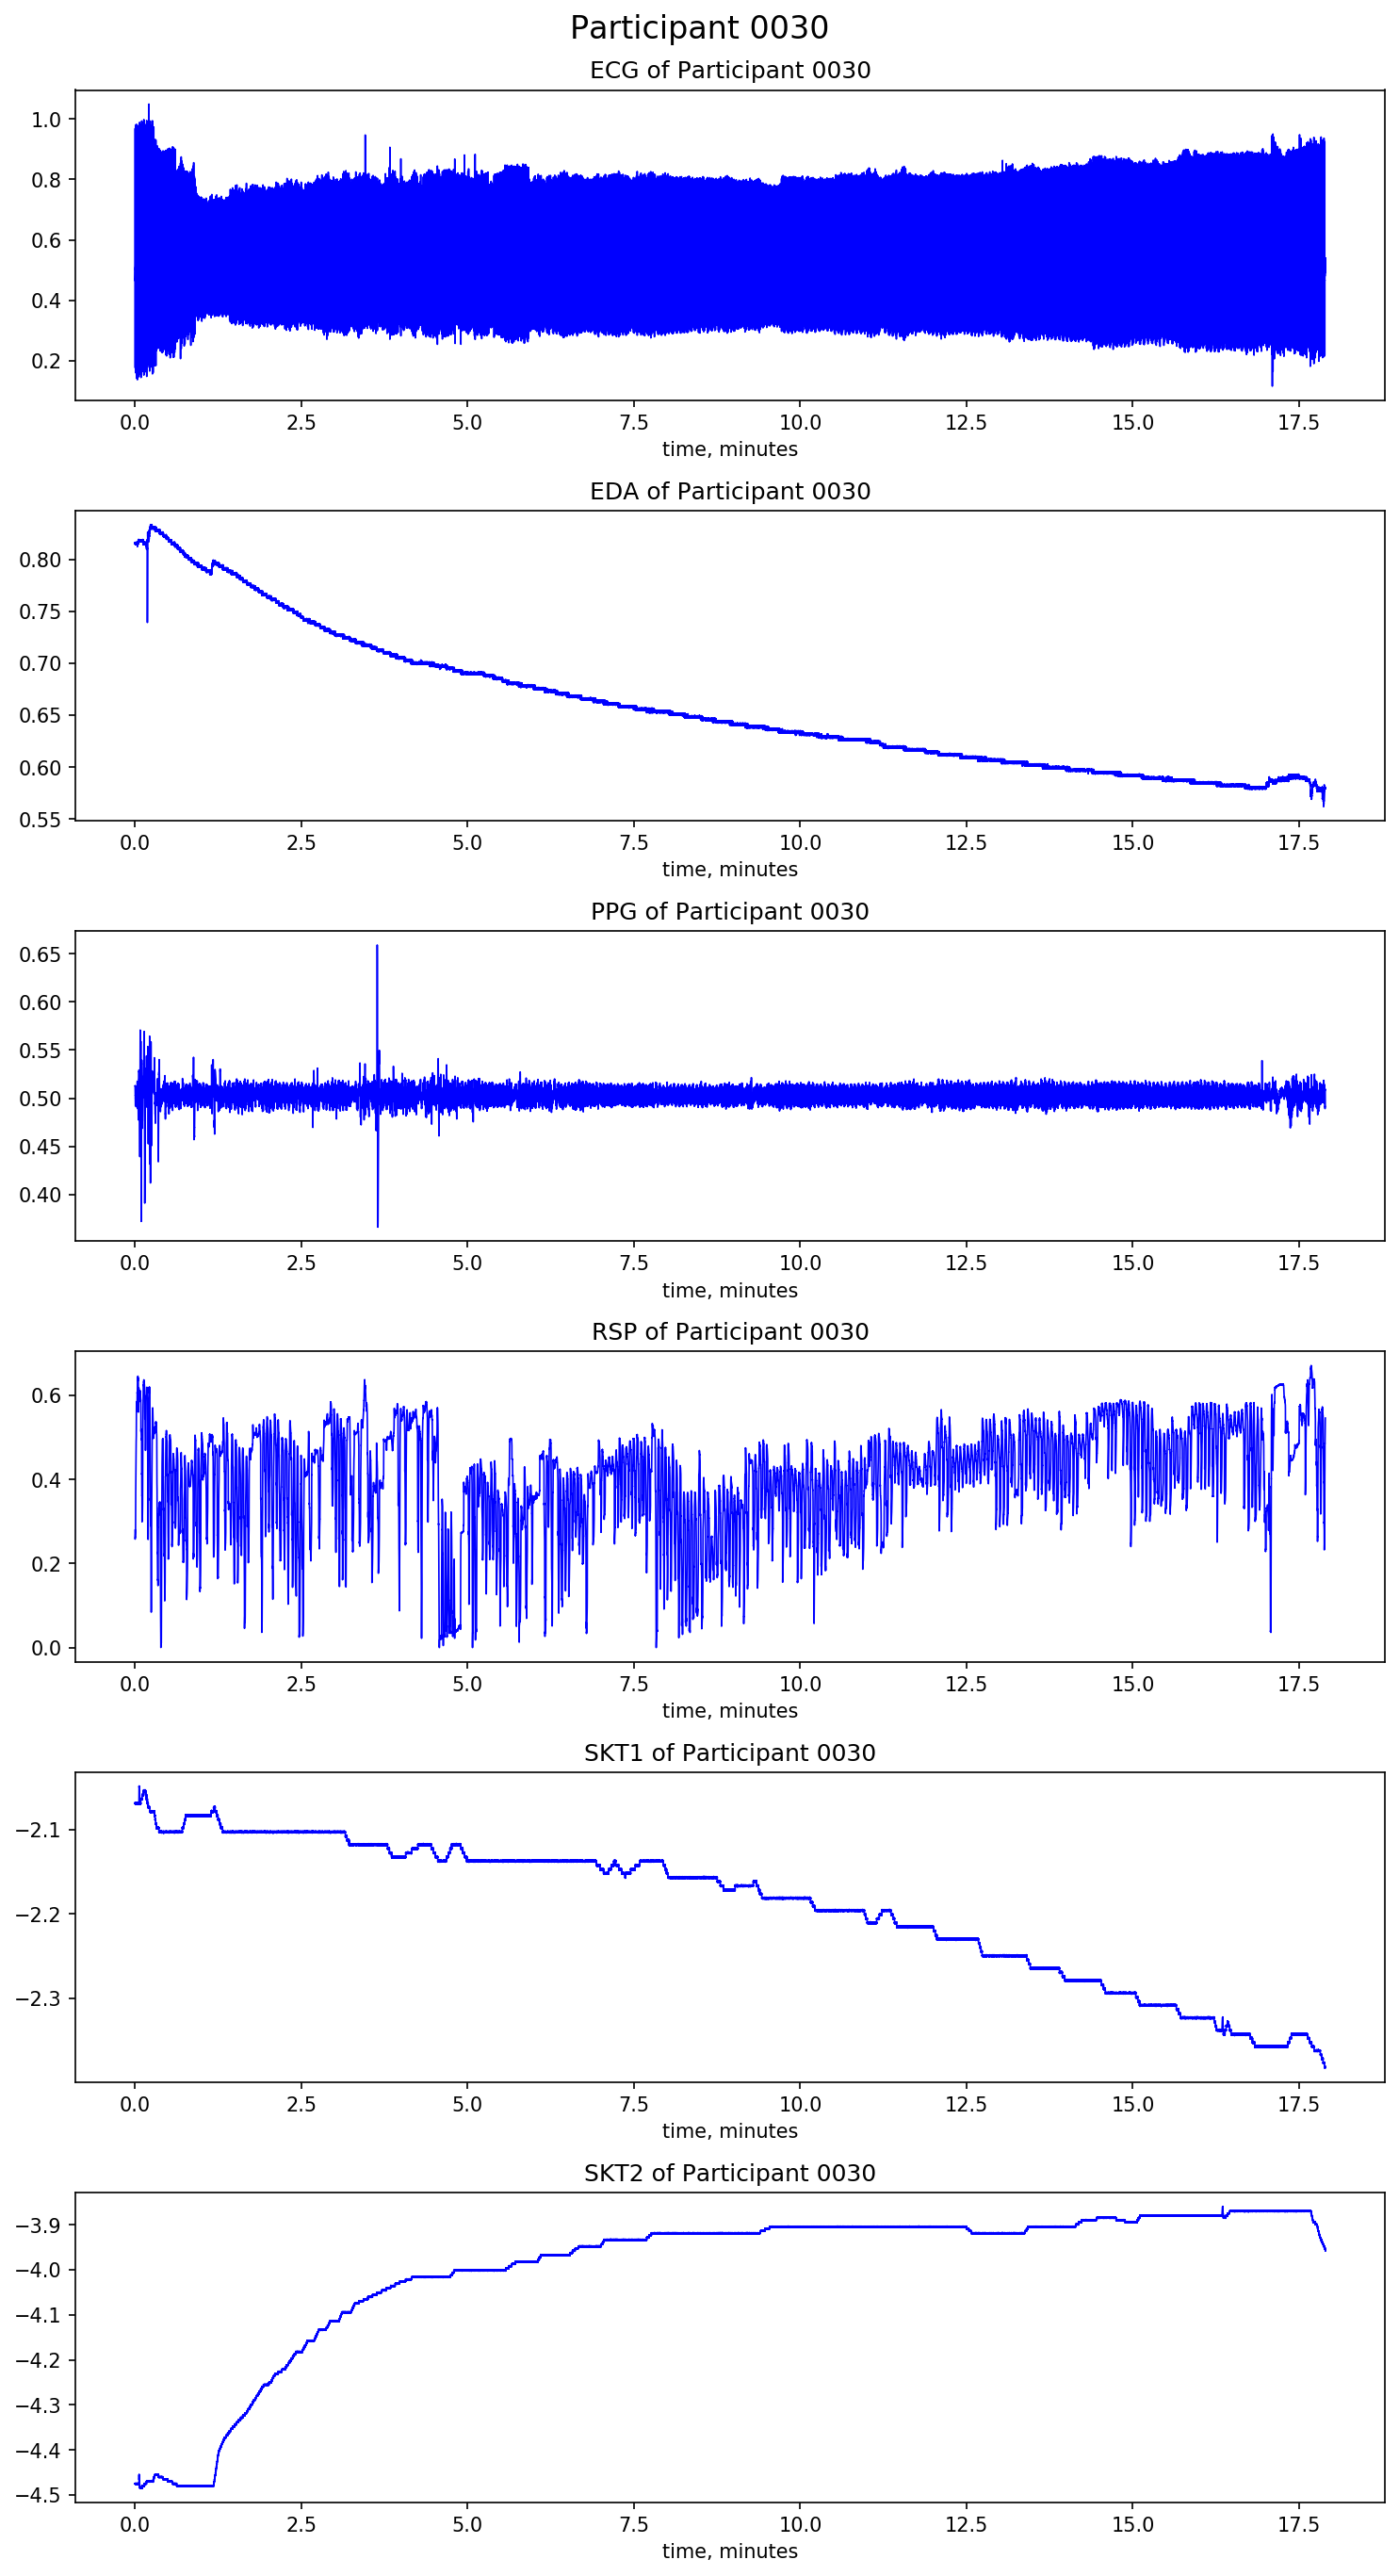

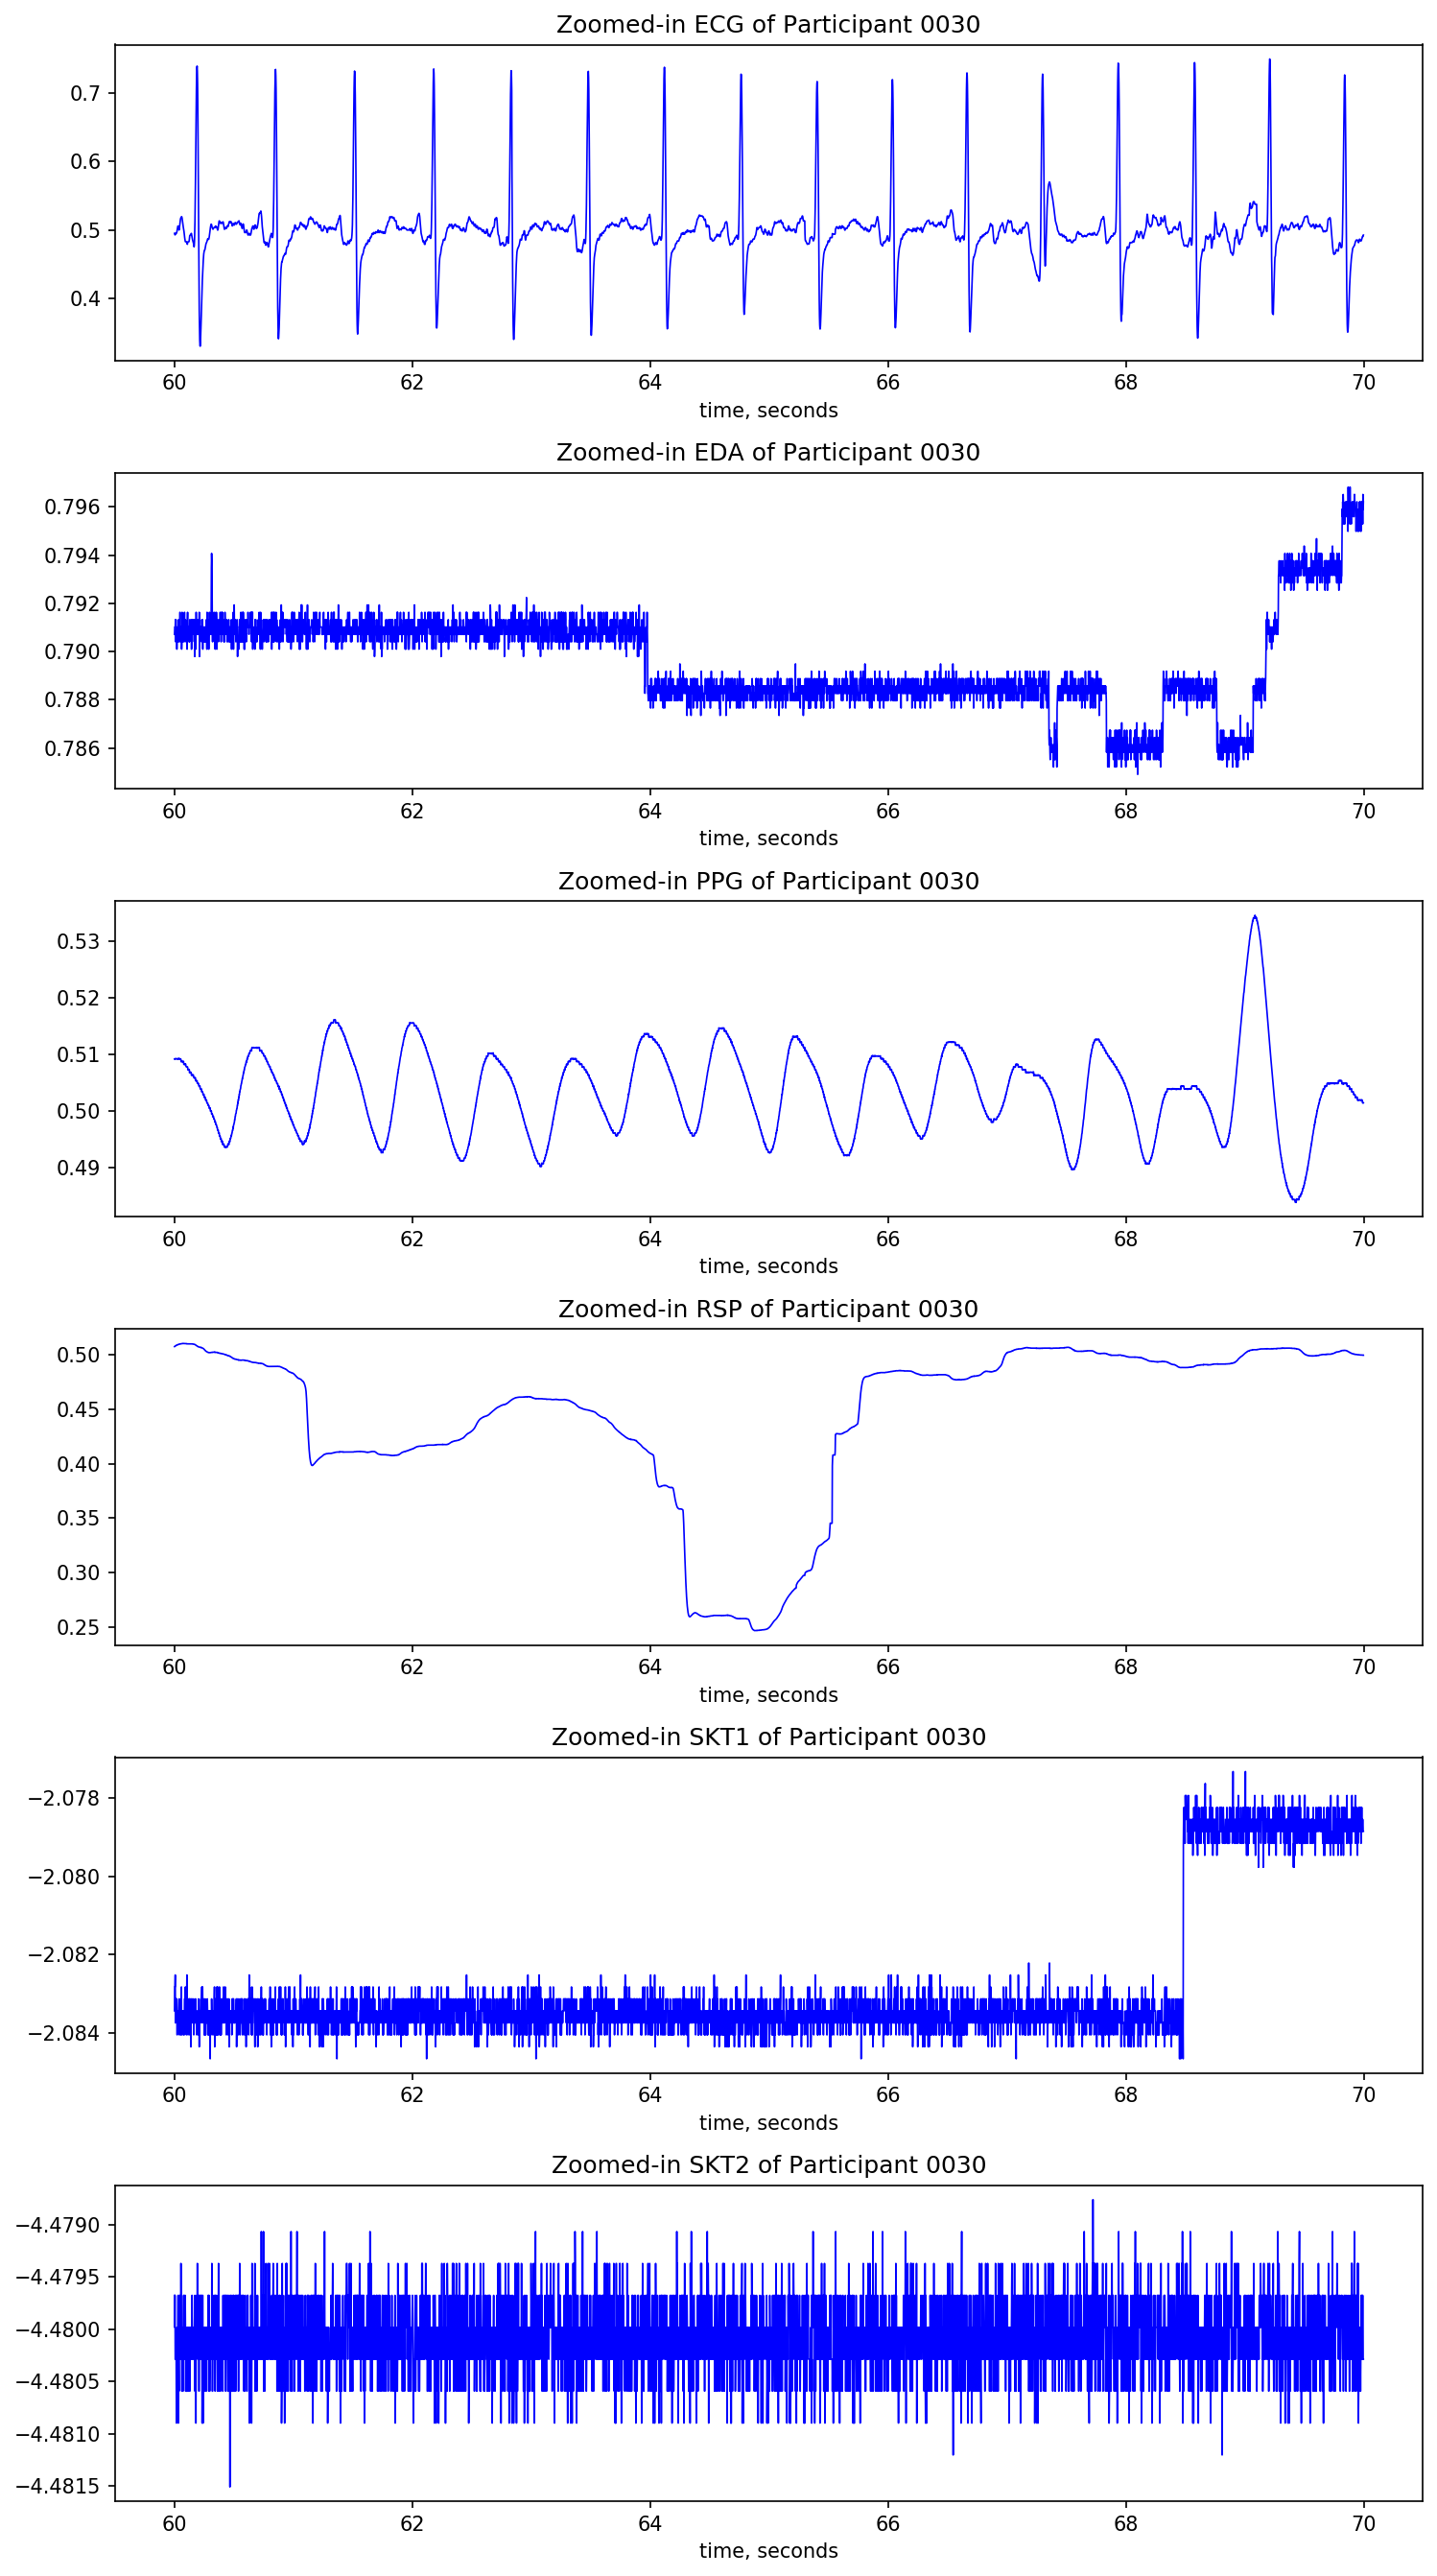

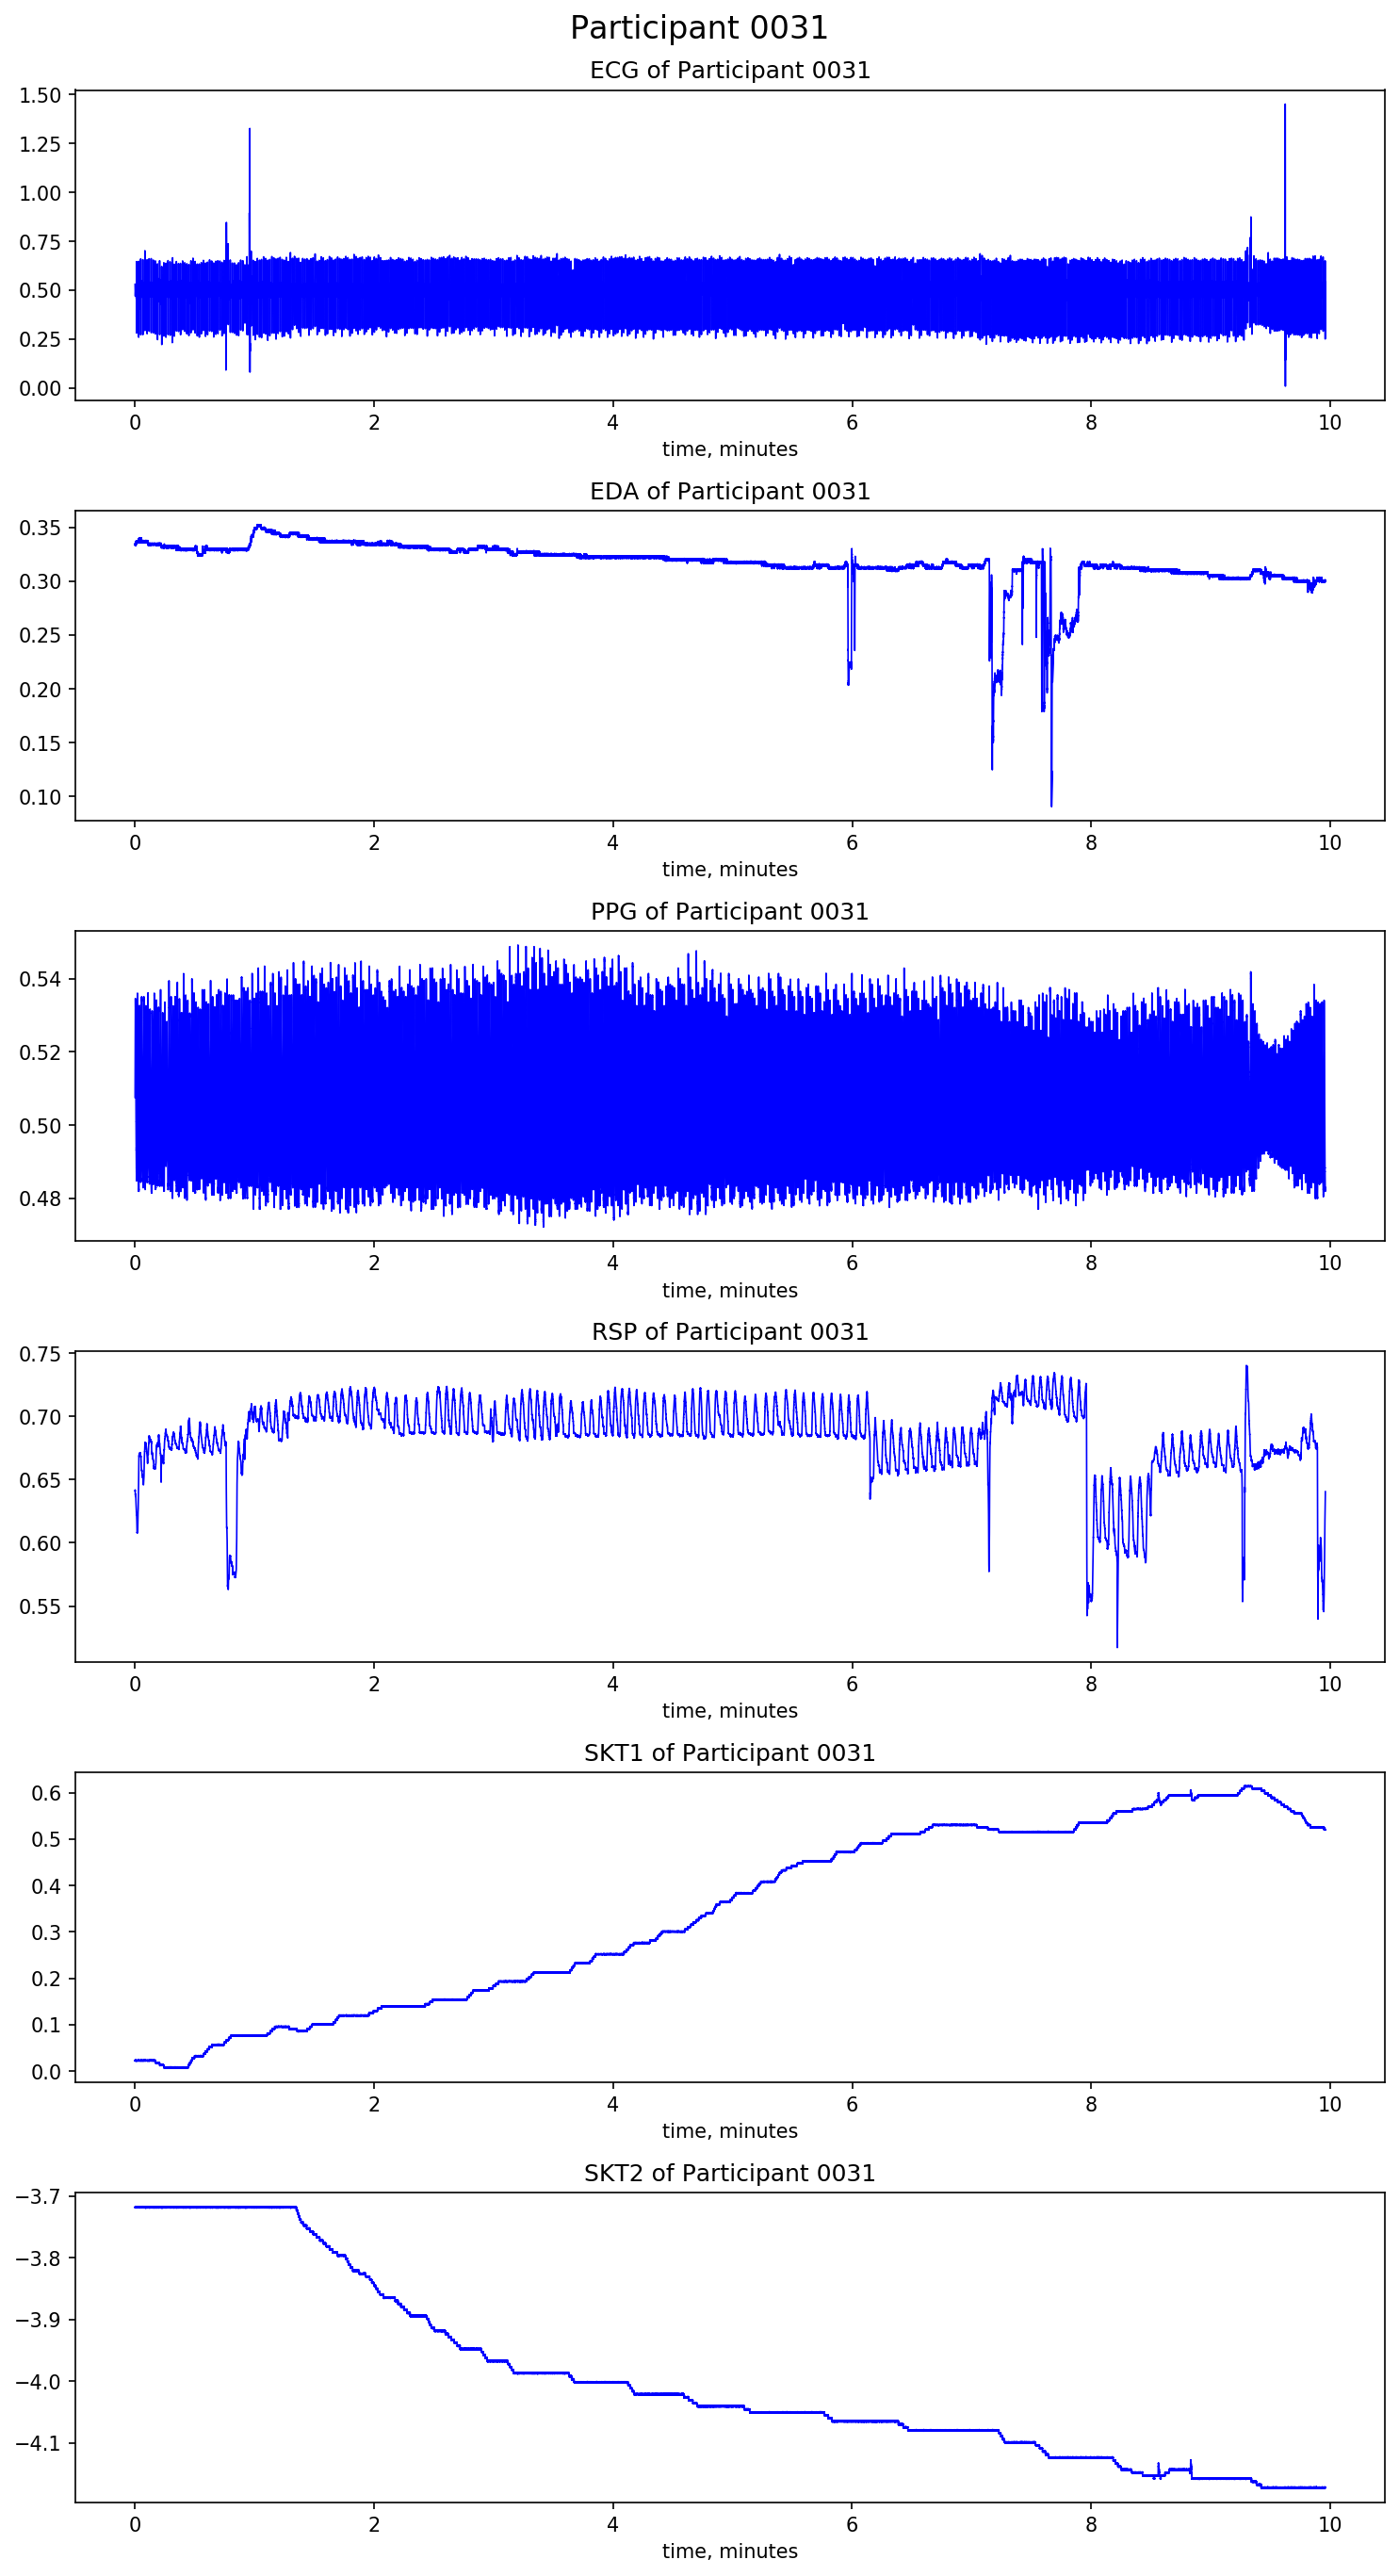

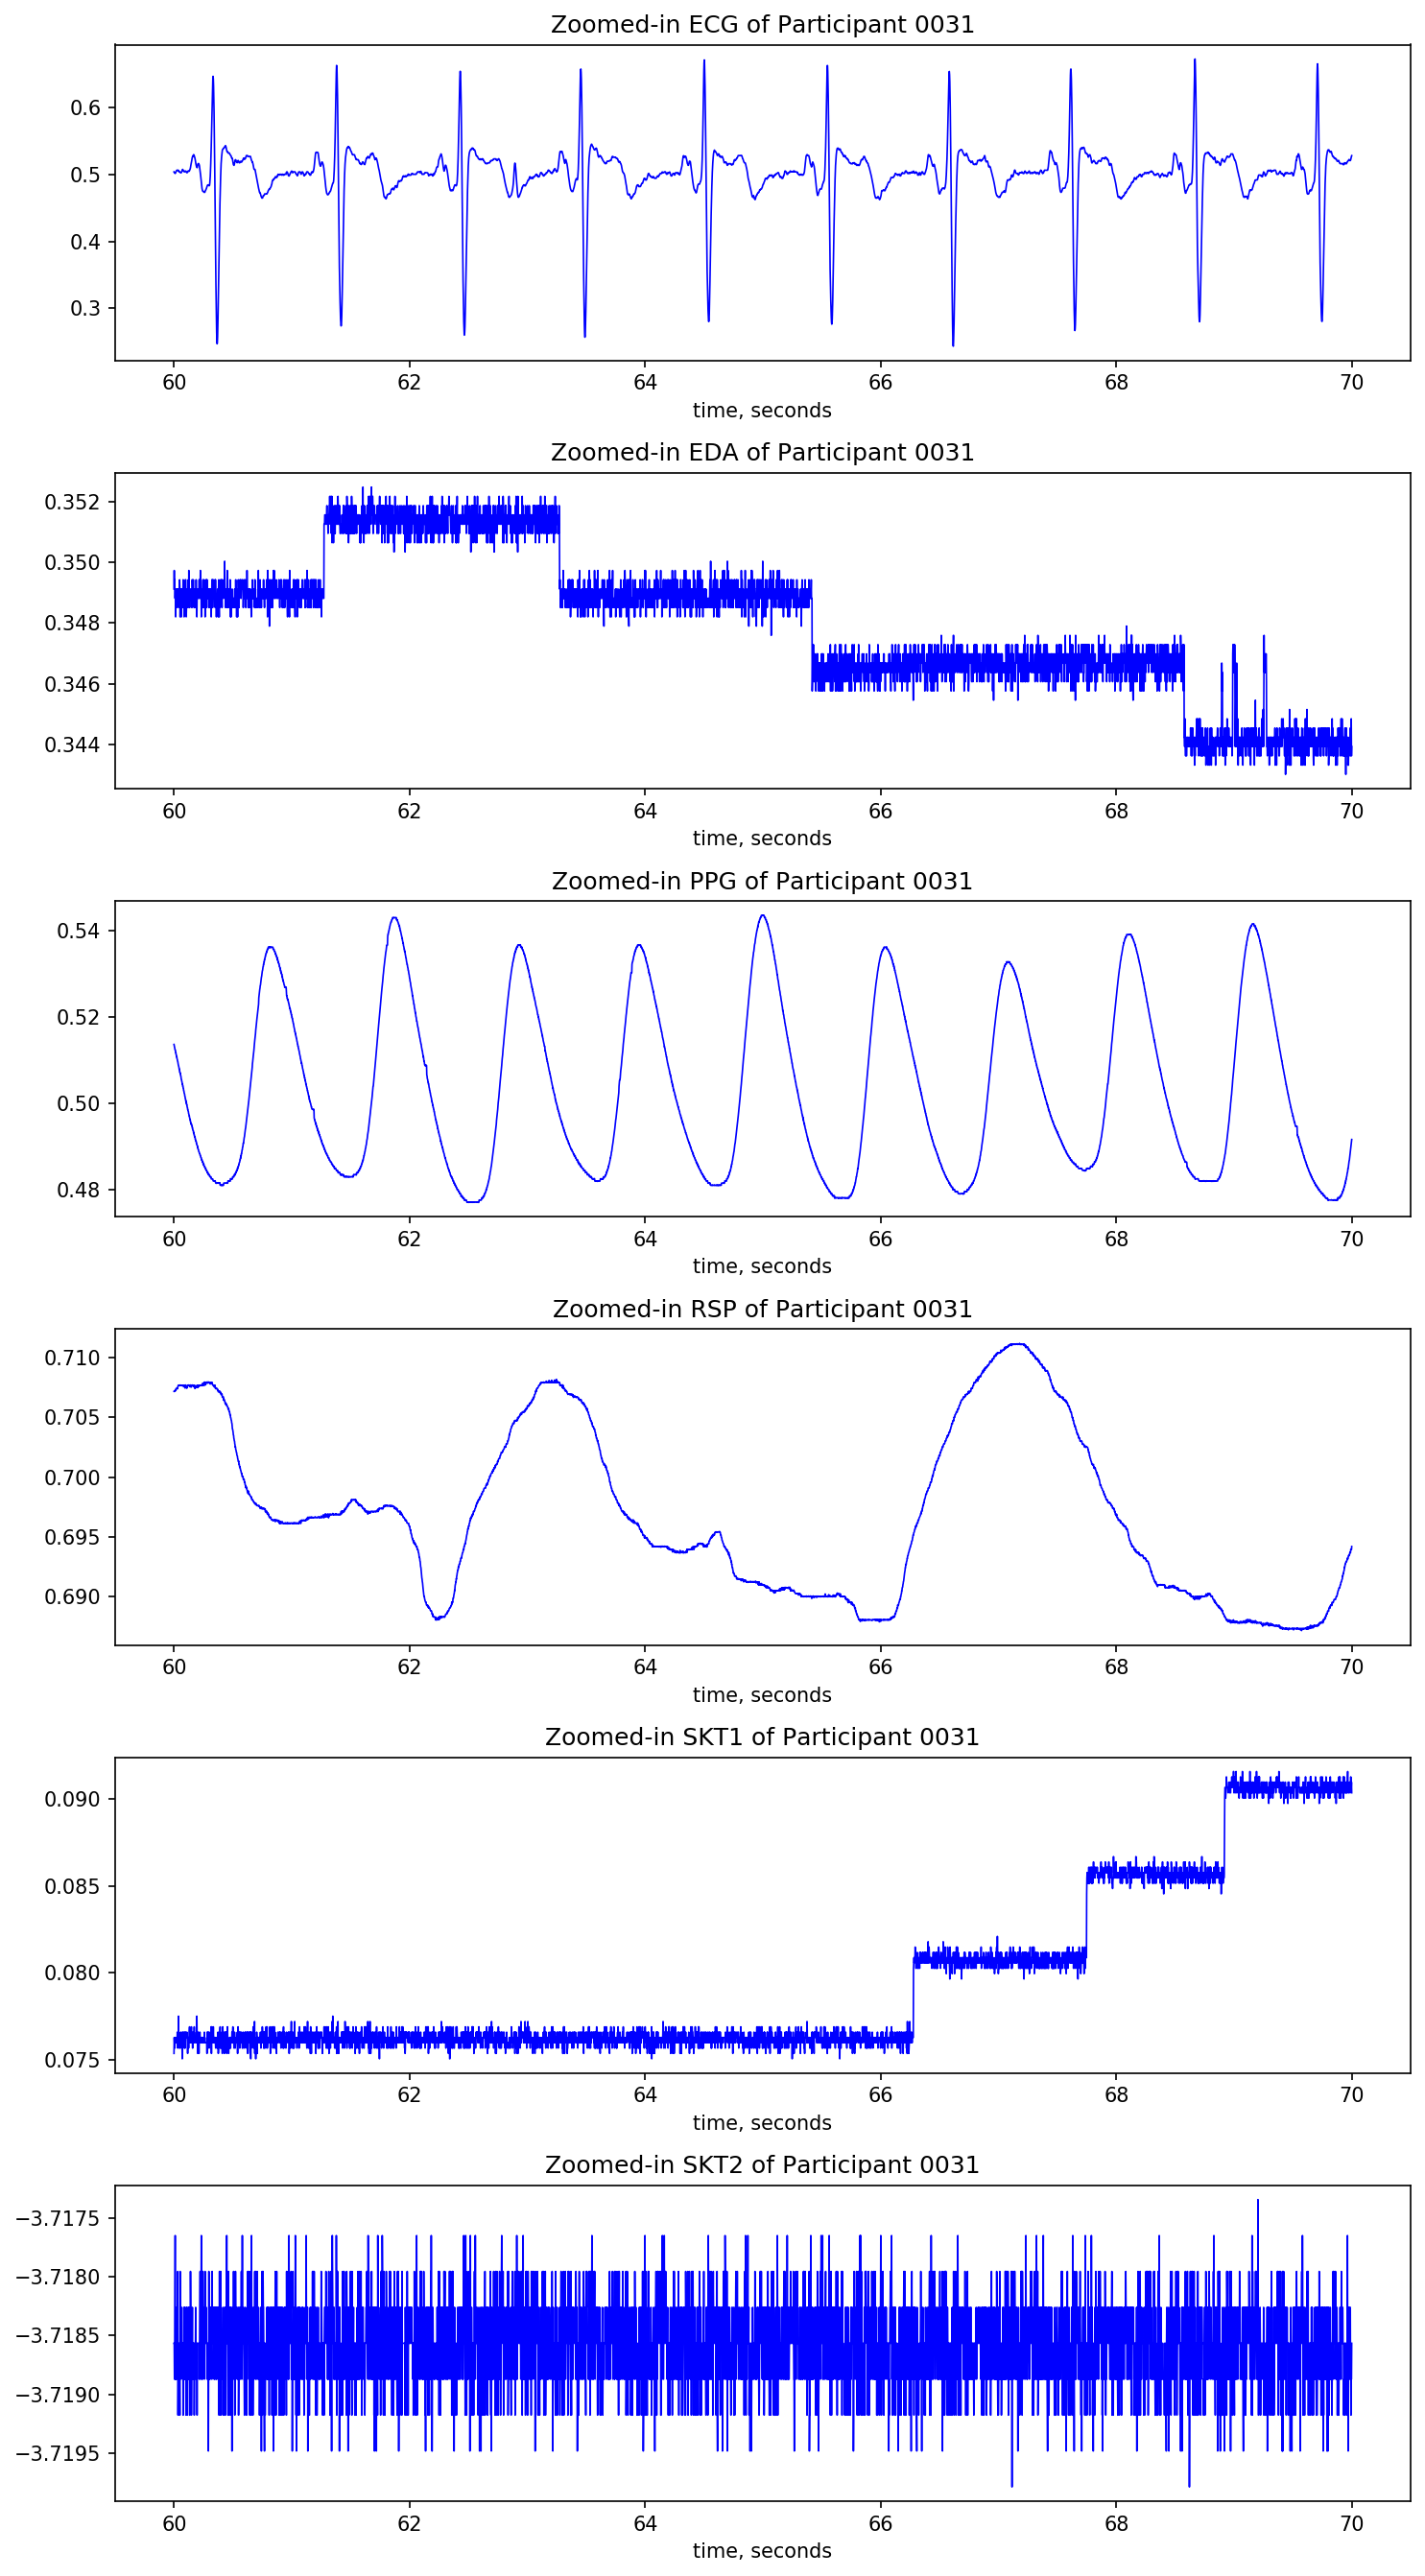

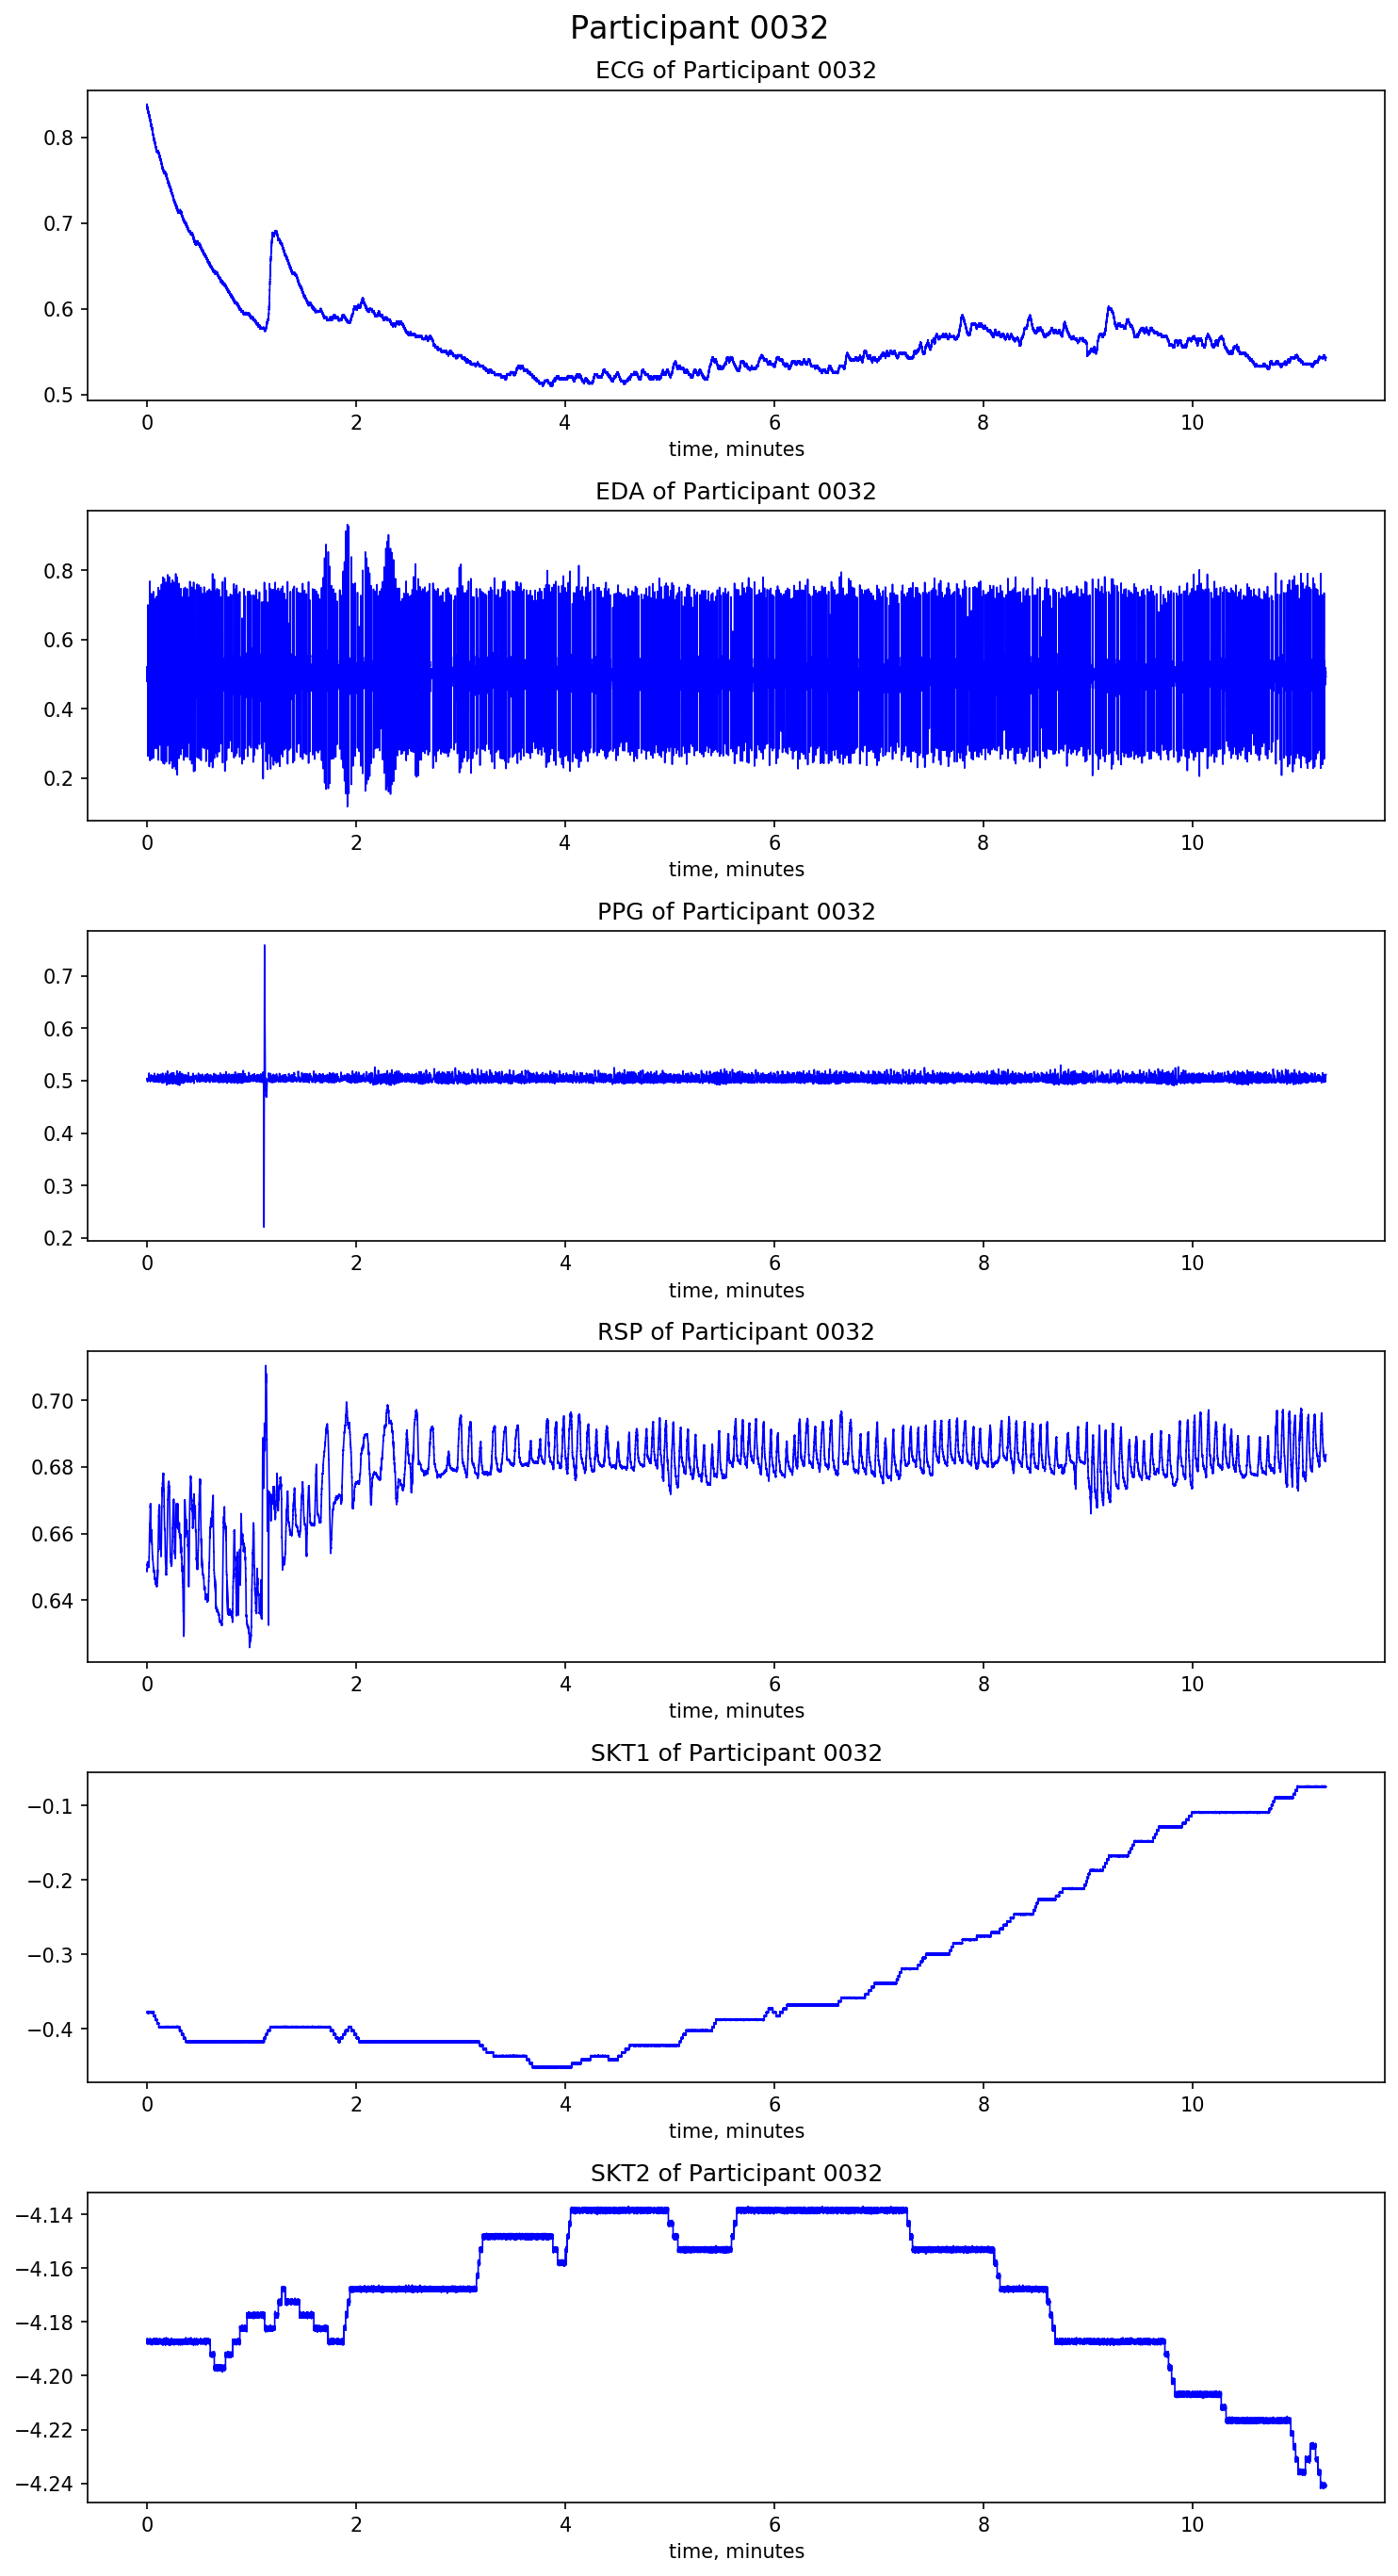

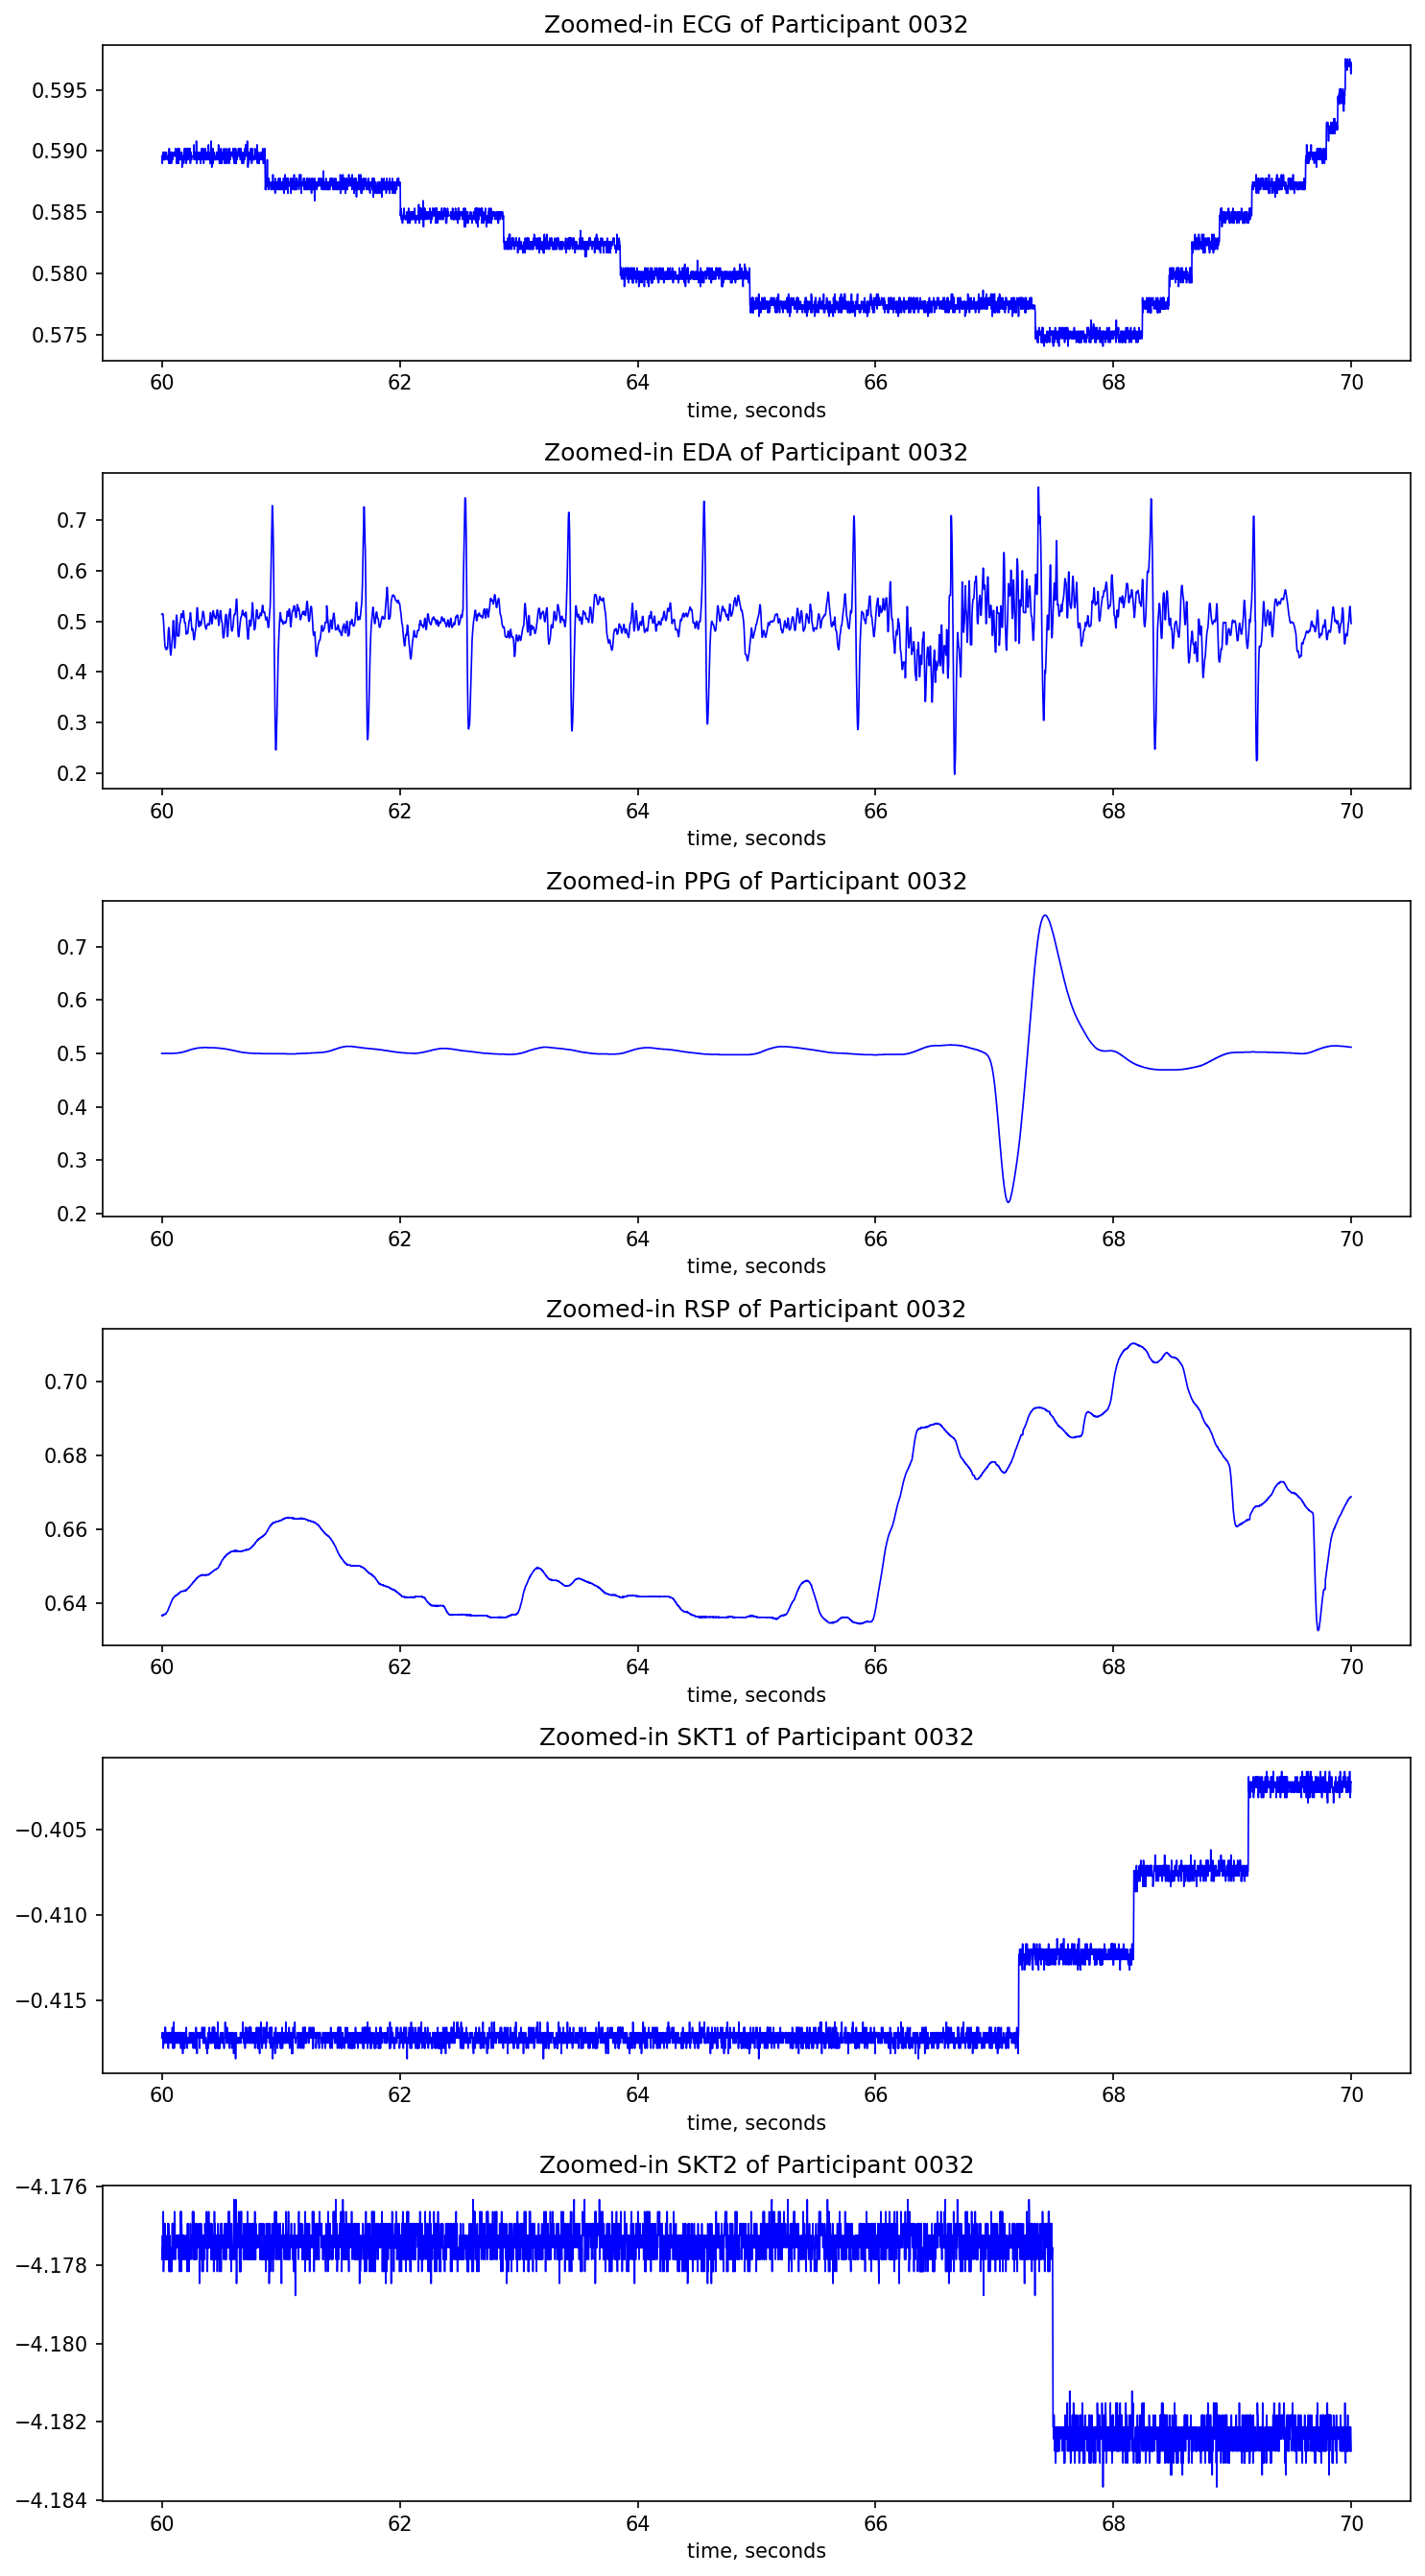

In [8]:
for participant in participants:
    df = load_data(filepath, participant)
    plot_whole(df, participant)
    plot_zoom(df,participant)